In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm
import warnings
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer


pd.set_option('display.max_columns', None)
pd.options.mode.chained_assignment = None 


warnings.filterwarnings('ignore', category=pd.errors.SettingWithCopyWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
file_to_test = r"C:.\archive\2022\heart_2022_with_nans.csv"

data = pd.read_csv(file_to_test)

In [3]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [4]:
data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ECigaretteUsage,ChestScan,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,No,No,No,No,No,No,No,No,Yes,No,No,No,No,No,No,Never smoked,Not at all (right now),No,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,No,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,No,No,Current smoker - now smokes some days,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Never smoked,Never used e-cigarettes in my entire life,Yes,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [5]:
def convert_values_to_lowercase(data):
    for column in data.columns:
        if data[column].dtype == 'object' and column!= 'State':
            data[column] = data[column].str.lower()
    return data

data = convert_values_to_lowercase(data)

In [74]:
class DataFrameAnalyzer:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def get_shape(self):
        return self.dataframe.shape

    def count_columns(self):
        return len(self.dataframe.columns)

    def check_for_nans(self):
        has_nans = self.dataframe.isna().any(axis=1).any()
        num_rows_with_nans = self.dataframe.isna().any(axis=1).sum()
        print(f"Number of rows with NaN values: {num_rows_with_nans}")
        return has_nans

    def check_for_duplicates(self):
        return self.dataframe.duplicated().any()
        
    def print_unique_values(self):
        for column in self.dataframe.columns:
            try:
                unique_values = sorted(str(value) for value in self.dataframe[column].unique())
                print(f"{column}: {unique_values} unique values")
            except TypeError as e:
                print(f"Error sorting unique values in column '{column}': {e}")


analyzer = DataFrameAnalyzer(data)
print("DataFrame Shape:", analyzer.get_shape())
print("Number of Columns:", analyzer.count_columns())
print("Columns with NaN values:", analyzer.check_for_nans())
analyzer.print_unique_values()

DataFrame Shape: (445132, 40)
Number of Columns: 40
Number of rows with NaN values: 199110
Columns with NaN values: True
State: ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'] unique values
Sex: ['female', 'male'] unique values
GeneralHealth: ['excellent', 'fair', 'good', 'nan', 'poor', 'very good'] unique values
PhysicalHealthDays: ['0.0', '1.0', '10.0', '1

In [75]:
print(data.columns)

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')


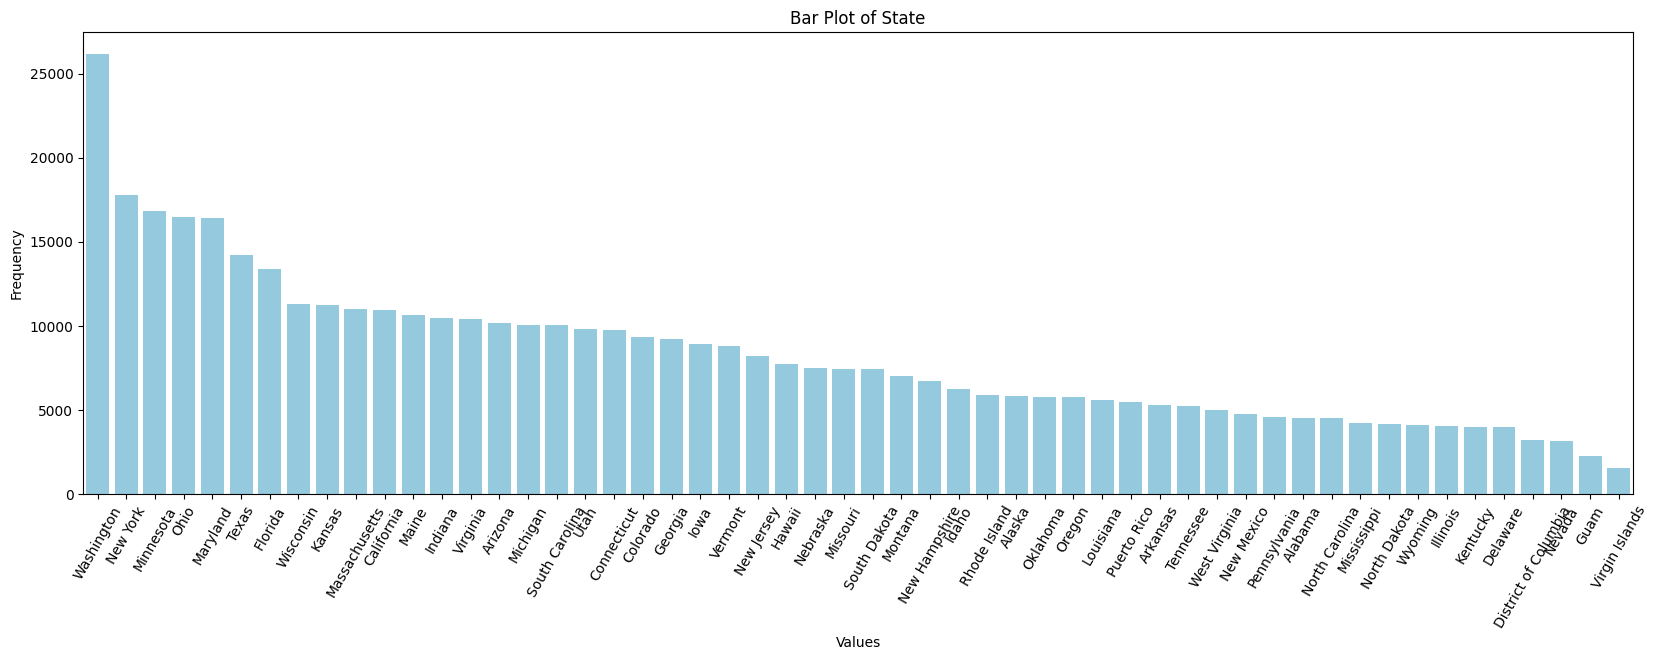

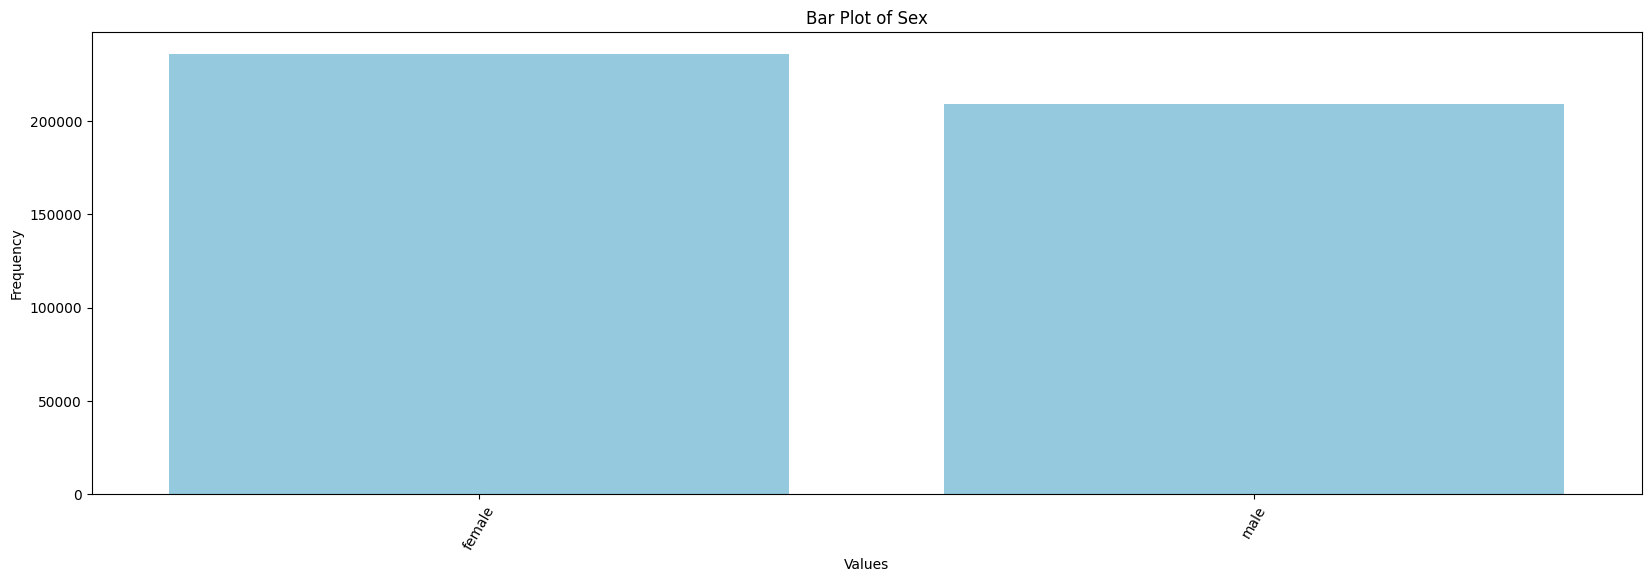

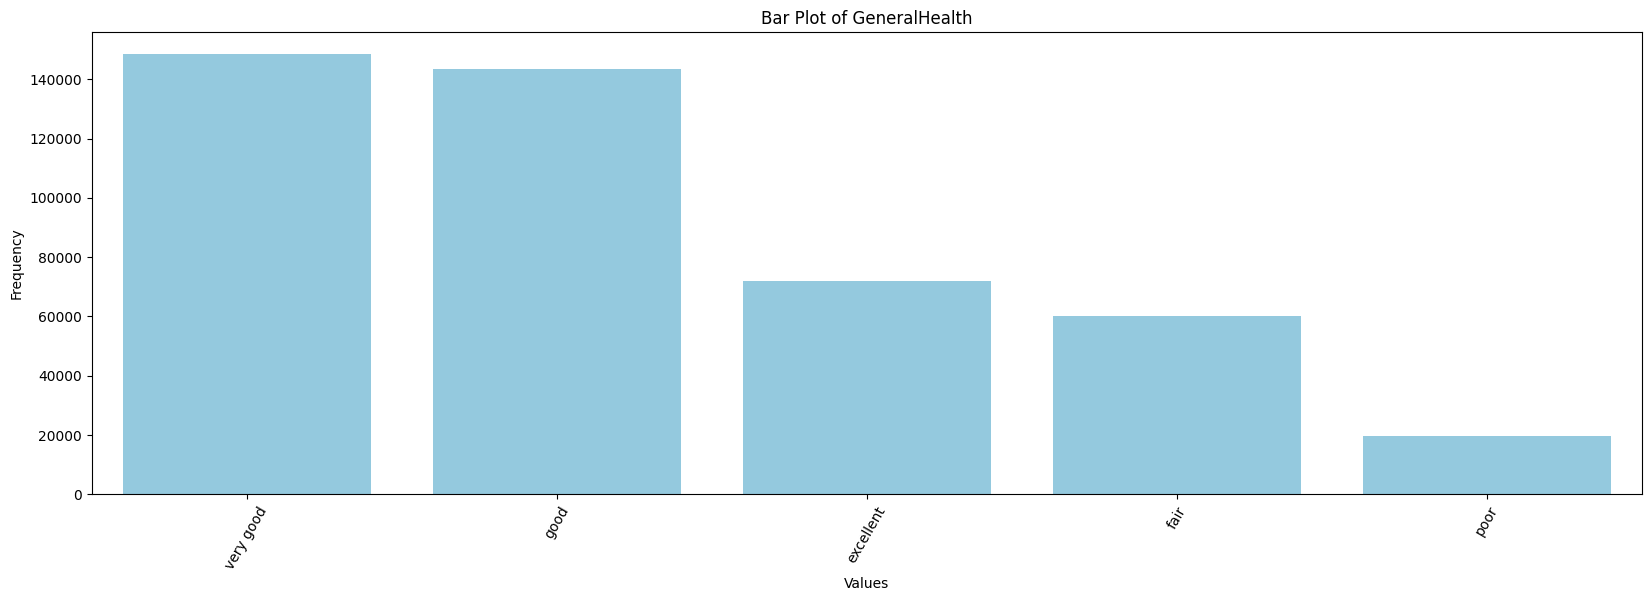

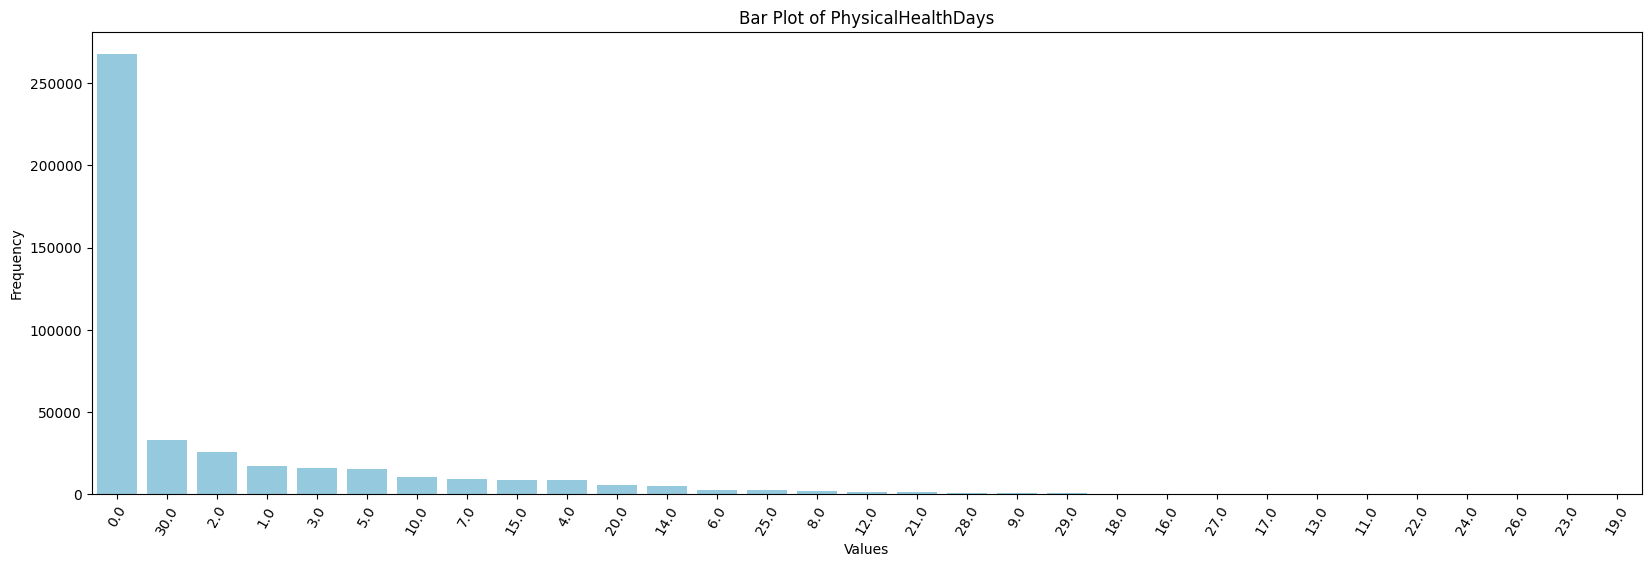

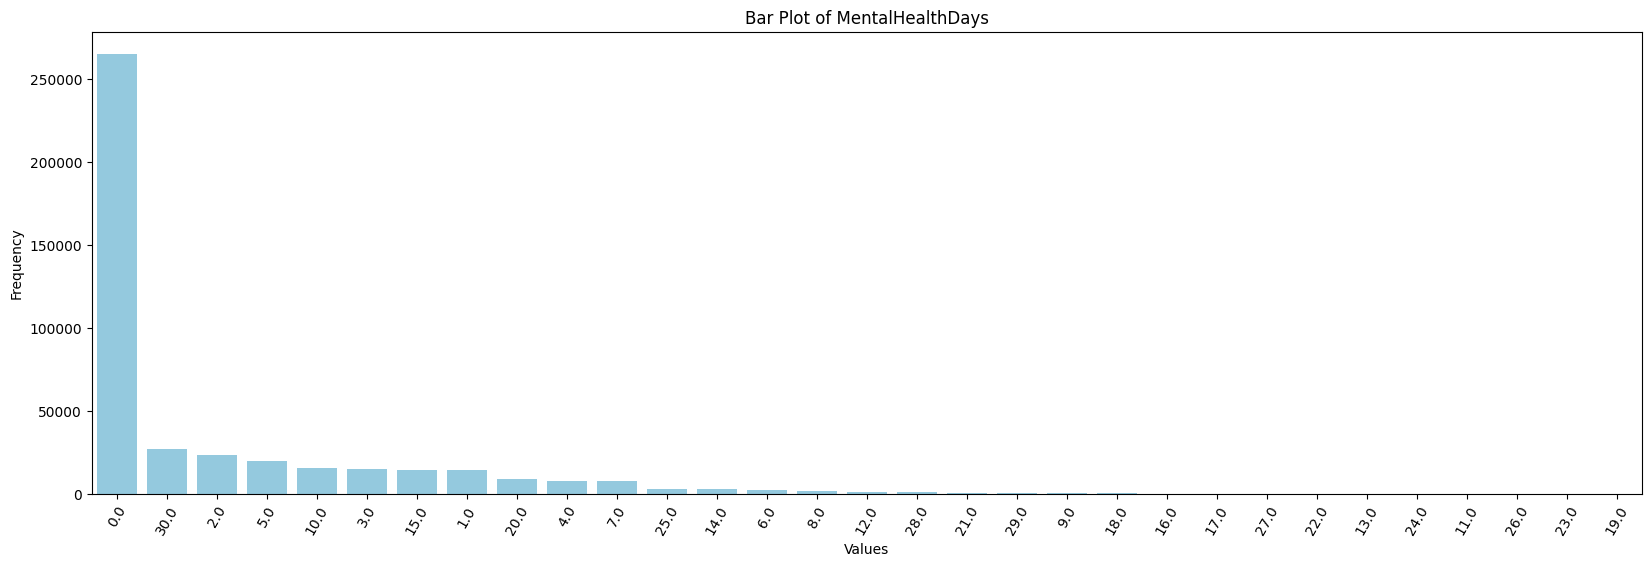

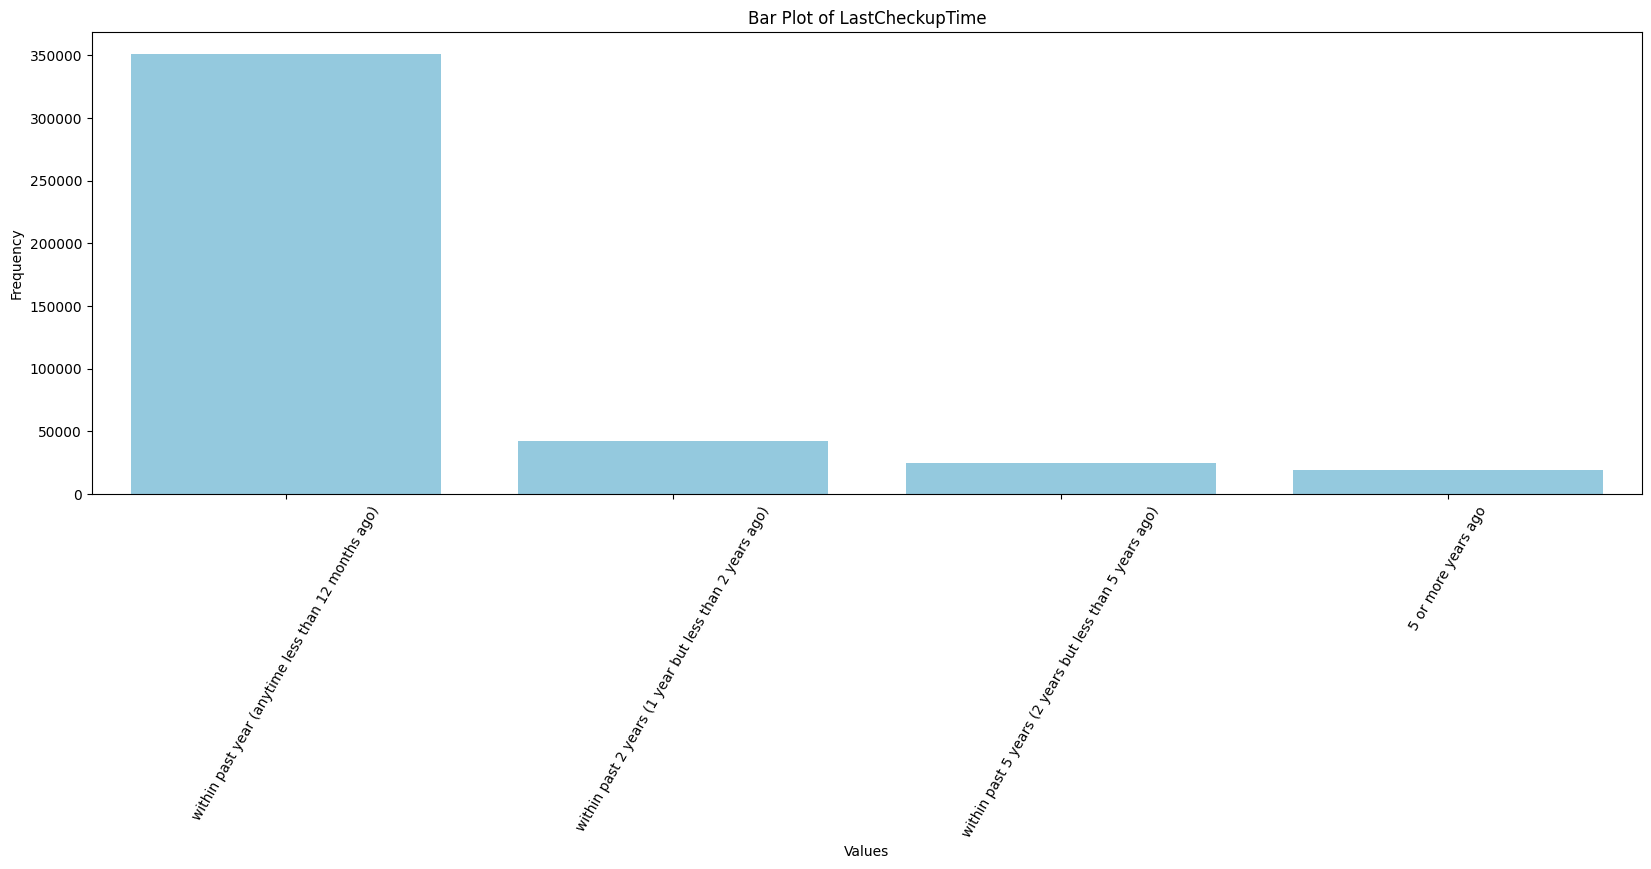

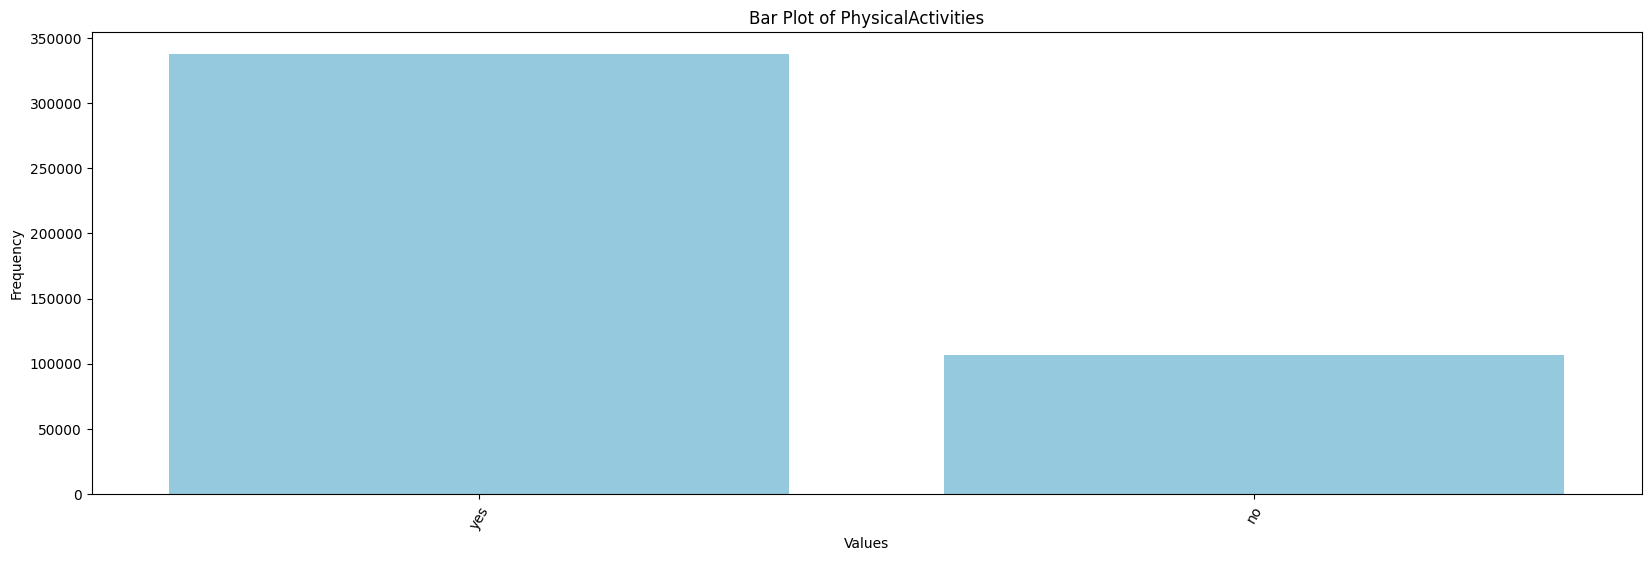

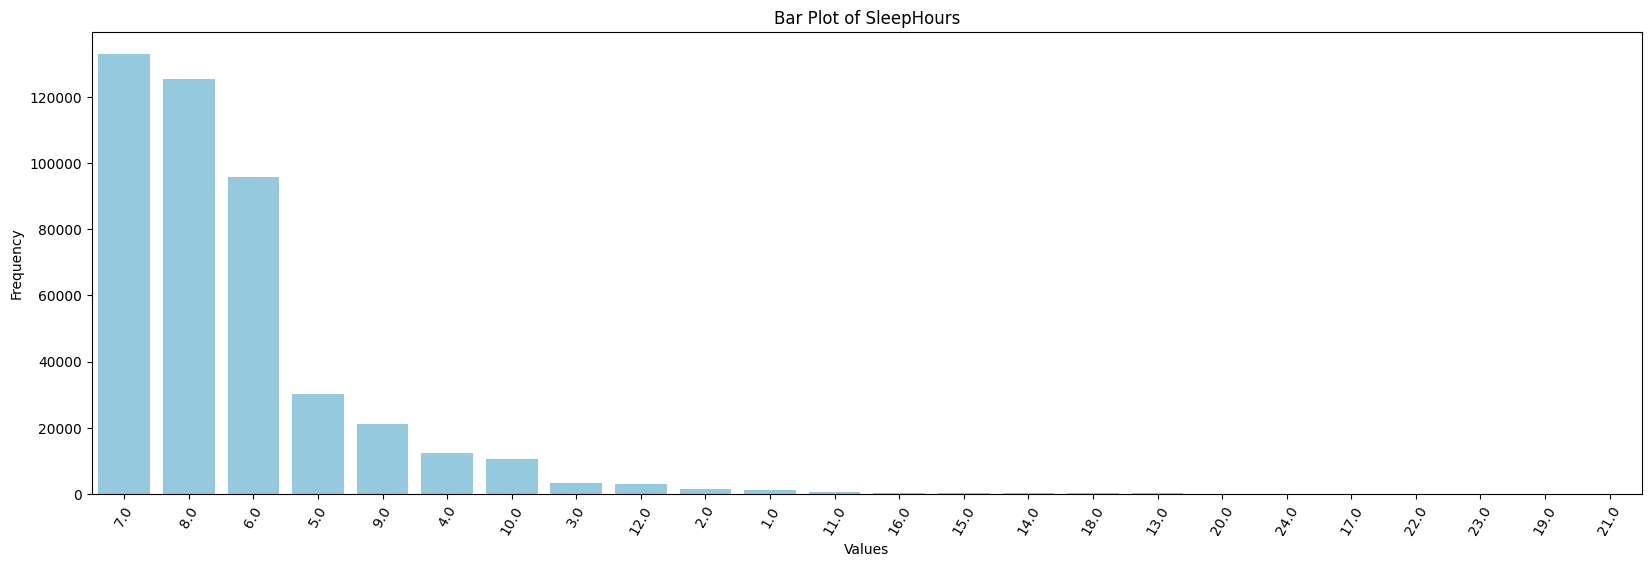

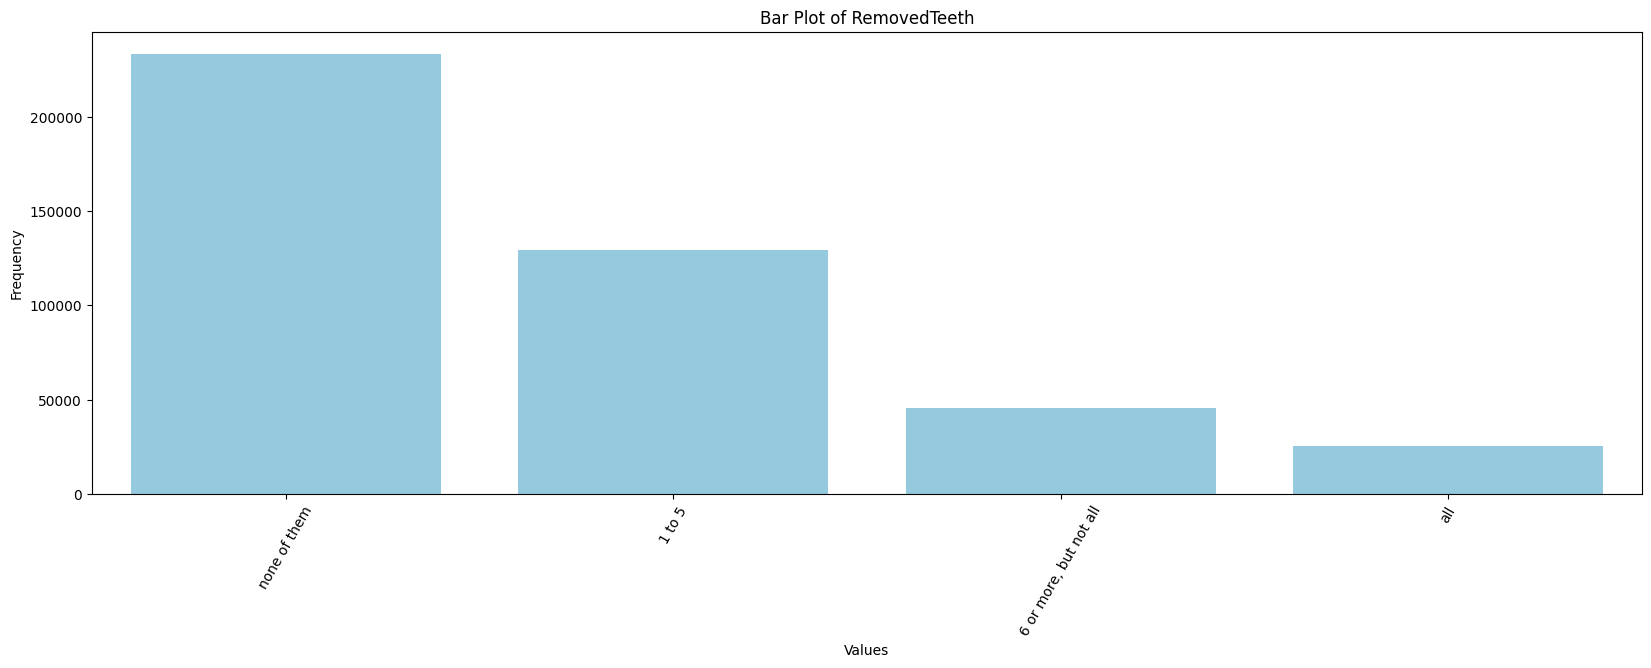

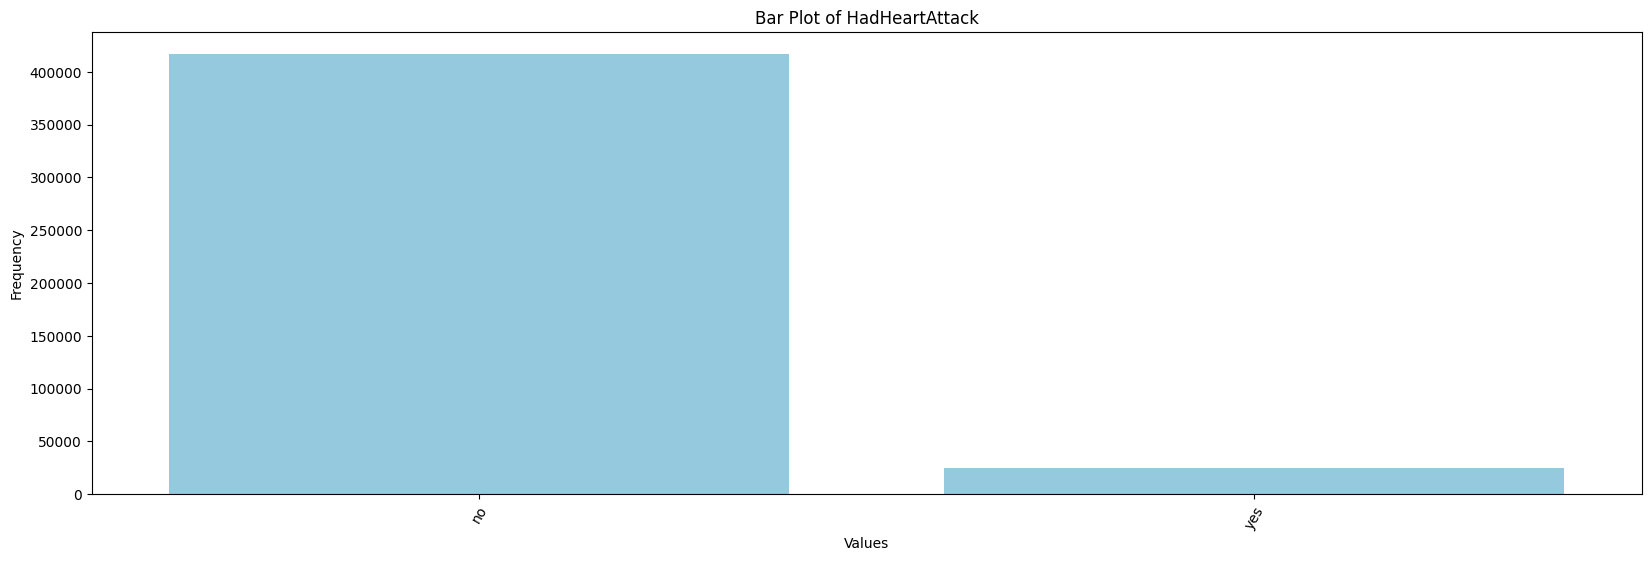

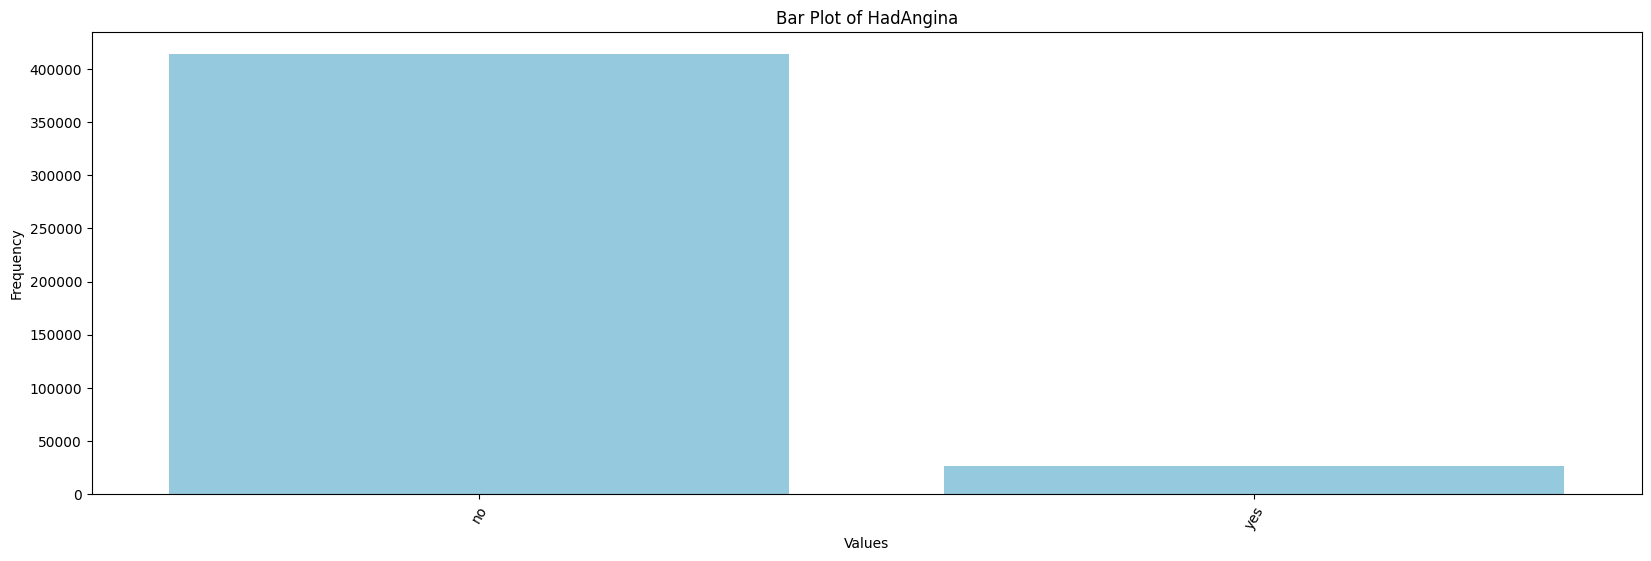

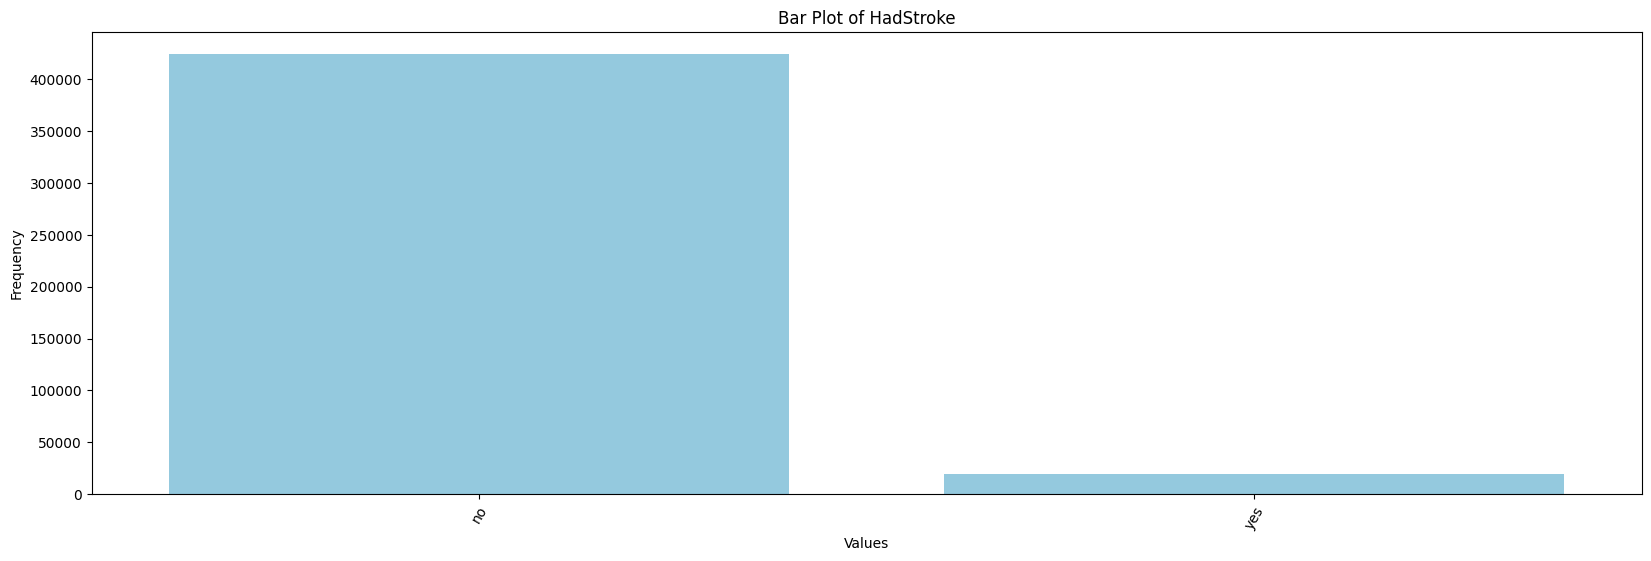

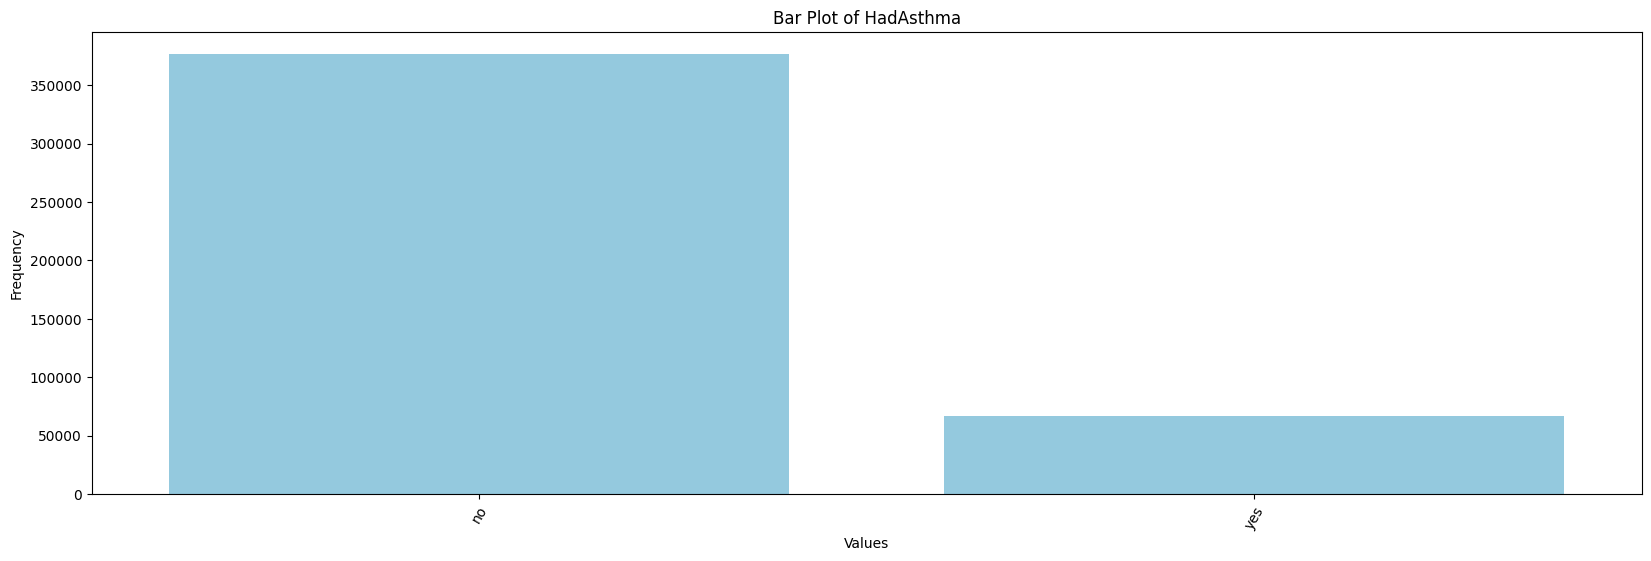

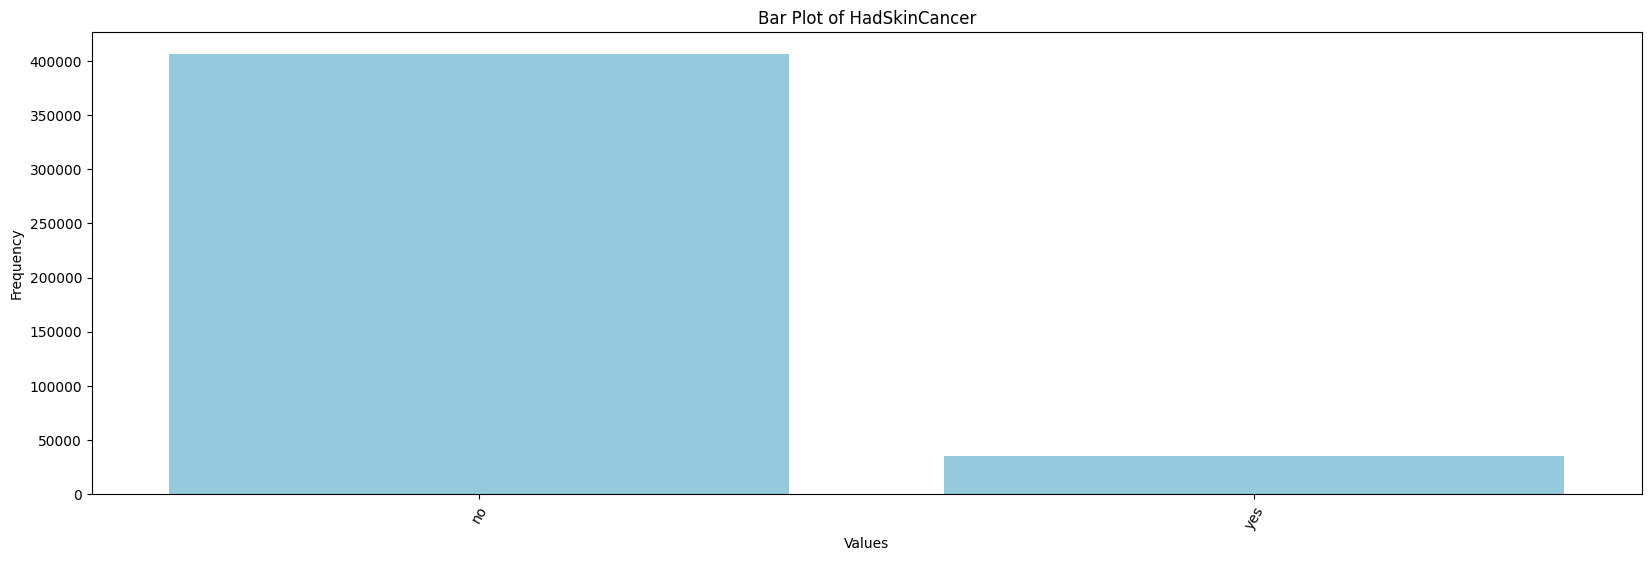

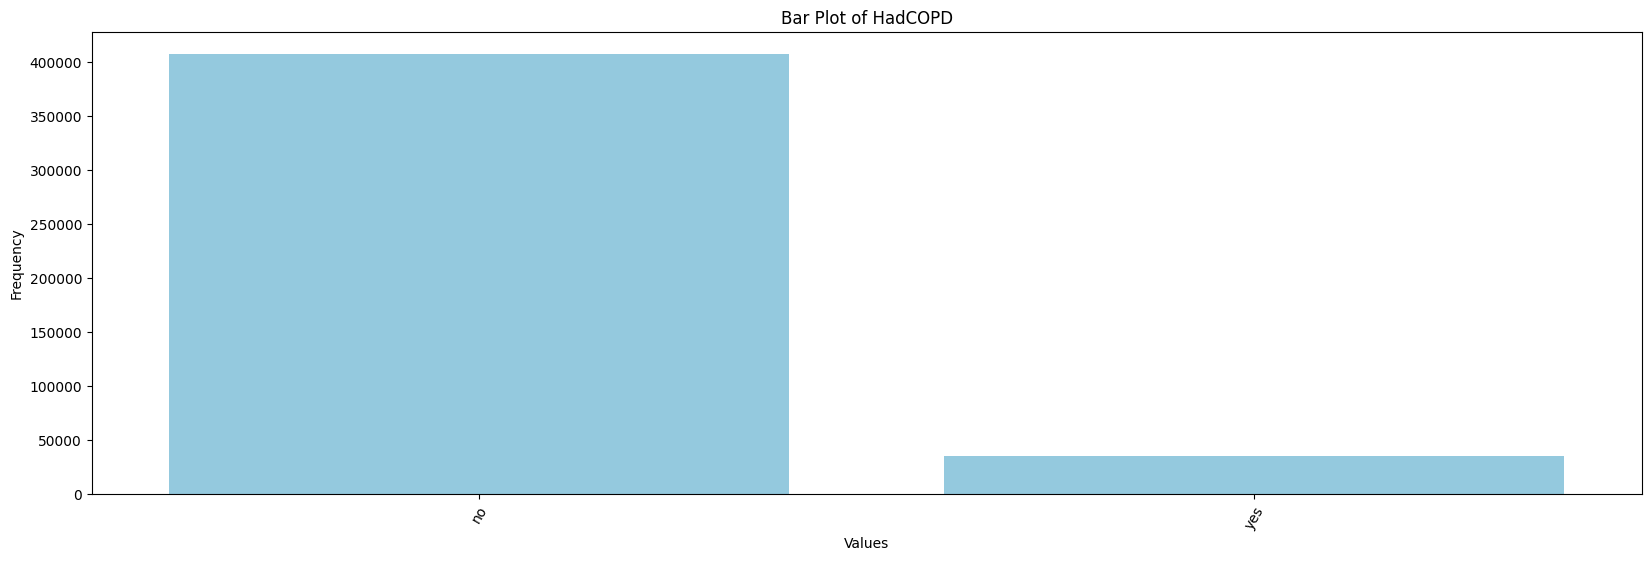

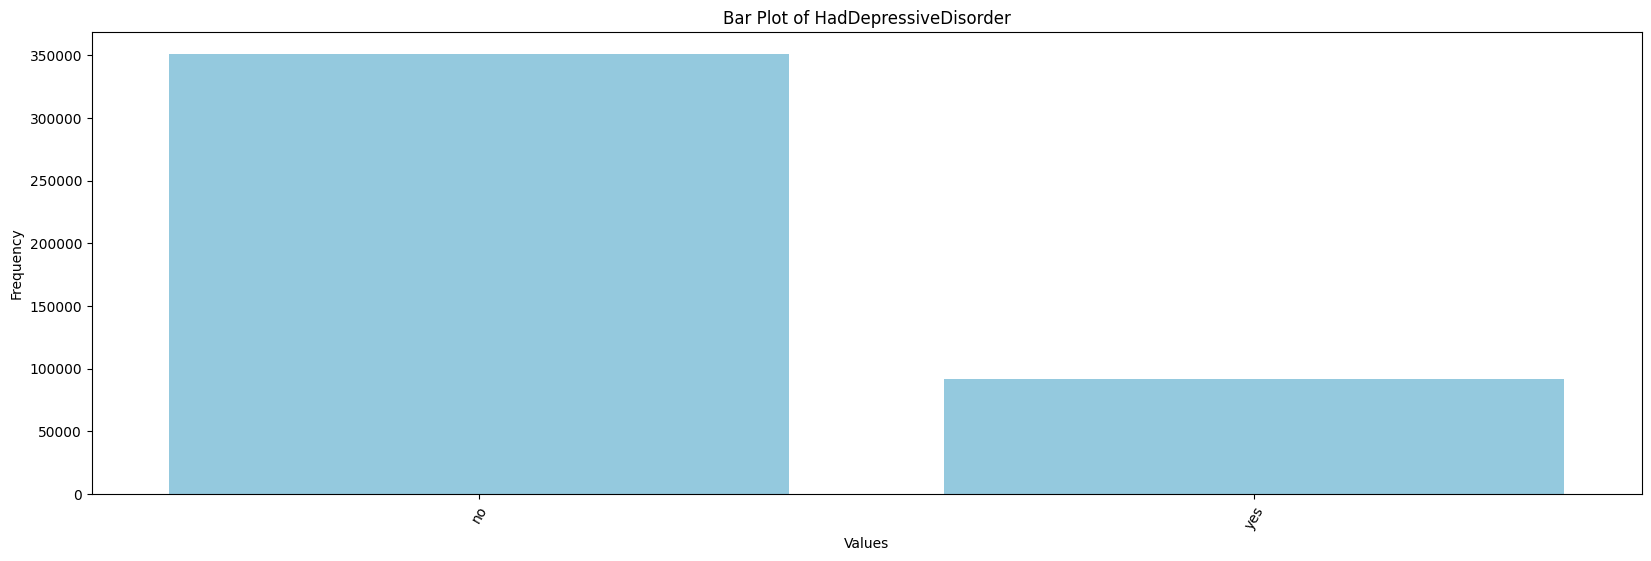

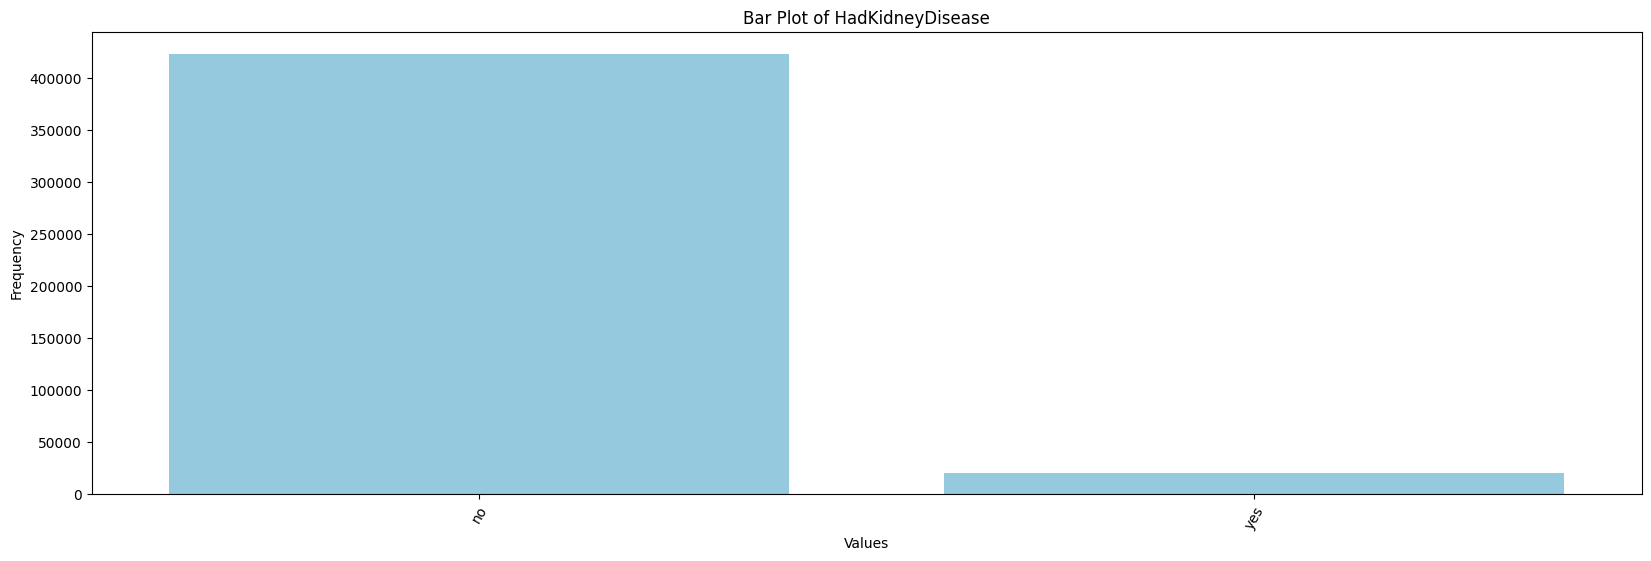

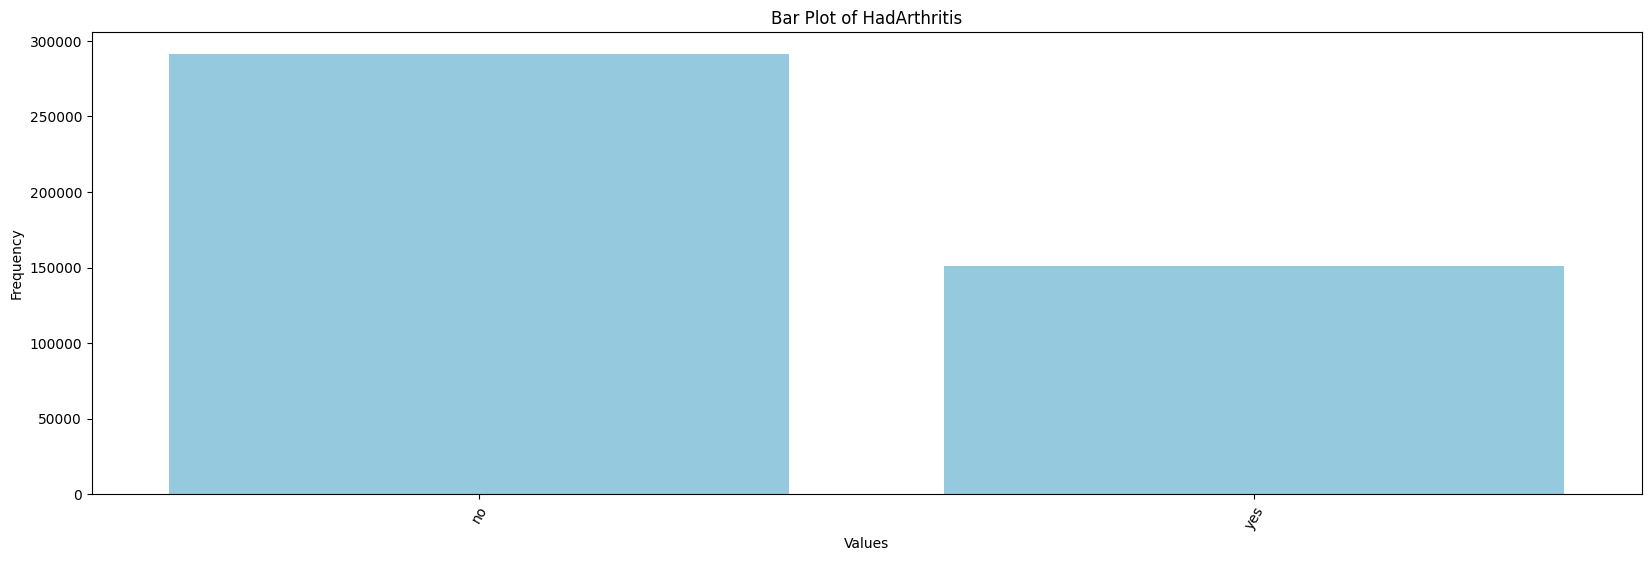

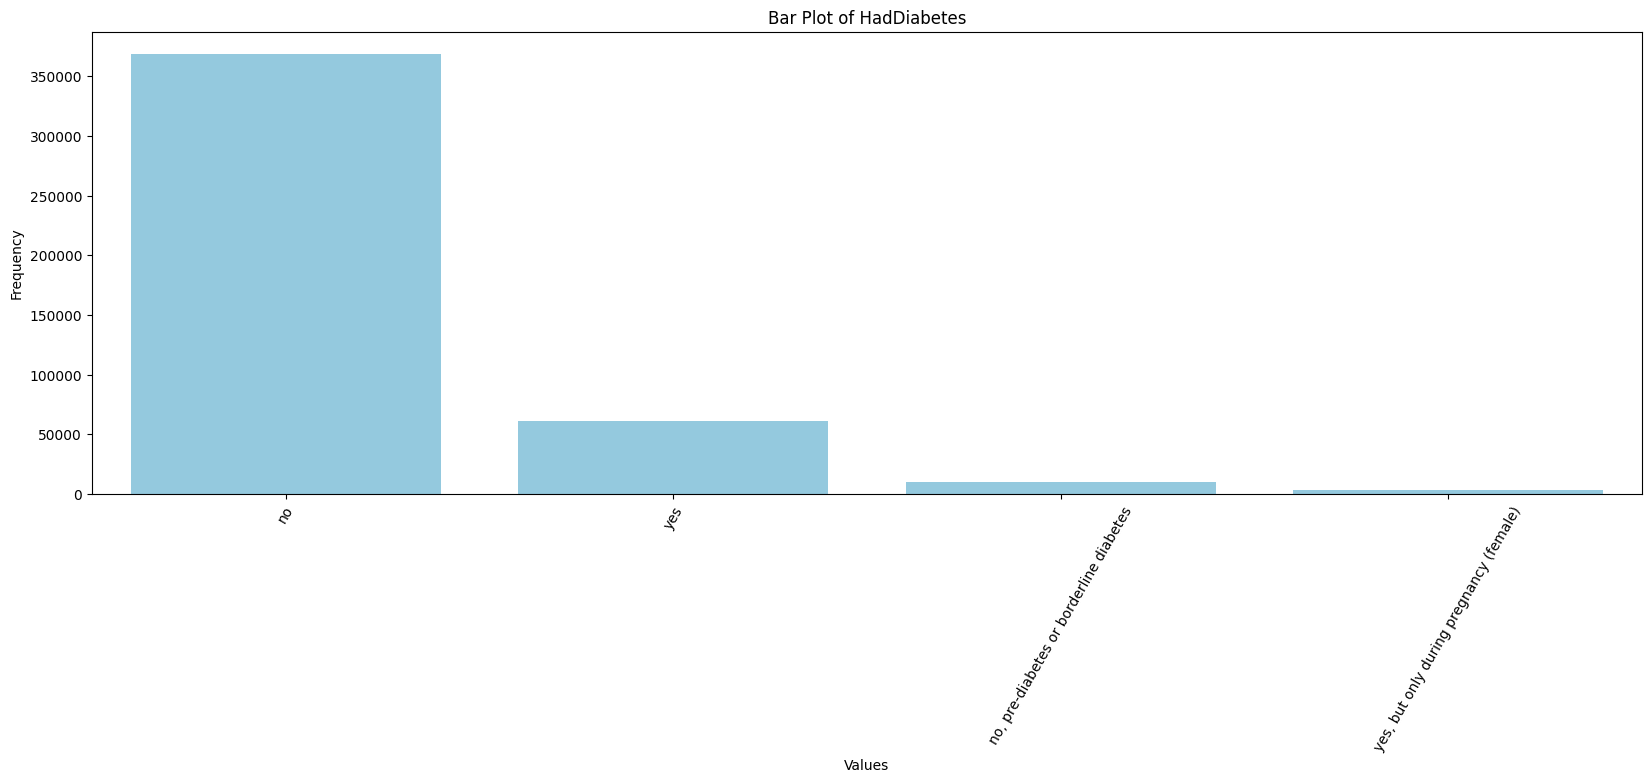

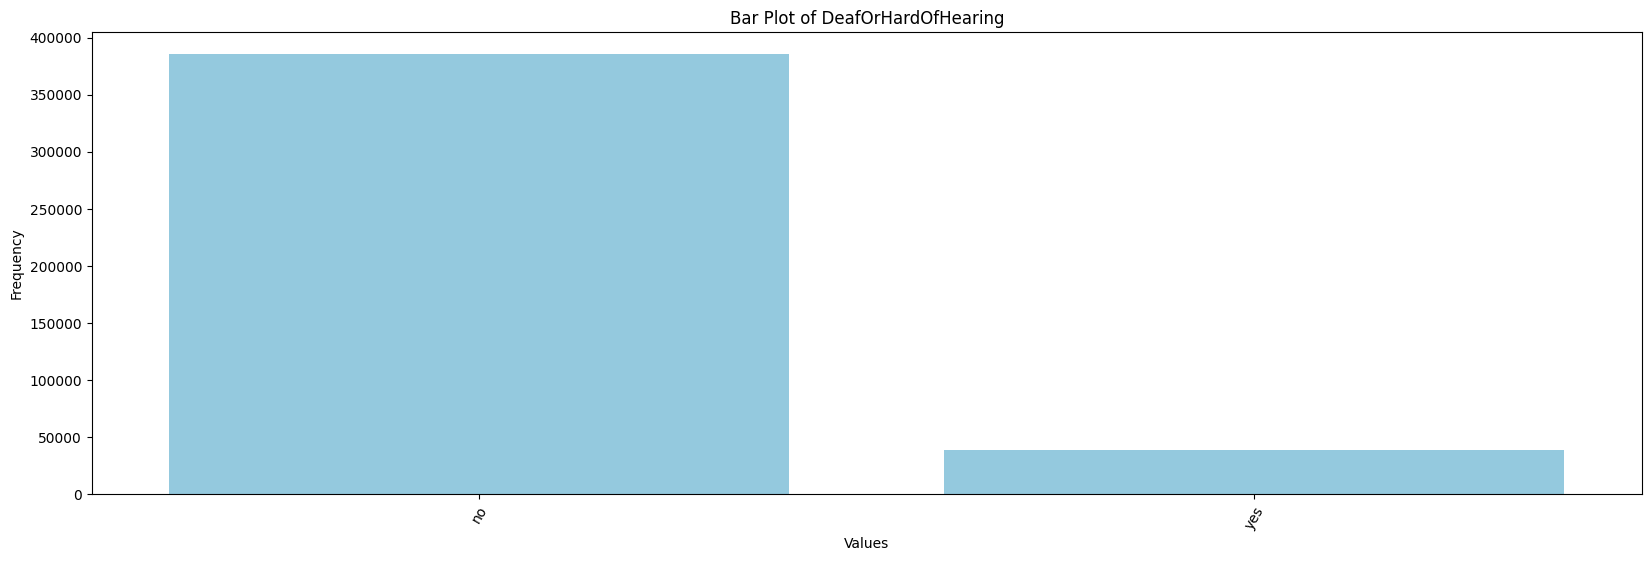

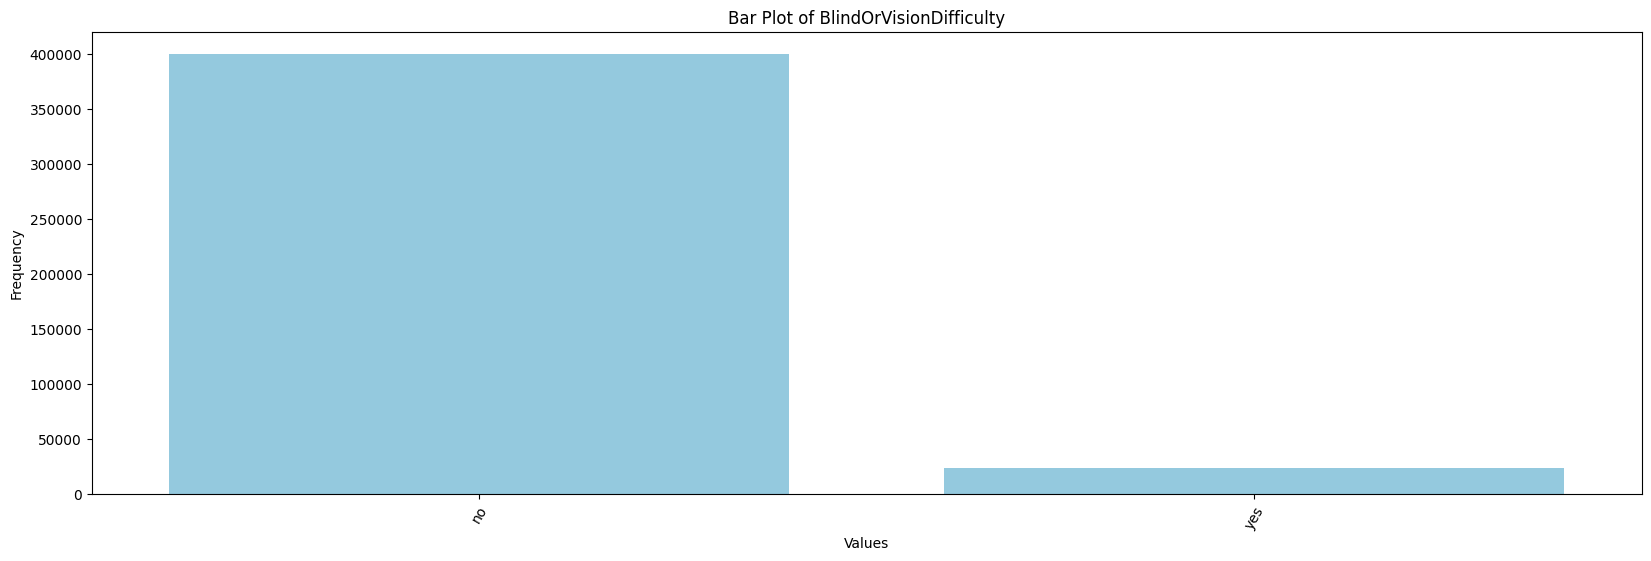

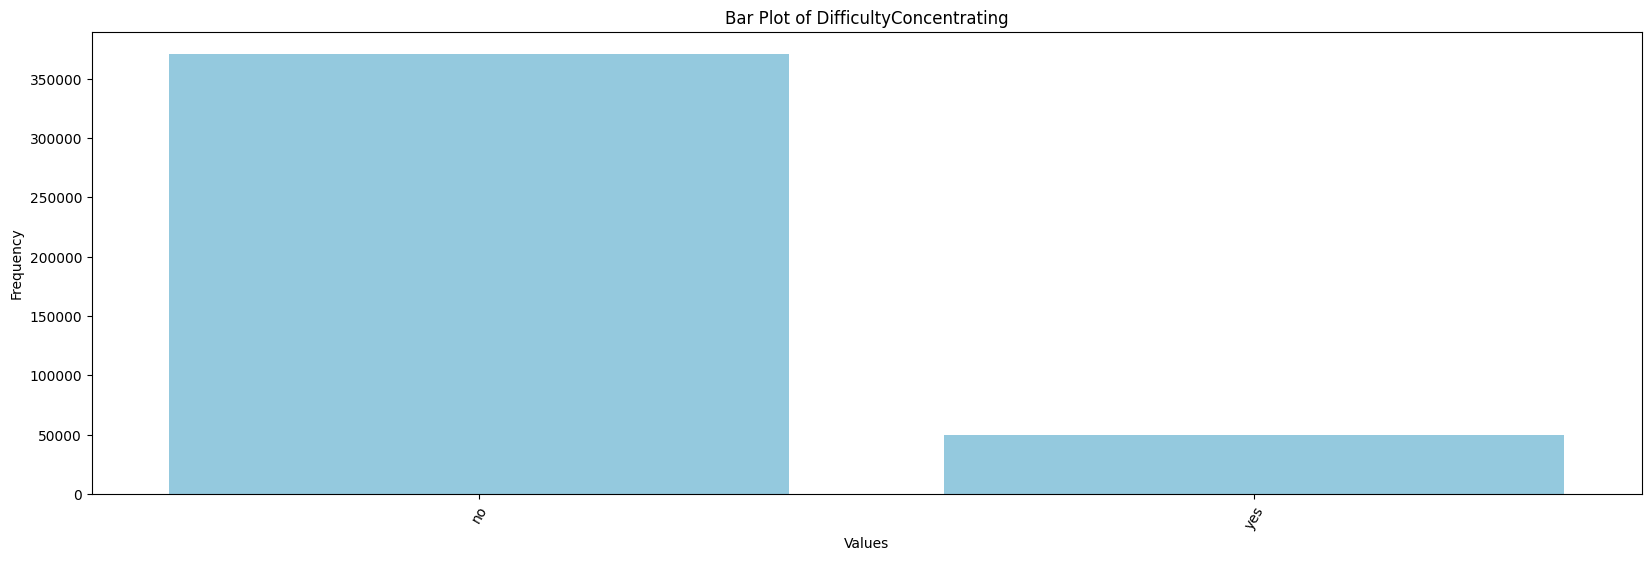

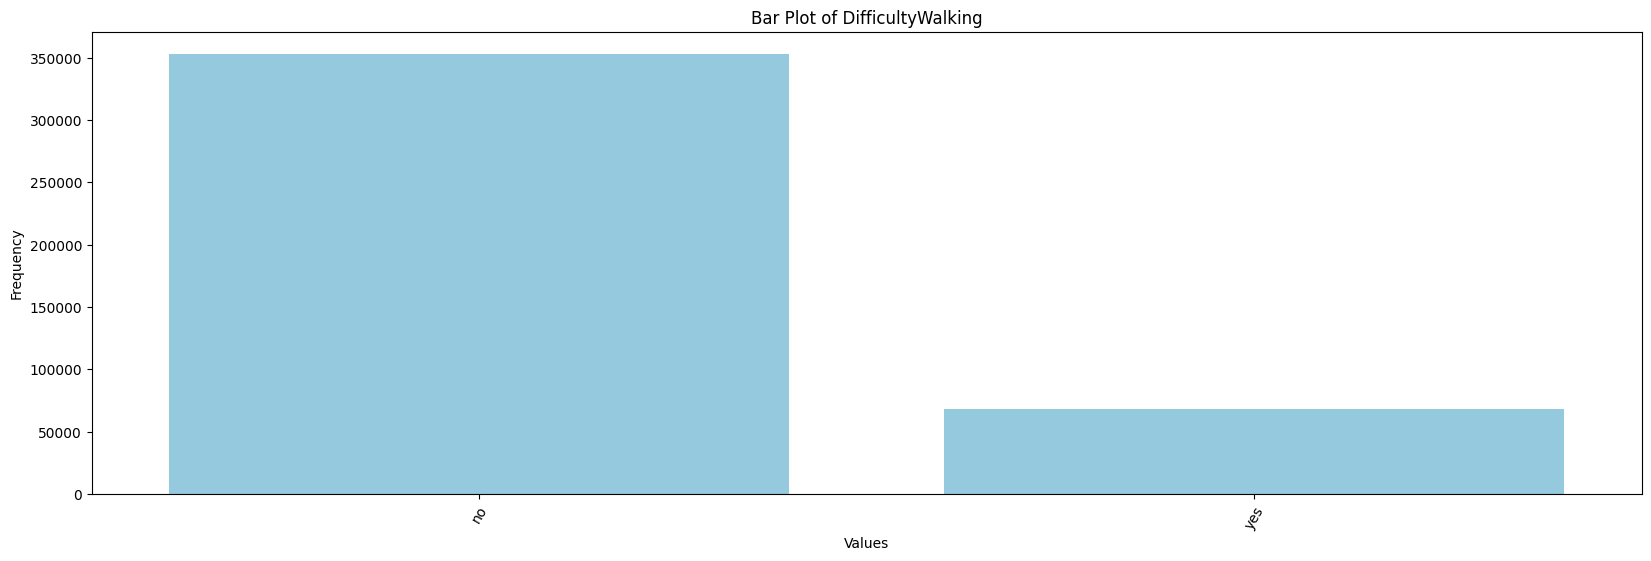

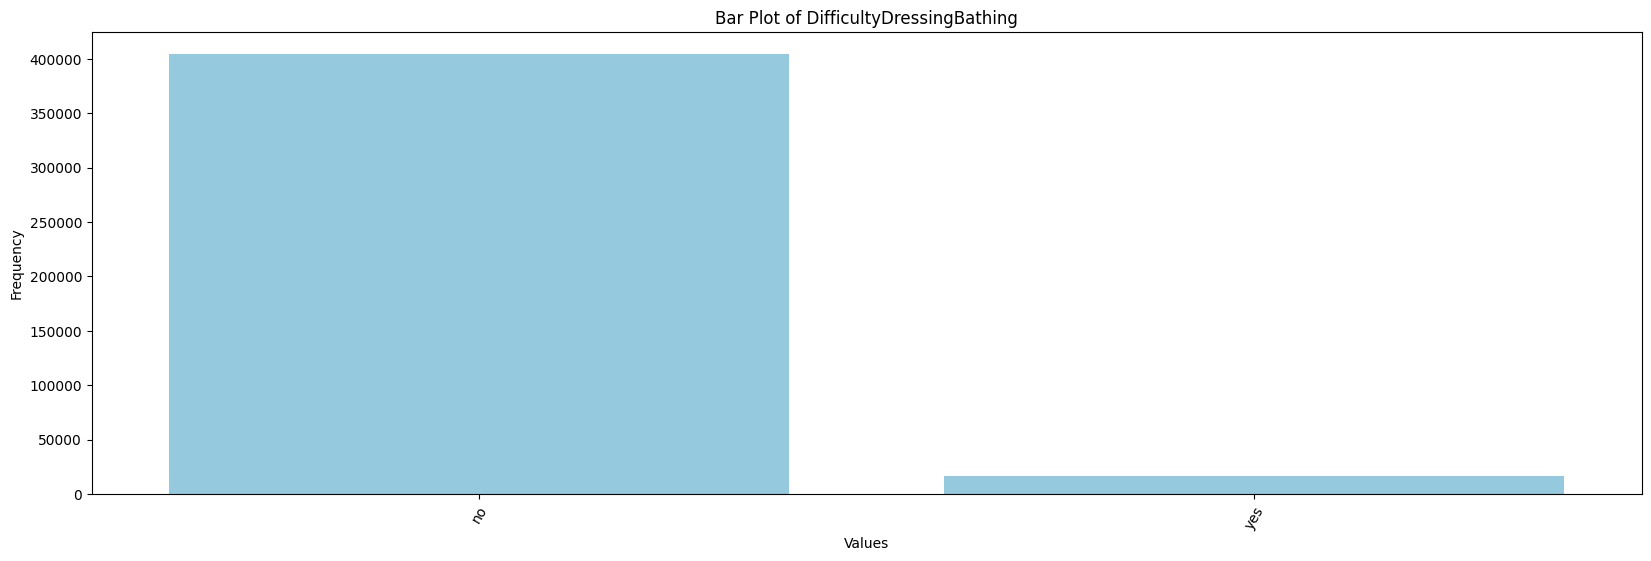

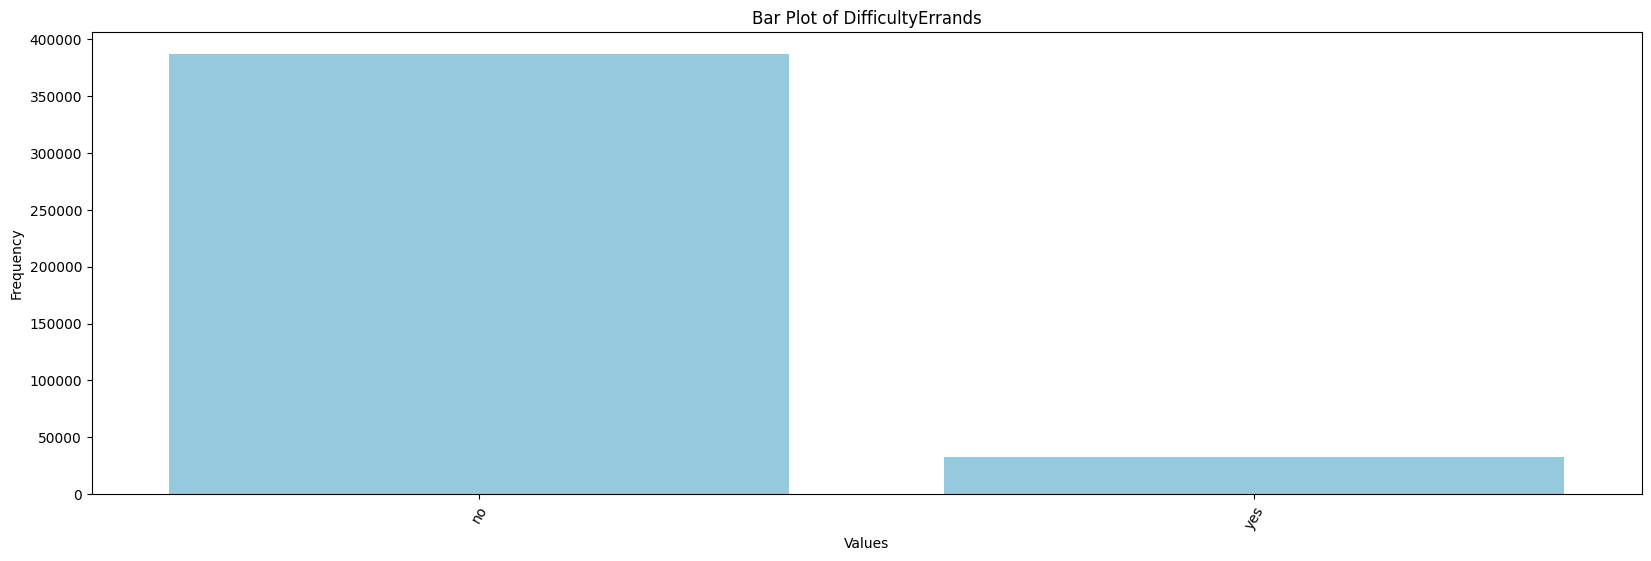

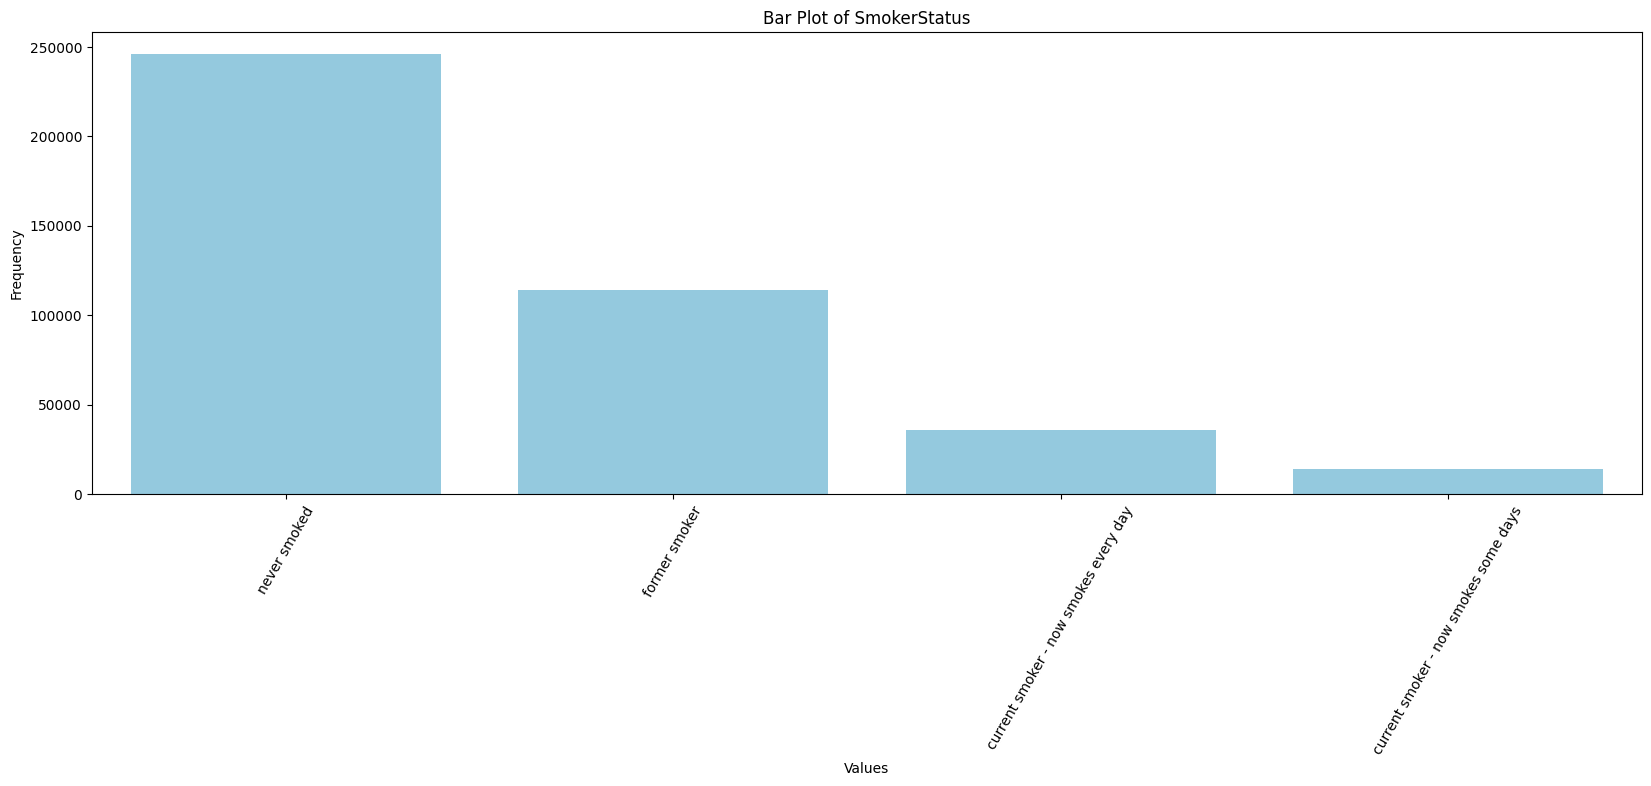

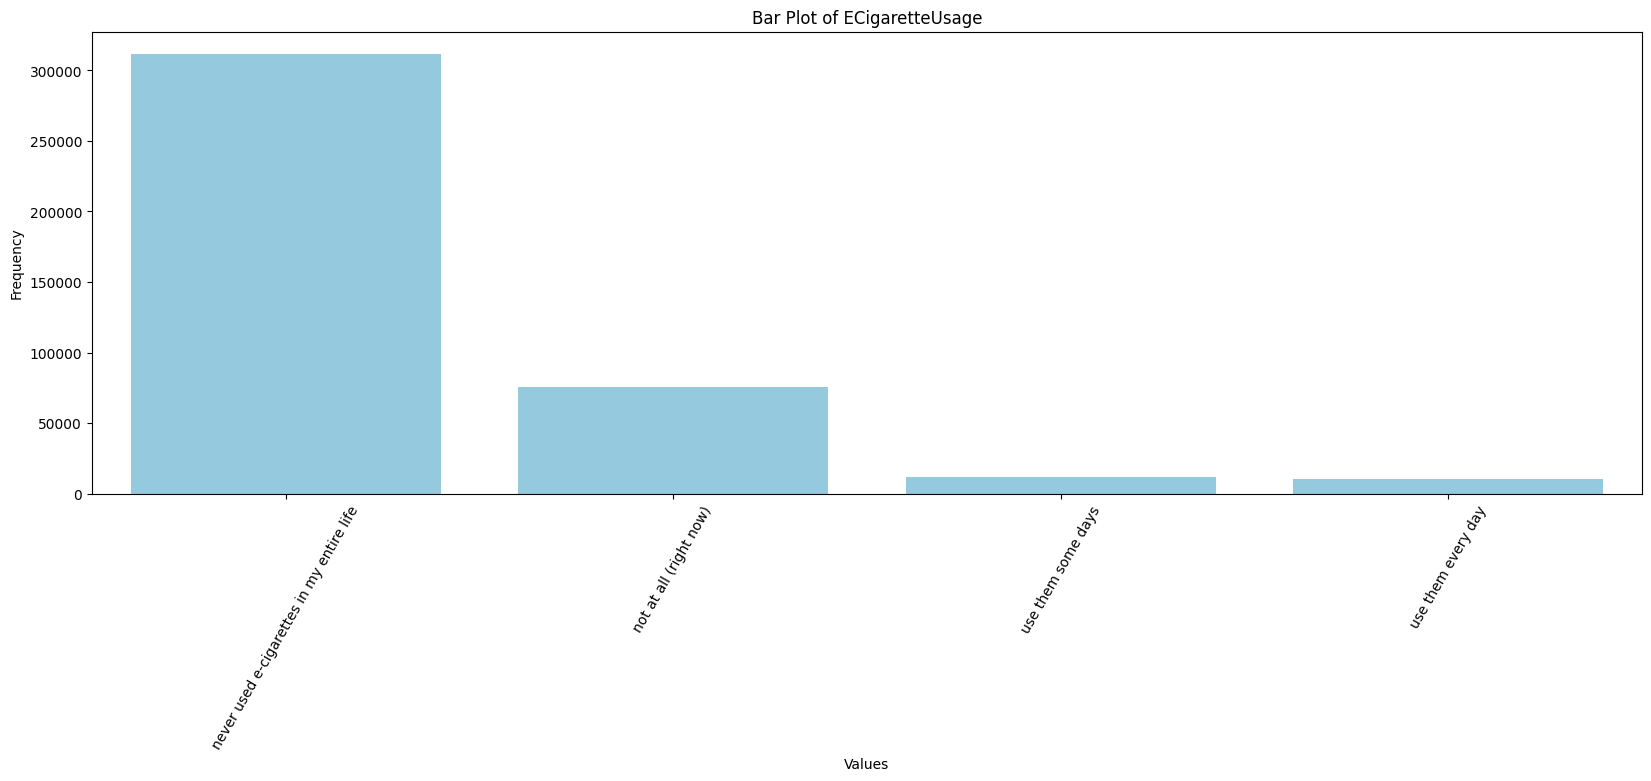

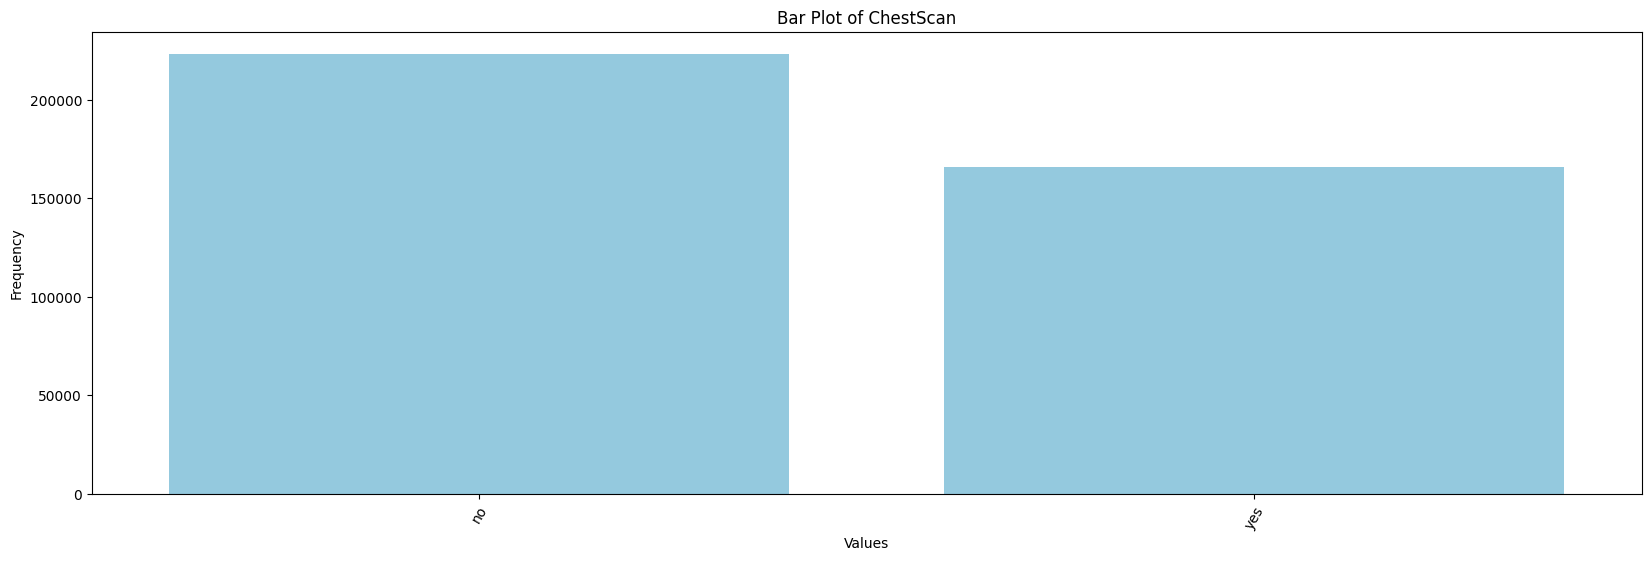

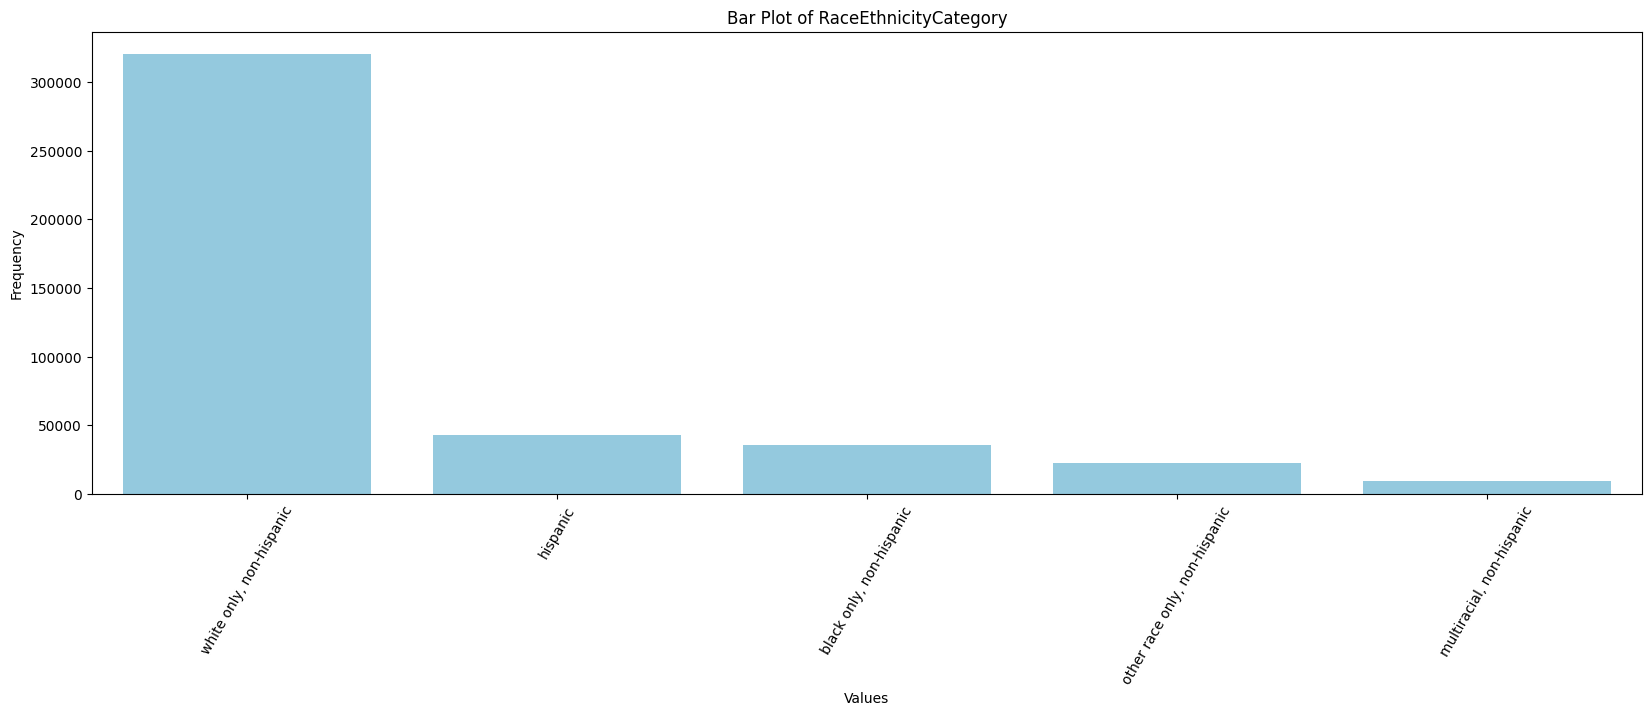

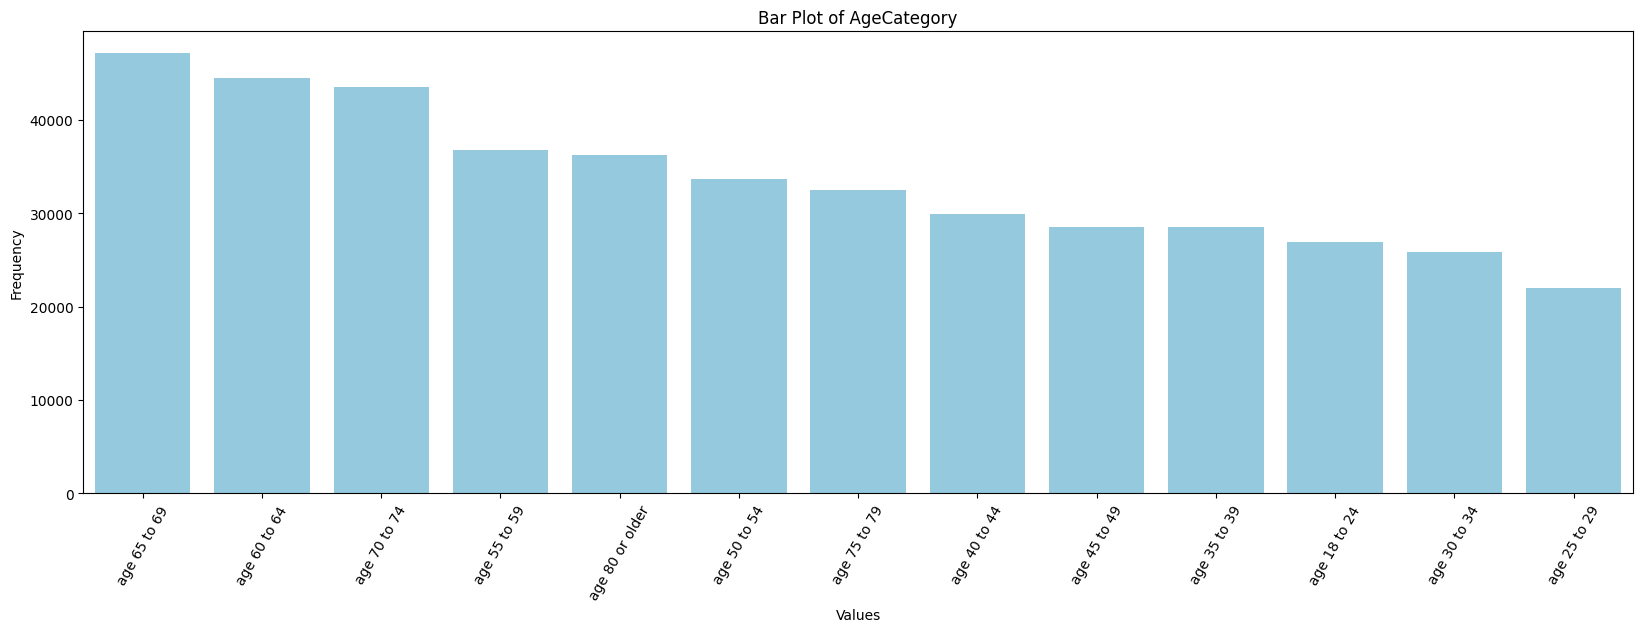

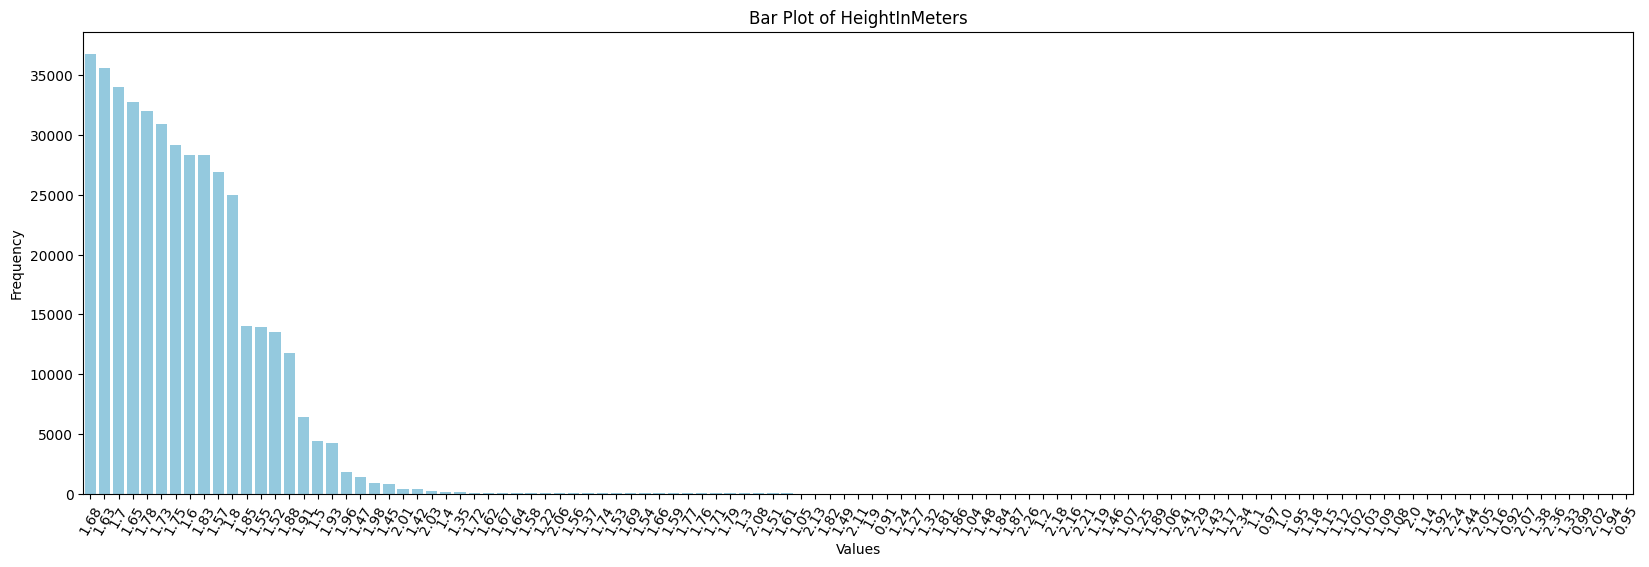

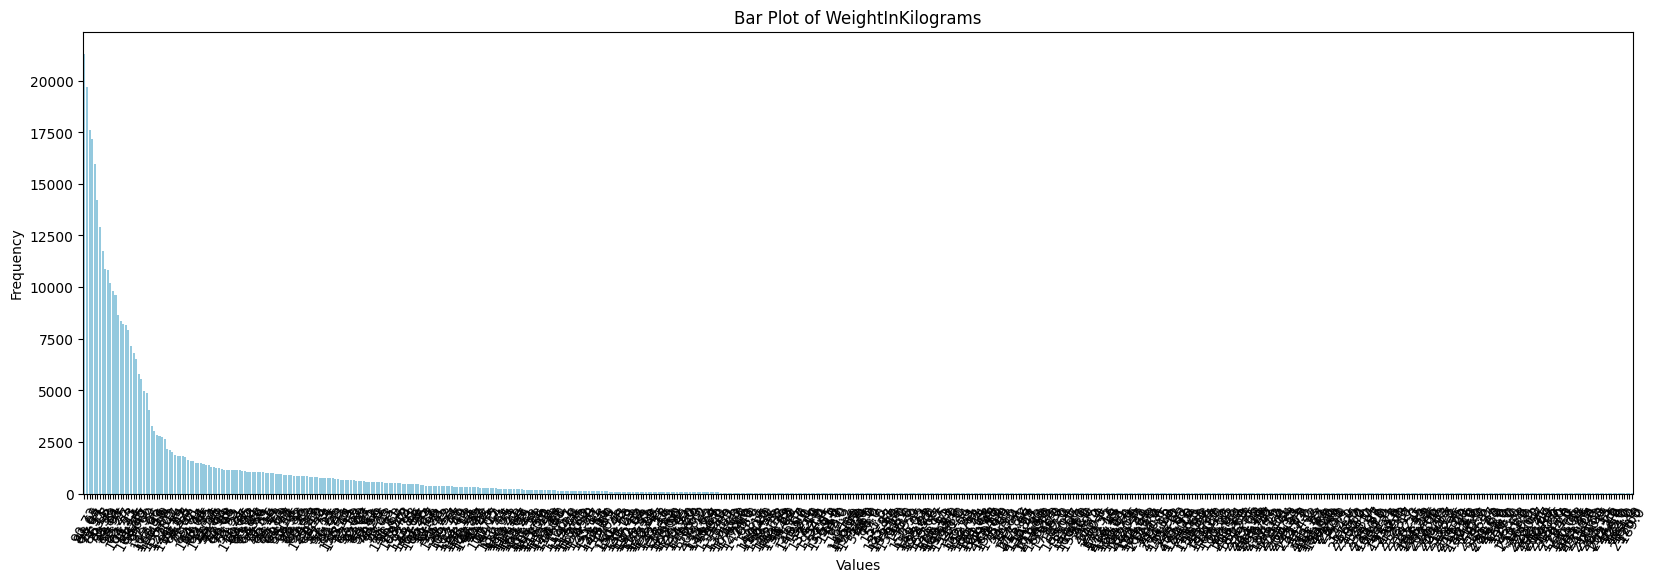

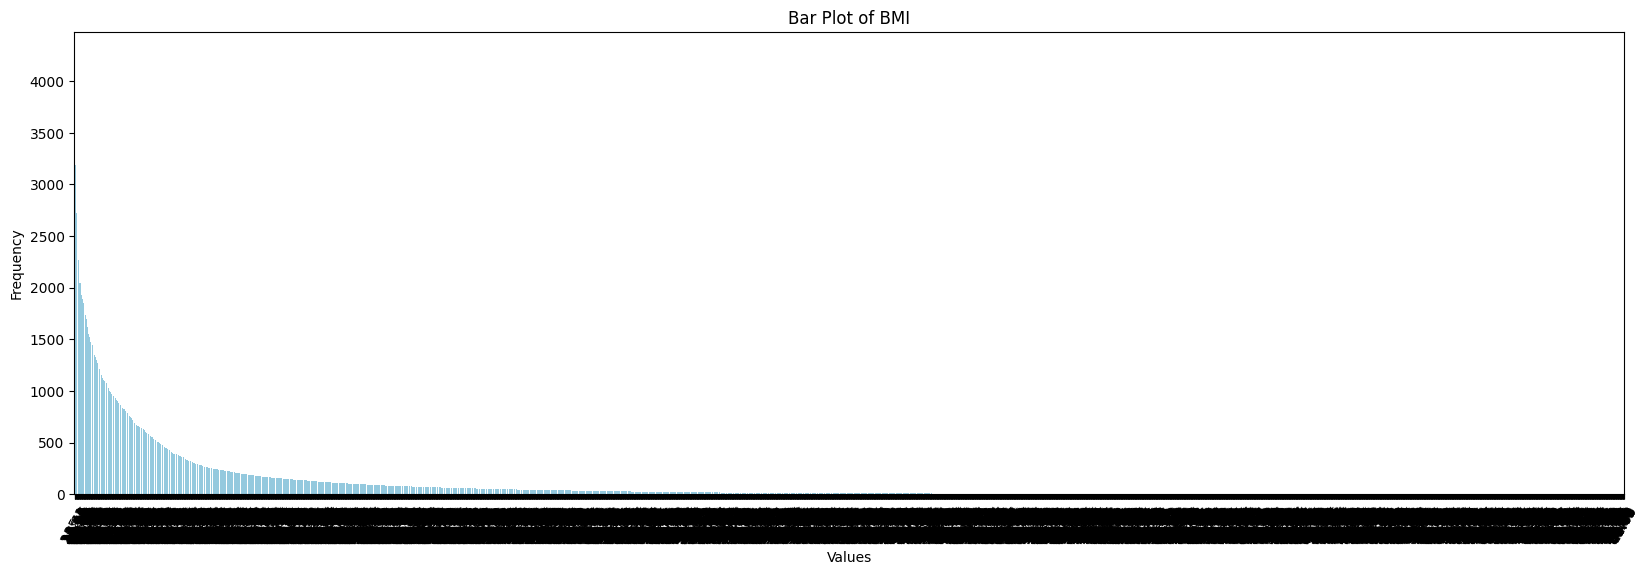

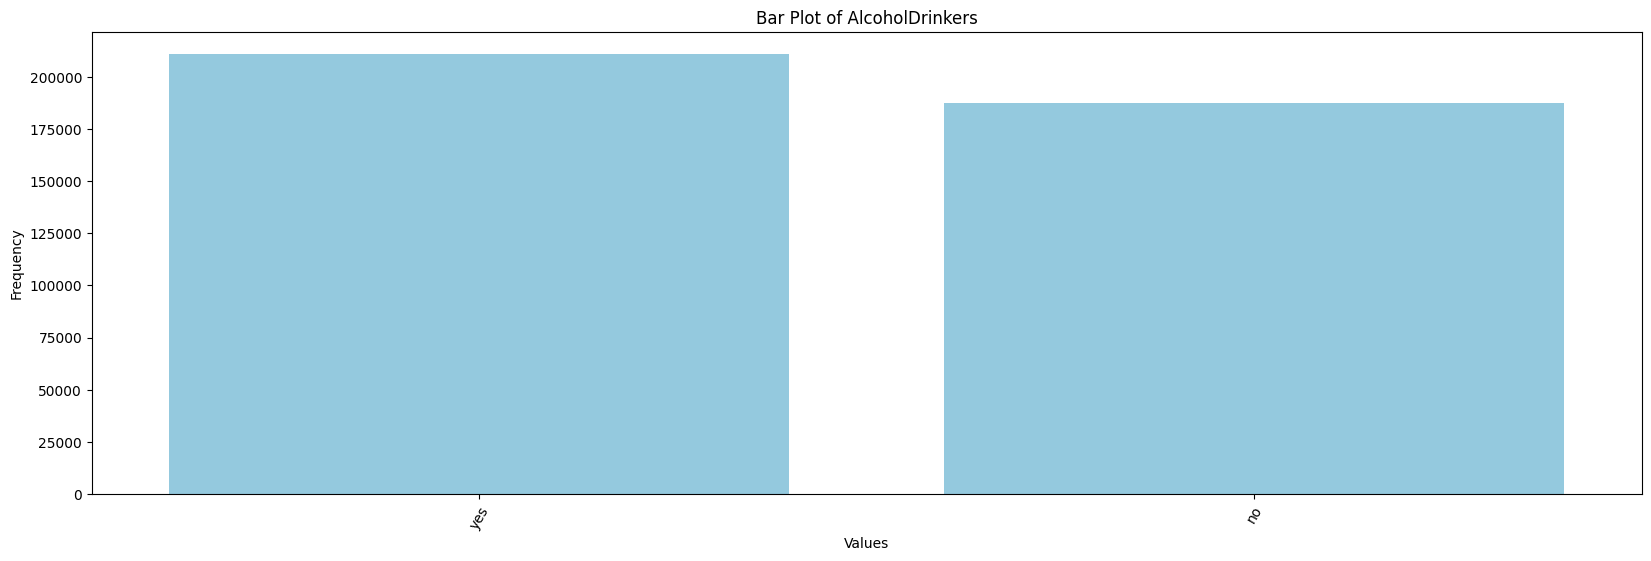

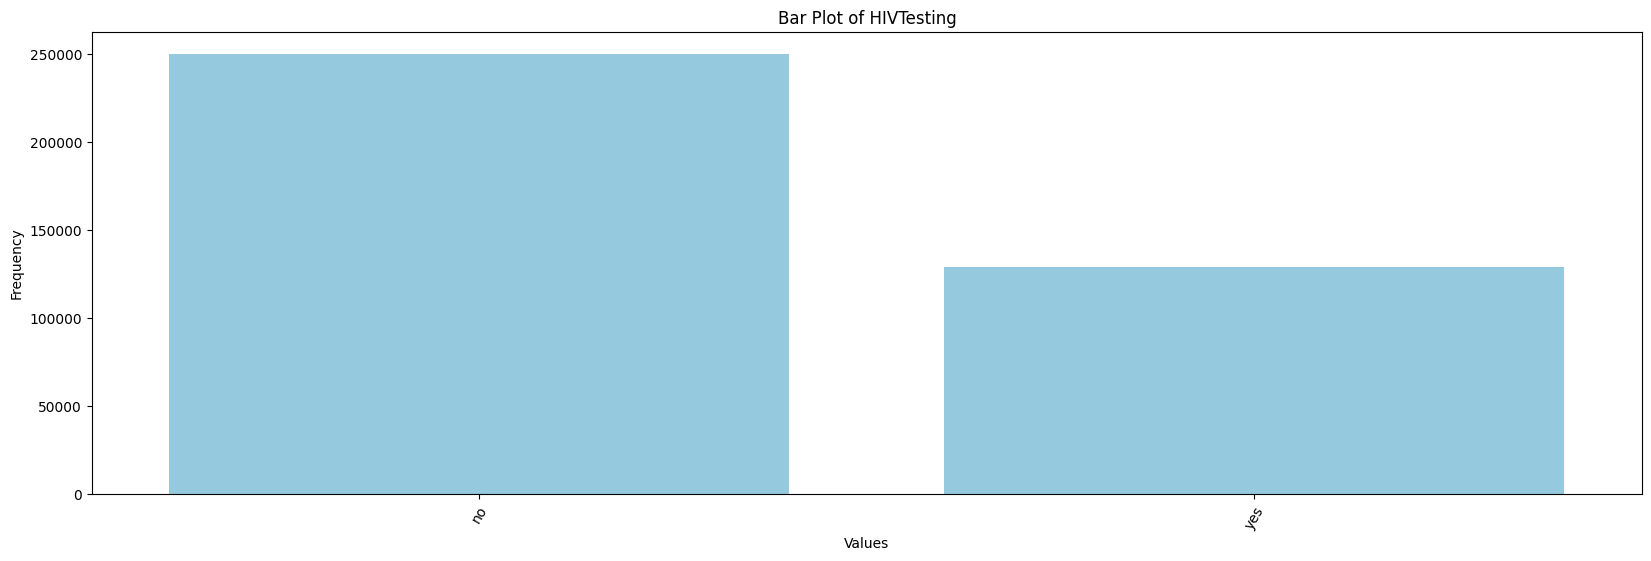

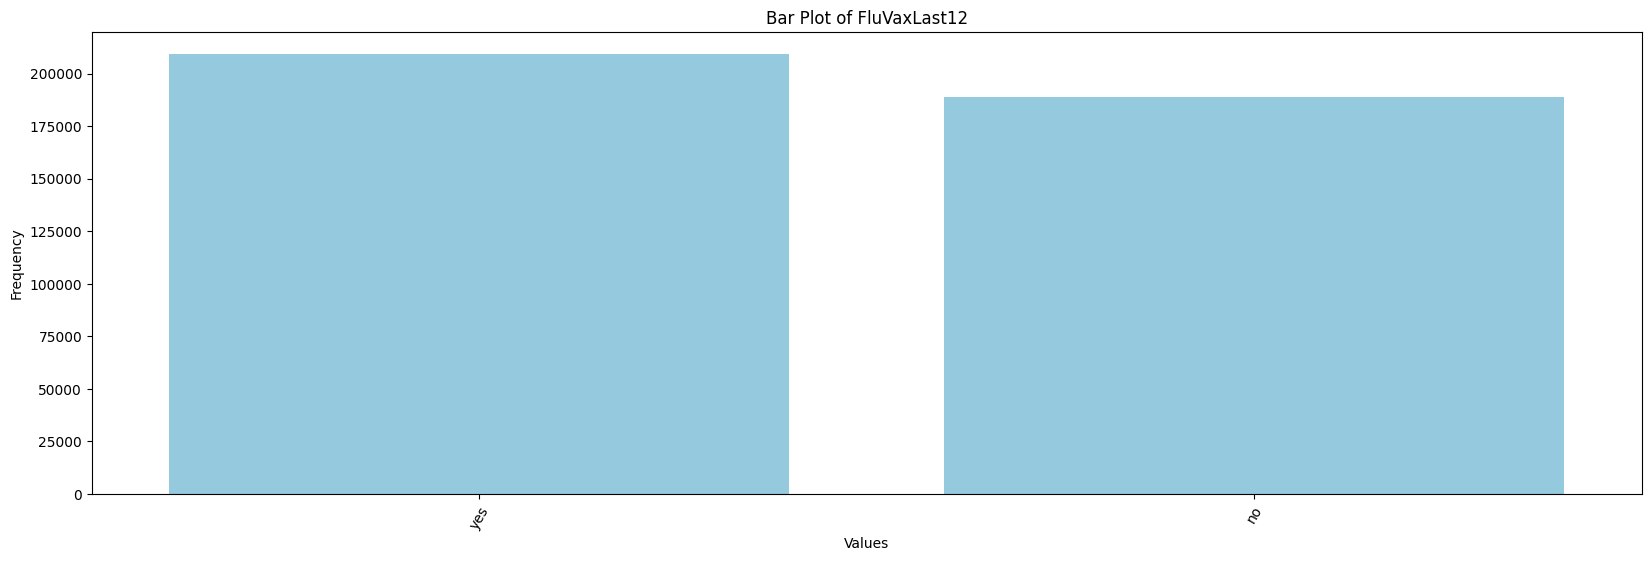

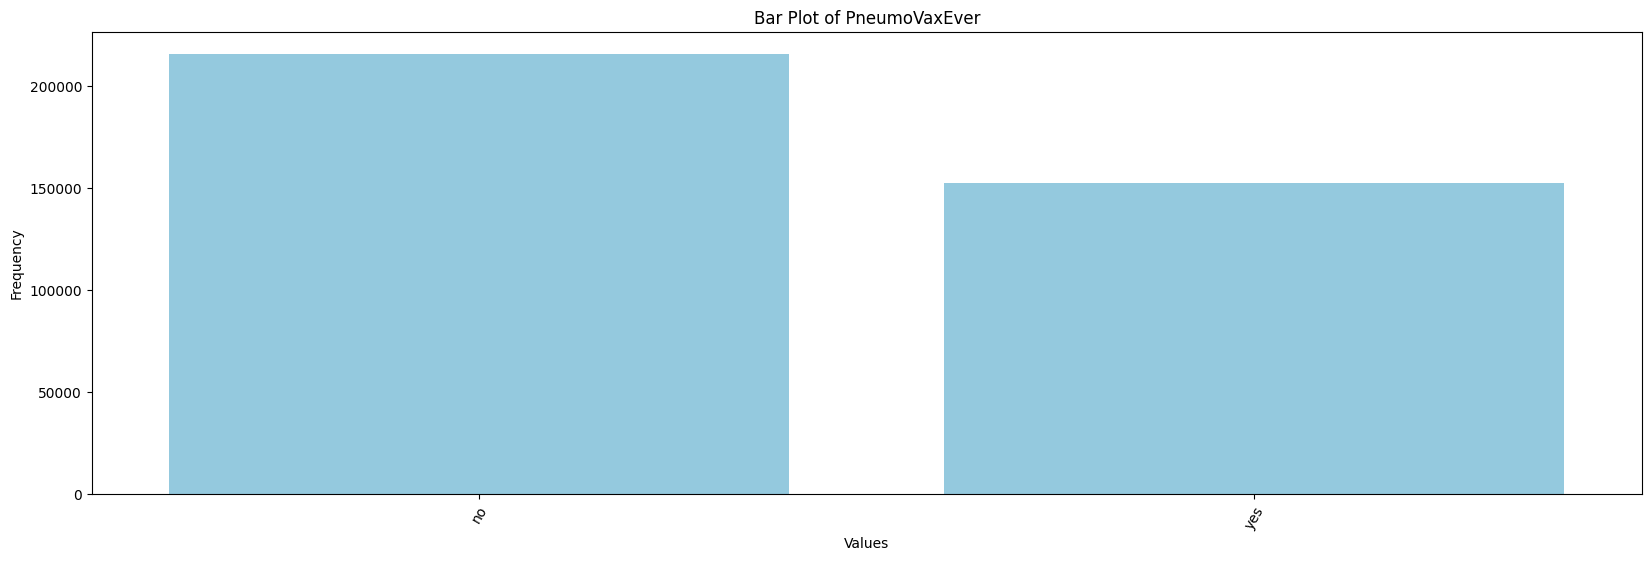

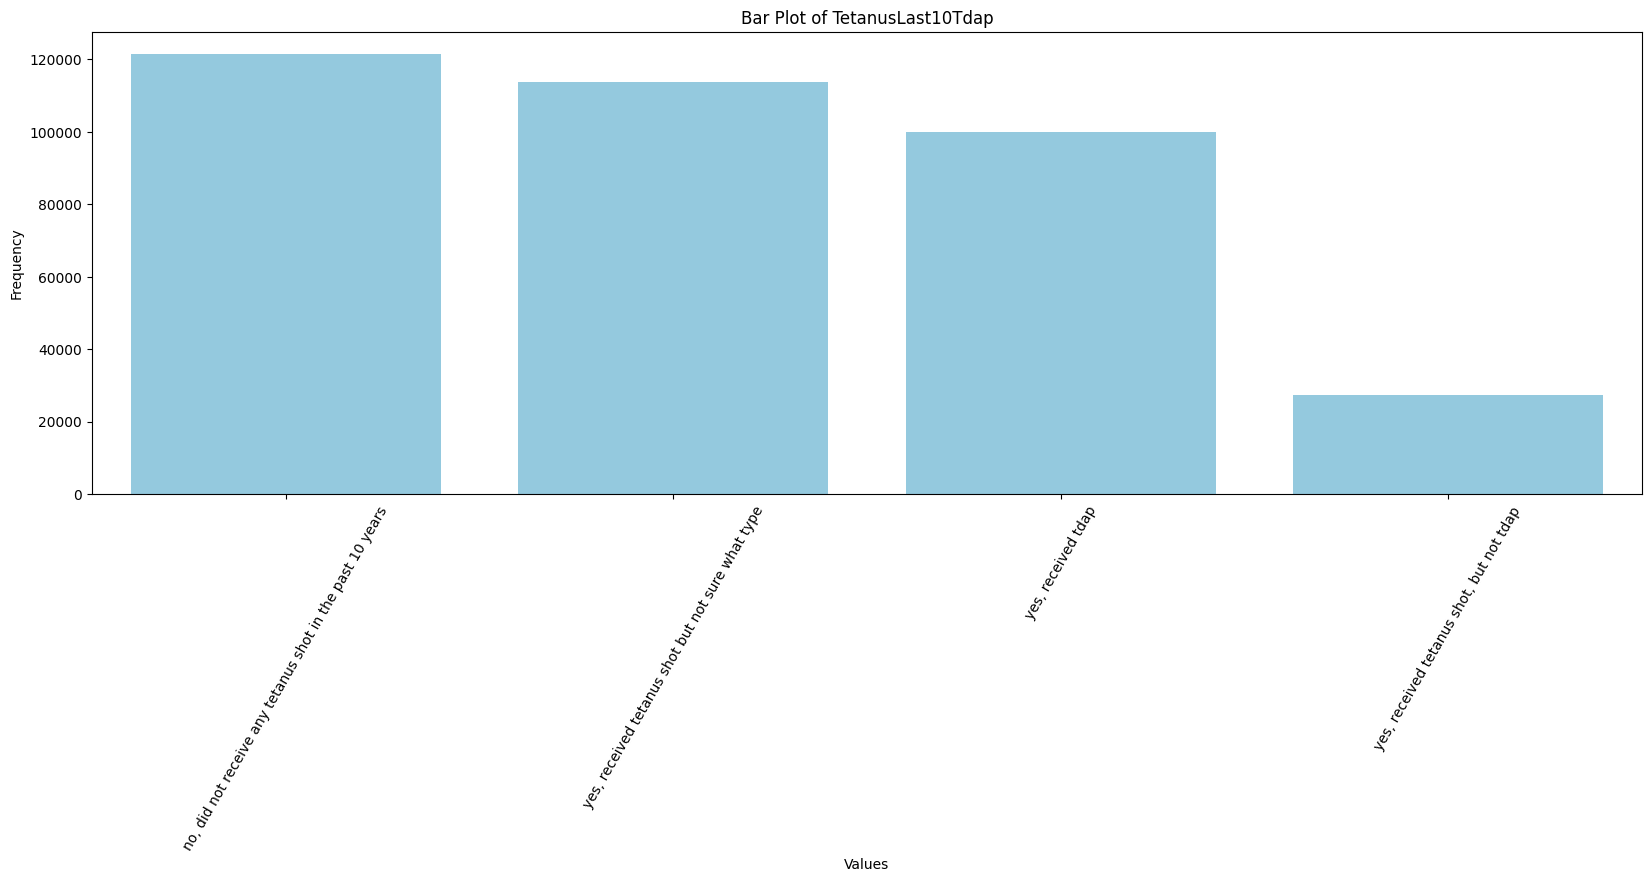

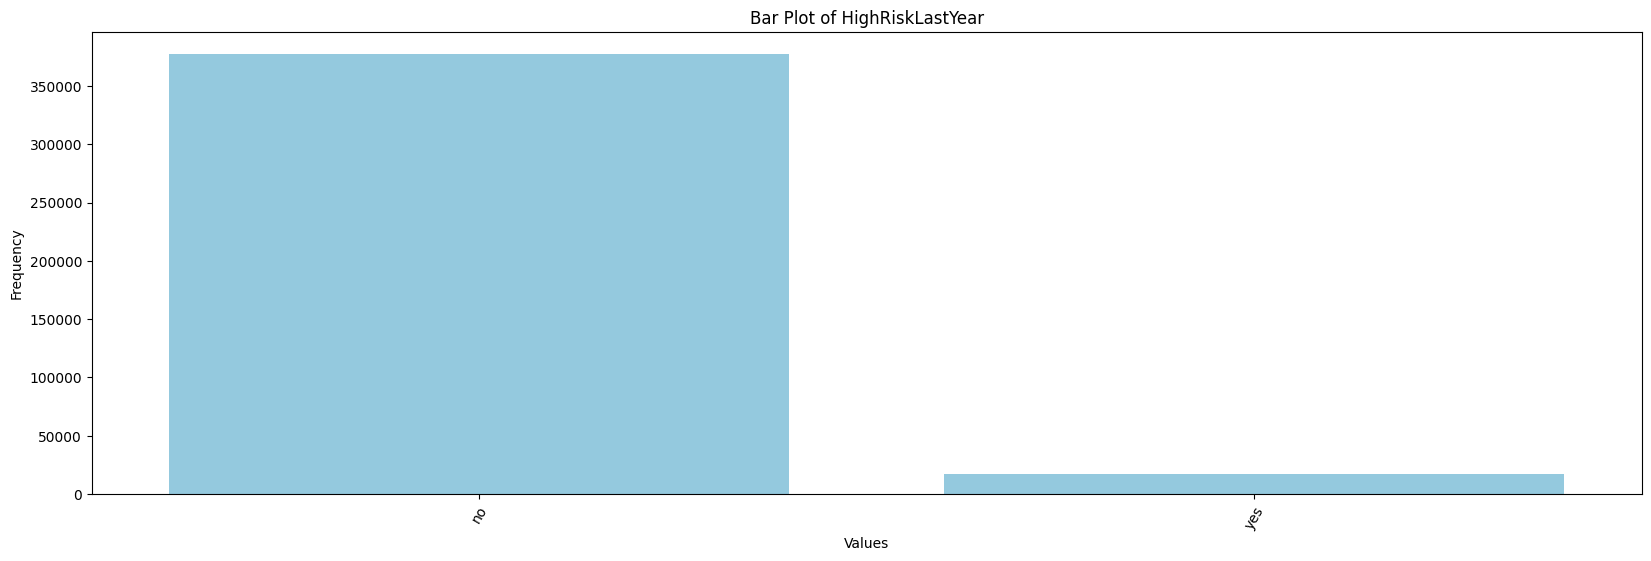

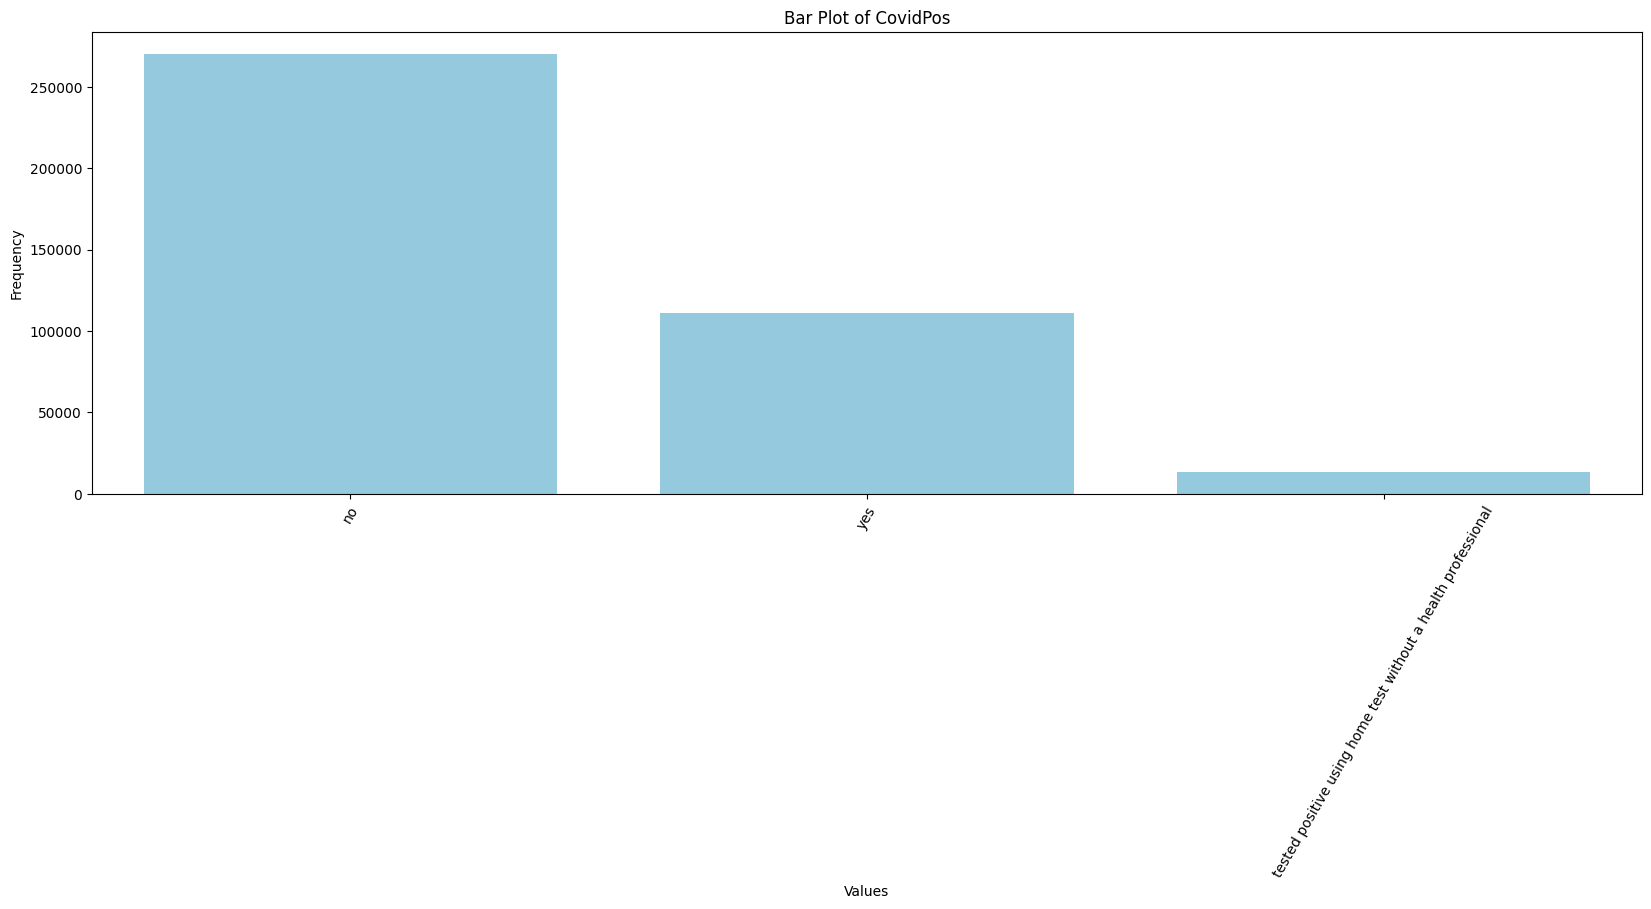

In [76]:
class DataFramePlotter:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def plot_bar_for_all_columns(self):
        for column in self.dataframe.columns:
            value_counts = self.dataframe[column].value_counts()
            plt.figure(figsize=(20, 6)) 
            sns.barplot(x=value_counts.index.astype(str), y=value_counts.values, color='skyblue')
            plt.title(f'Bar Plot of {column}')
            plt.xlabel('Values')
            plt.ylabel('Frequency')
            plt.xticks(rotation=60)  
            plt.show()

plotter = DataFramePlotter(data)
plotter.plot_bar_for_all_columns()

In [77]:
class DataFrameNaNChecker:
    def __init__(self, dataframe):
        self.dataframe = dataframe

    def check_nan_values(self):
        for column in self.dataframe.columns:
            nan_count = self.dataframe[column].isna().sum()
            if nan_count > 0:
                print(f"{column}: {nan_count} NaN values")
            else:
                print(f"{column}: No NaN values")

    def plot_nan_distribution(self, figsize=(18, 12)):

        nan_counts = self.dataframe.isna().sum() 
        plt.figure(figsize=figsize)  
        sns.barplot(x=nan_counts.index, y=nan_counts.values, color='skyblue')
        plt.title('Distribution of NaN Values by Column')
        plt.xlabel('Columns')
        plt.ylabel('Number of NaN Values')
        plt.xticks(rotation=45) 
        plt.grid(True)
        plt.show()


NaNchecker = DataFrameNaNChecker(data)
NaNchecker.check_nan_values()

State: No NaN values
Sex: No NaN values
GeneralHealth: 1198 NaN values
PhysicalHealthDays: 10927 NaN values
MentalHealthDays: 9067 NaN values
LastCheckupTime: 8308 NaN values
PhysicalActivities: 1093 NaN values
SleepHours: 5453 NaN values
RemovedTeeth: 11360 NaN values
HadHeartAttack: 3065 NaN values
HadAngina: 4405 NaN values
HadStroke: 1557 NaN values
HadAsthma: 1773 NaN values
HadSkinCancer: 3143 NaN values
HadCOPD: 2219 NaN values
HadDepressiveDisorder: 2812 NaN values
HadKidneyDisease: 1926 NaN values
HadArthritis: 2633 NaN values
HadDiabetes: 1087 NaN values
DeafOrHardOfHearing: 20647 NaN values
BlindOrVisionDifficulty: 21564 NaN values
DifficultyConcentrating: 24240 NaN values
DifficultyWalking: 24012 NaN values
DifficultyDressingBathing: 23915 NaN values
DifficultyErrands: 25656 NaN values
SmokerStatus: 35462 NaN values
ECigaretteUsage: 35660 NaN values
ChestScan: 56046 NaN values
RaceEthnicityCategory: 14057 NaN values
AgeCategory: 9079 NaN values
HeightInMeters: 28652 NaN val

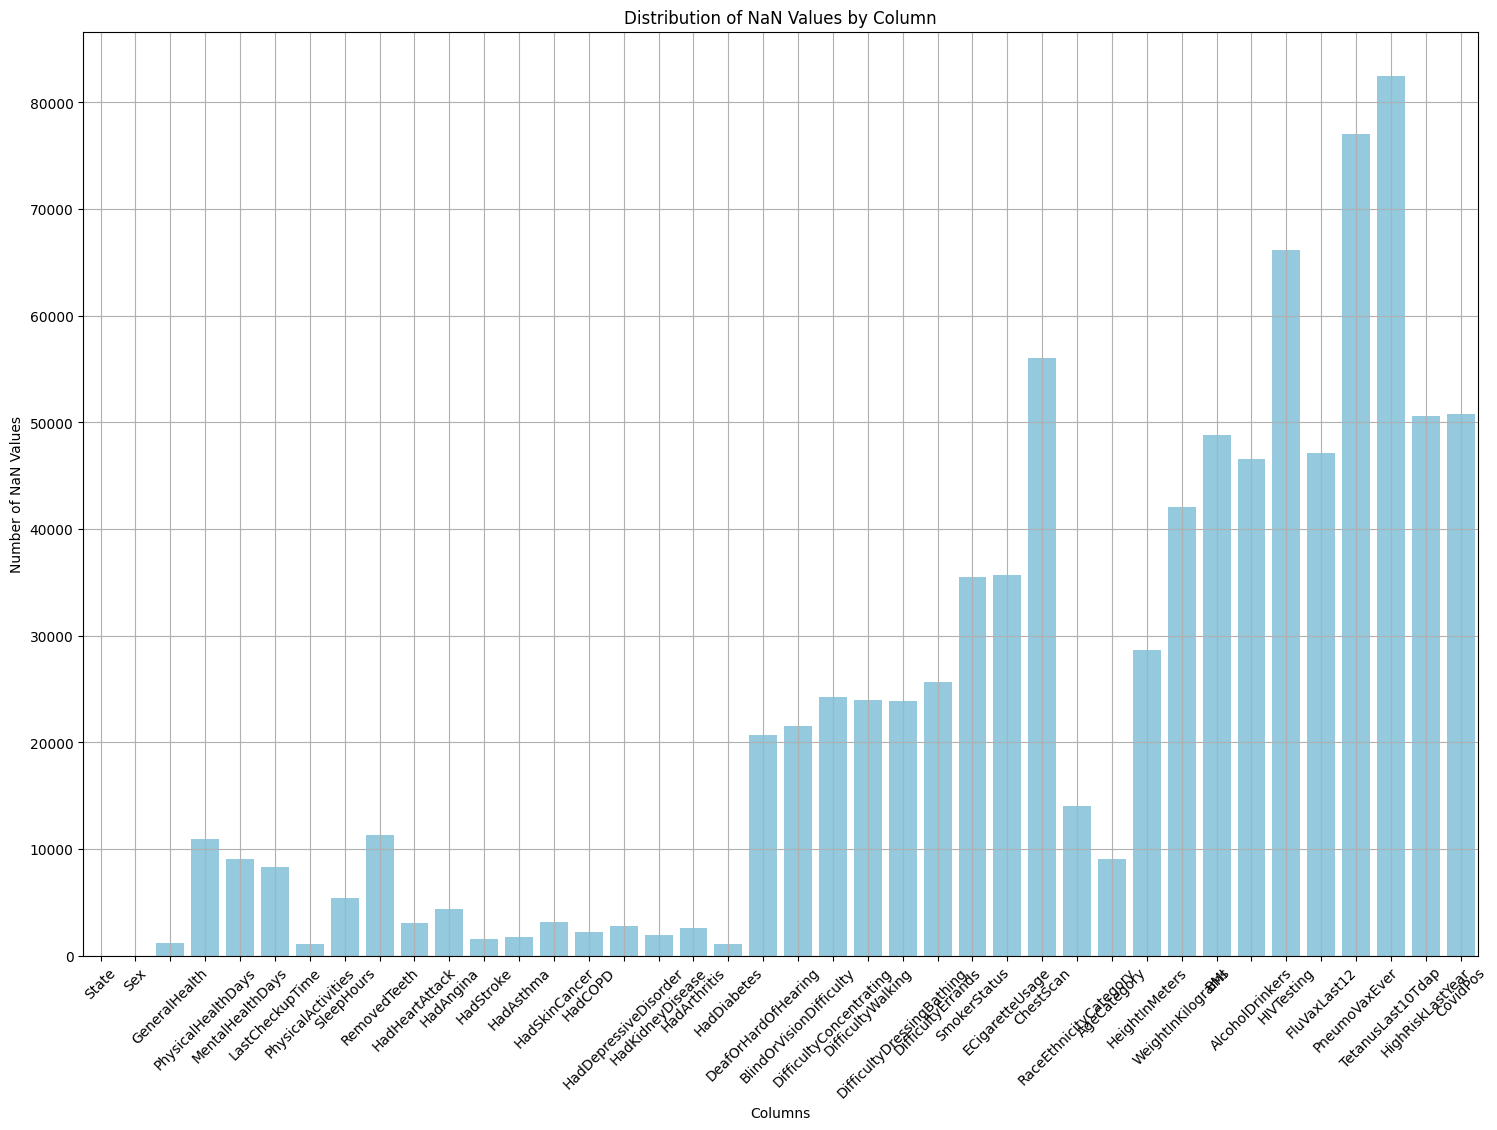

In [78]:
NaNchecker.plot_nan_distribution()

In [79]:
data = data.drop(columns=['RemovedTeeth', 'LastCheckupTime', 'HIVTesting', 
                          'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap', 'ECigaretteUsage'])

In [80]:
class BMIFiller:
    def __init__(self, data):
        self.data = data
        self.nan_filled_count = None
    
    def fill_na_bmi(self):
        initial_nan_count = self.data['BMI'].isna().sum()
        
        mask = ~self.data['HeightInMeters'].isna() & ~self.data['WeightInKilograms'].isna()
        self.data.loc[mask, 'BMI'] = self.data.loc[mask, 'WeightInKilograms'] / (self.data.loc[mask, 'HeightInMeters'] ** 2)
        
        self.data['BMI'] = self.data['BMI'].round(1)
        
        final_nan_count = self.data['BMI'].isna().sum()
        self.nan_filled_count = initial_nan_count - final_nan_count
        
        return self.data, self.nan_filled_count

bmi_filler = BMIFiller(data)
data, filler_count_bmi = bmi_filler.fill_na_bmi()
print(f"Number of NaN values filled: {filler_count_bmi}")

Number of NaN values filled: 2238


In [81]:
data = data.drop(columns=['HeightInMeters', 'WeightInKilograms'])

In [82]:
class DataAssumptionTester:
    def __init__(self, data, outcome):
        
        self.data = data
        self.outcome = outcome

    def test_association(self, condition):
        
        contingency_table = pd.crosstab(self.data[condition], self.data[self.outcome], dropna=False)
        
        chi2, p_value, _, _ = chi2_contingency(contingency_table)
        
        print(f"\nChi-Squared Test for {condition}:")
        print(f"Chi2 Statistic: {chi2}, P-value: {p_value}")
        print("Contingency Table:")
        print(contingency_table)

    def run_tests(self, conditions):
        
        for condition in conditions:
            self.test_association(condition)



In [83]:
class ChestScanFiller:
    def __init__(self, data):
        self.data = data

    def fillna_chest_scans(self):

        conditions_chest_scan = (
            (self.data['HadHeartAttack'] == 'yes') |
            (self.data['HadAngina'] == 'yes') |
            (self.data['HadStroke'] == 'yes') |
            (self.data['HadCOPD'] == 'yes')
        )
        
        condition_indices = self.data[conditions_chest_scan].index
        
        nan_count_before = self.data.loc[condition_indices, 'ChestScan'].isna().sum()
        
        self.data.loc[condition_indices, 'ChestScan'] = self.data.loc[condition_indices, 'ChestScan'].fillna('yes')
        
        return self.data, nan_count_before


data_filler_chest= ChestScanFiller(data)
data, filler_count_chest = data_filler_chest.fillna_chest_scans()
print(f"Number of NaN values filled: {filler_count_chest}")

Number of NaN values filled: 9495


In [84]:
chestscan_column = 'ChestScan'
chest_scan_conditions = ['HadHeartAttack', 'HadAngina', 'HadStroke', 'HadCOPD']

chest_scan_tester = DataAssumptionTester(data, chestscan_column)
chest_scan_tester.run_tests(chest_scan_conditions)


Chi-Squared Test for HadHeartAttack:
Chi2 Statistic: 19741.481940225145, P-value: 0.0
Contingency Table:
ChestScan           no     yes    NaN
HadHeartAttack                       
no              217384  153615  45960
yes               4921   20187      0
NaN                916    1558    591

Chi-Squared Test for HadAngina:
Chi2 Statistic: 22793.89728109877, P-value: 0.0
Contingency Table:
ChestScan      no     yes    NaN
HadAngina                       
no         217286  150955  45935
yes          4958   21593      0
NaN           977    2812    616

Chi-Squared Test for HadStroke:
Chi2 Statistic: 13895.149277091728, P-value: 0.0
Contingency Table:
ChestScan      no     yes    NaN
HadStroke                       
no         218752  159395  46189
yes          4089   15150      0
NaN           380     815    362

Chi-Squared Test for HadCOPD:
Chi2 Statistic: 27530.980022415253, P-value: 0.0
Contingency Table:
ChestScan      no     yes    NaN
HadCOPD                         
no      

In [85]:
class MobilityIssueFiller:
    def __init__(self, data):
        self.data = data

    def fillna_mobility_issues(self):

        condition_arthritis = self.data['HadArthritis'] == 'yes'

        mobility_issues_columns = ['DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands']
        
        arthritis_indices = self.data[condition_arthritis].index
        
        nan_count_before = self.data.loc[arthritis_indices, mobility_issues_columns].isna().sum().sum()
        
        self.data.loc[arthritis_indices, mobility_issues_columns] = self.data.loc[arthritis_indices, mobility_issues_columns].fillna('yes')
        
        return self.data, nan_count_before

    
filler_mobility_issue = MobilityIssueFiller(data)
data, filler_count_mobility = filler_mobility_issue.fillna_mobility_issues()
print(f"Number of NaN values filled: {filler_count_mobility}")

Number of NaN values filled: 20014


In [86]:
mobility_issues_columns = ['DifficultyWalking', 'DifficultyDressingBathing', 'DifficultyErrands']
arthritis_condition = 'HadArthritis'

mobility_tester = DataAssumptionTester(data, arthritis_condition)
mobility_tester.run_tests(mobility_issues_columns)


Chi-Squared Test for DifficultyWalking:
Chi2 Statistic: 66453.53619019782, P-value: 0.0
Contingency Table:
HadArthritis           no    yes   NaN
DifficultyWalking                     
no                 254492  96808  1739
yes                 19847  54340   561
NaN                 17012      0   333

Chi-Squared Test for DifficultyDressingBathing:
Chi2 Statistic: 29523.90735341209, P-value: 0.0
Contingency Table:
HadArthritis                   no     yes   NaN
DifficultyDressingBathing                      
no                         269155  133131  2118
yes                          4953   18017   194
NaN                         17243       0   321

Chi-Squared Test for DifficultyErrands:
Chi2 Statistic: 29075.75282702037, P-value: 0.0
Contingency Table:
HadArthritis           no     yes   NaN
DifficultyErrands                      
no                 260096  124968  1965
yes                 12928   26180   335
NaN                 18327       0   333


In [87]:
class MentalHealthFiller:
    def __init__(self, data):
        self.data = data
        self.nan_filled_count = None
    
    def fill_depressive_disorder(self):
        
        condition_mask = self.data['HadDepressiveDisorder'].isna() & (self.data['MentalHealthDays'] > 15)
        
        initial_nan_count = self.data['HadDepressiveDisorder'].isna().sum()

        self.data.loc[condition_mask, 'HadDepressiveDisorder'] = 'yes'

        final_nan_count = self.data['HadDepressiveDisorder'].isna().sum()
        
        self.nan_filled_count = initial_nan_count - final_nan_count
        
        return self.data, self.nan_filled_count

    
mental_health_filler = MentalHealthFiller(data)
data, filled_count_mental = mental_health_filler.fill_depressive_disorder()
print(f"Number of NaN values filled: {filled_count_mental}")

Number of NaN values filled: 571


In [88]:
mental_health_column = ['MentalHealthDays']
mental_health_conditions = 'HadDepressiveDisorder'

mental_health_tester = DataAssumptionTester(data, mental_health_conditions )
mental_health_tester.run_tests(mental_health_column)


Chi-Squared Test for MentalHealthDays:
Chi2 Statistic: 96818.70836256427, P-value: 0.0
Contingency Table:
HadDepressiveDisorder      no    yes  NaN
MentalHealthDays                         
0.0                    243211  21219  799
1.0                     11890   2438   81
2.0                     18323   5320  142
3.0                     10988   4269   88
4.0                      5475   2418   50
5.0                     13360   6444  147
6.0                      1413    867   25
7.0                      4850   2909   85
8.0                      1056    679   14
9.0                       176    143    3
10.0                     8696   6572  146
11.0                       61     58    2
12.0                      655    583   21
13.0                       81     86    2
14.0                     1548   1301   22
15.0                     6814   7538  167
16.0                      116    164    0
17.0                       90    154    0
18.0                      134    185    0
19.0       

In [89]:
class GeneralHealthFiller:
    def __init__(self, data):
        self.data = data
        self.health_columns = [
            'HadHeartAttack', 'HadAngina', 'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD', 
            'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis', 'HadDiabetes', 'DeafOrHardOfHearing',
            'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking', 'DifficultyDressingBathing',
            'DifficultyErrands', 'HighRiskLastYear'
        ]

    def fillna_general_health(self, condition_type):

        if condition_type == 'excellent':
            condition = (self.data[self.health_columns] == 'no').all(axis=1) & \
                        (self.data['SmokerStatus'] == 'never smoked') & \
                        (self.data['PhysicalActivities'] == 'yes')
            value_to_fill = 'excellent'

        elif condition_type == 'good':
            condition = (self.data[self.health_columns] == 'no').all(axis=1) & \
                        self.data['SmokerStatus'].isin(['never smoked', 'former smoker', 'current smoker - now smokes some days']) & \
                        (self.data['PhysicalActivities'] == 'yes') & \
                        self.data['AlcoholDrinkers'].isin(['yes', 'no'])
            value_to_fill = 'good'

        elif condition_type == 'poor':
            self.data['Yes_Count'] = (self.data[self.health_columns] == 'yes').sum(axis=1)
            condition = (self.data['Yes_Count'] >= 3)
            value_to_fill = 'poor'
            self.data.drop(columns=['Yes_Count'], inplace=True)

        condition &= self.data['GeneralHealth'].isna()  
        count_before = condition.sum()  
        self.data.loc[condition, 'GeneralHealth'] = value_to_fill 

        return self.data, count_before

    
data_filler_health = GeneralHealthFiller(data)
data, filler_count_excellent = data_filler_health.fillna_general_health('excellent')
print(f"Number of records updated to 'excellent': {filler_count_excellent}")


data, filler_count_good = data_filler_health.fillna_general_health('good')
print(f"Number of records updated to 'good': {filler_count_good}")


data, filler_count_poor = data_filler_health.fillna_general_health('poor')
print(f"Number of records updated to 'poor': {filler_count_poor}")

Number of records updated to 'excellent': 70


Number of records updated to 'good': 21
Number of records updated to 'poor': 522


In [90]:
data.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,HadSkinCancer,HadCOPD,HadDepressiveDisorder,HadKidneyDisease,HadArthritis,HadDiabetes,DeafOrHardOfHearing,BlindOrVisionDifficulty,DifficultyConcentrating,DifficultyWalking,DifficultyDressingBathing,DifficultyErrands,SmokerStatus,ChestScan,RaceEthnicityCategory,AgeCategory,BMI,AlcoholDrinkers,HighRiskLastYear,CovidPos
0,Alabama,female,very good,0.0,0.0,no,8.0,no,no,no,no,no,no,no,no,no,yes,no,no,no,no,no,no,never smoked,no,"white only, non-hispanic",age 80 or older,NaN,no,no,no
1,Alabama,female,excellent,0.0,0.0,no,6.0,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,never smoked,no,"white only, non-hispanic",age 80 or older,26.6,no,no,no
2,Alabama,female,very good,2.0,3.0,yes,5.0,no,no,no,no,yes,no,no,no,no,no,no,no,no,no,no,no,never smoked,no,"white only, non-hispanic",age 55 to 59,25.8,no,no,yes
3,Alabama,female,excellent,0.0,0.0,yes,7.0,no,no,no,yes,no,no,no,no,yes,no,no,no,no,no,no,no,current smoker - now smokes some days,yes,"white only, non-hispanic",NaN,23.3,no,no,no
4,Alabama,female,fair,2.0,0.0,yes,9.0,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,no,never smoked,yes,"white only, non-hispanic",age 40 to 44,21.9,yes,no,no


In [91]:
data = data.dropna()

In [92]:
analyzer = DataFrameAnalyzer(data)
print("DataFrame Shape:", analyzer.get_shape())
print("Number of Columns:", analyzer.count_columns())
print("Columns with NaN values:", analyzer.check_for_nans())
analyzer.print_unique_values()

DataFrame Shape: (312266, 31)
Number of Columns: 31
Number of rows with NaN values: 0
Columns with NaN values: False
State: ['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado', 'Connecticut', 'Delaware', 'District of Columbia', 'Florida', 'Georgia', 'Guam', 'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey', 'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont', 'Virgin Islands', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'] unique values
Sex: ['female', 'male'] unique values
GeneralHealth: ['excellent', 'fair', 'good', 'poor', 'very good'] unique values
PhysicalHealthDays: ['0.0', '1.0', '10.0', '11.0', '12.0

In [93]:
class DataBinner:
    def __init__(self, dataframe):
        self.data = dataframe

    def bin_physical_mental_health_days(self):
        bins = [-1, 0, 5, 15, 30]
        labels = ['none', 'low', 'moderate', 'high']
        self.data.loc[:, 'PhysicalHealthDays'] = pd.cut(self.data['PhysicalHealthDays'].astype(float), bins=bins, labels=labels)
        self.data.loc[:, 'MentalHealthDays'] = pd.cut(self.data['MentalHealthDays'].astype(float), bins=bins, labels=labels)

    def bin_sleep_hours(self):
        bins = [0, 5, 6, 8, 10, 24]
        labels = ['very low', 'low', 'normal', 'high', 'very high']
        self.data.loc[:, 'SleepHours'] = pd.cut(self.data['SleepHours'].astype(float), bins=bins, labels=labels)

    def simplify_smoker_status(self):
        smoker_mapping = {
            'current smoker - now smokes every day': 'current smoker',
            'current smoker - now smokes some days': 'current smoker',
            'former smoker': 'former smoker',
            'never smoked': 'non-smoker'
        }
        self.data.loc[:, 'SmokerStatus'] = self.data['SmokerStatus'].map(smoker_mapping)

    def simplify_covid_status(self):
        covid_mapping = {
            'no': 'no',
            'yes': 'yes',
            'tested positive using home test without a health professional': 'yes'
        }
        self.data.loc[:, 'CovidPos'] = self.data['CovidPos'].map(covid_mapping)


    def process_age_category(self):
        age_mapping = {
            'age 18 to 24': '18-24',
            'age 25 to 29': '25-29',
            'age 30 to 34': '30-34',
            'age 35 to 39': '35-39',
            'age 40 to 44': '40-44',
            'age 45 to 49': '45-49',
            'age 50 to 54': '50-54',
            'age 55 to 59': '55-59',
            'age 60 to 64': '60-64',
            'age 65 to 69': '65-69',
            'age 70 to 74': '70-74',
            'age 75 to 79': '75-79',
            'age 80 or older': '80+'
        }
        self.data['AgeCategory'] = self.data['AgeCategory'].map(age_mapping)
        age_ordered_categories = pd.CategoricalDtype(categories=age_mapping.values(), ordered=True)
        self.data['AgeCategory'] = self.data['AgeCategory'].astype(age_ordered_categories)
        
    def simplify_race_ethnicity(self):
        race_mapping = {
            'black only, non-hispanic': 'black',
            'hispanic': 'hispanic',
            'multiracial, non-hispanic': 'multiracial',
            'other race only, non-hispanic': 'other',
            'white only, non-hispanic': 'white'
        }
        self.data['RaceEthnicityCategory'] = self.data['RaceEthnicityCategory'].map(race_mapping)

    def bin_all(self):
        self.bin_physical_mental_health_days()
        self.bin_sleep_hours()
        self.simplify_smoker_status()
        self.simplify_covid_status()
        self.process_age_category()
        self.simplify_race_ethnicity()
        
binner = DataBinner(data)
binner.bin_all()

C:\Users\emmai\AppData\Local\Temp\ipykernel_14284\3186152108.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['none', 'low', 'low', 'low', 'none', ..., 'none', 'none', 'low', 'none', 'none']
Length: 312266
Categories (4, object): ['none' < 'low' < 'moderate' < 'high']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  self.data.loc[:, 'PhysicalHealthDays'] = pd.cut(self.data['PhysicalHealthDays'].astype(float), bins=bins, labels=labels)
C:\Users\emmai\AppData\Local\Temp\ipykernel_14284\3186152108.py:9: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['none', 'low', 'none', 'none', 'none', ..., 'moderate', 'none', 'low', 'none', 'low']
Length: 312266
Categories (4, object): ['none' < 'low' < 'moderate' < 'high']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  

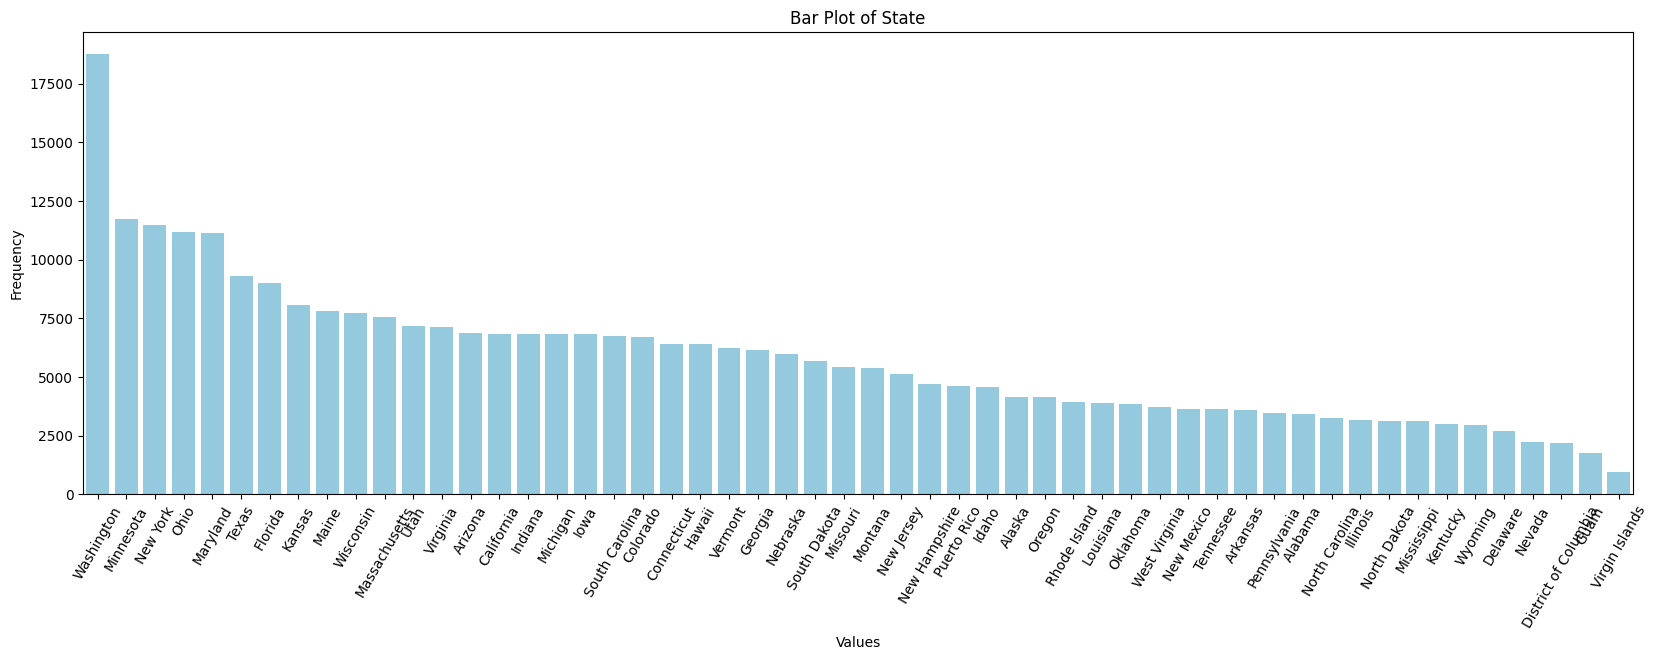

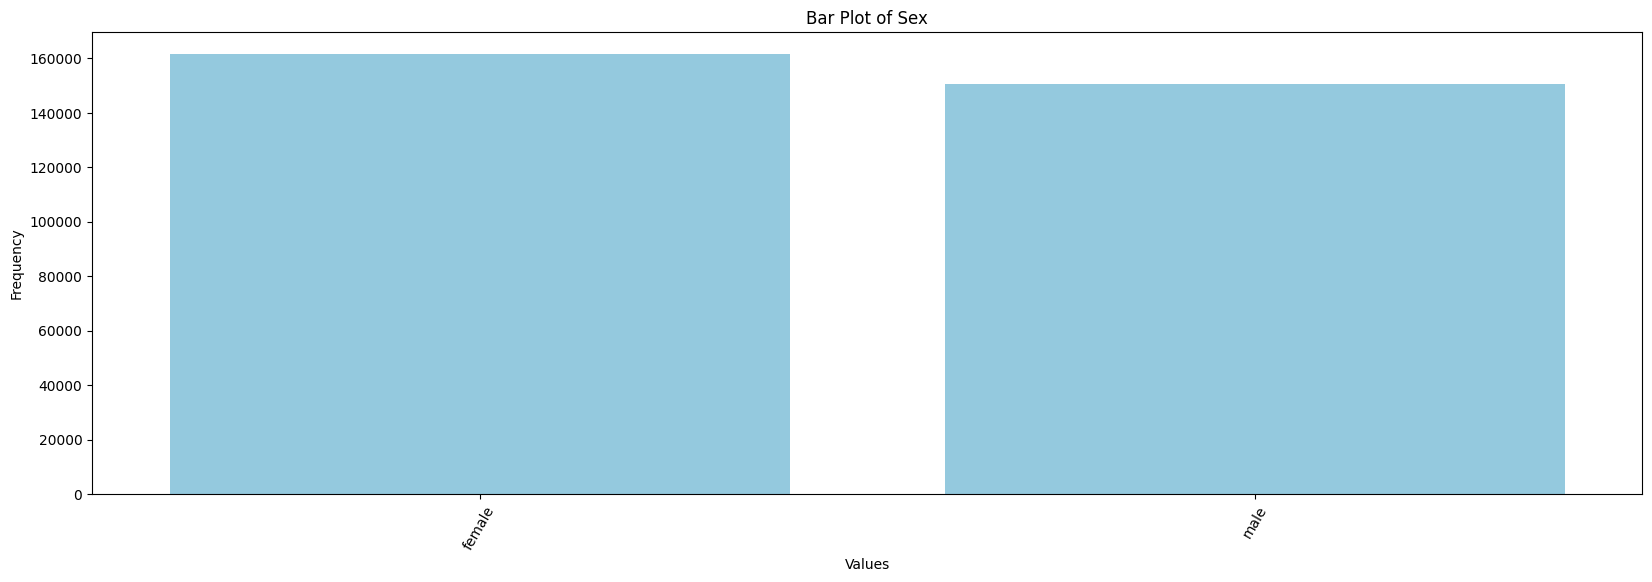

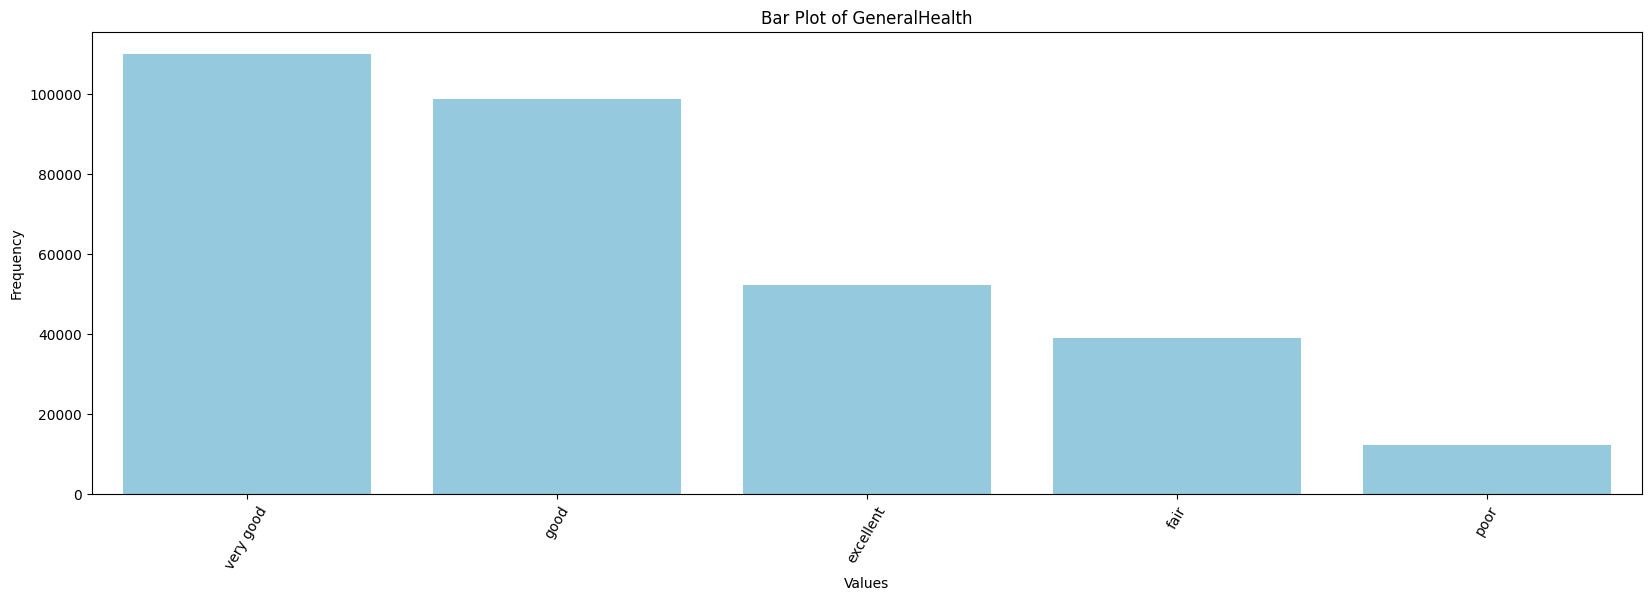

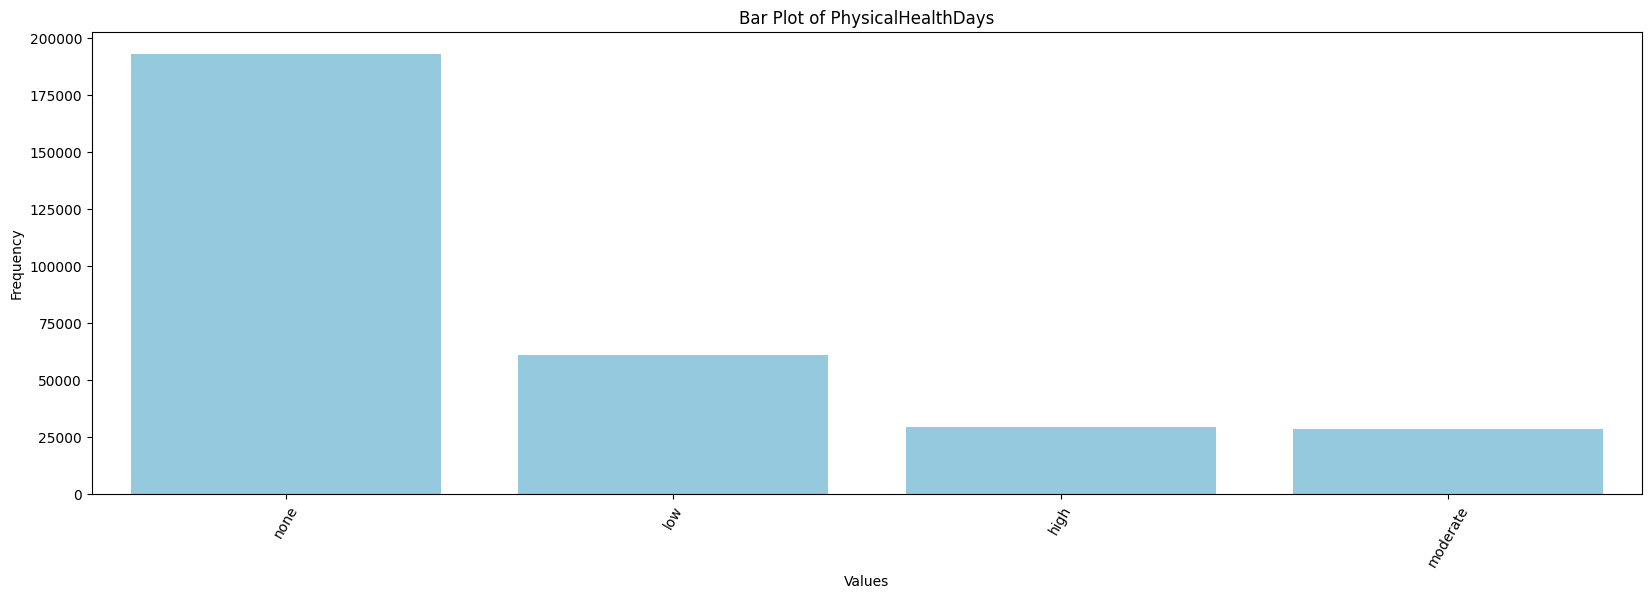

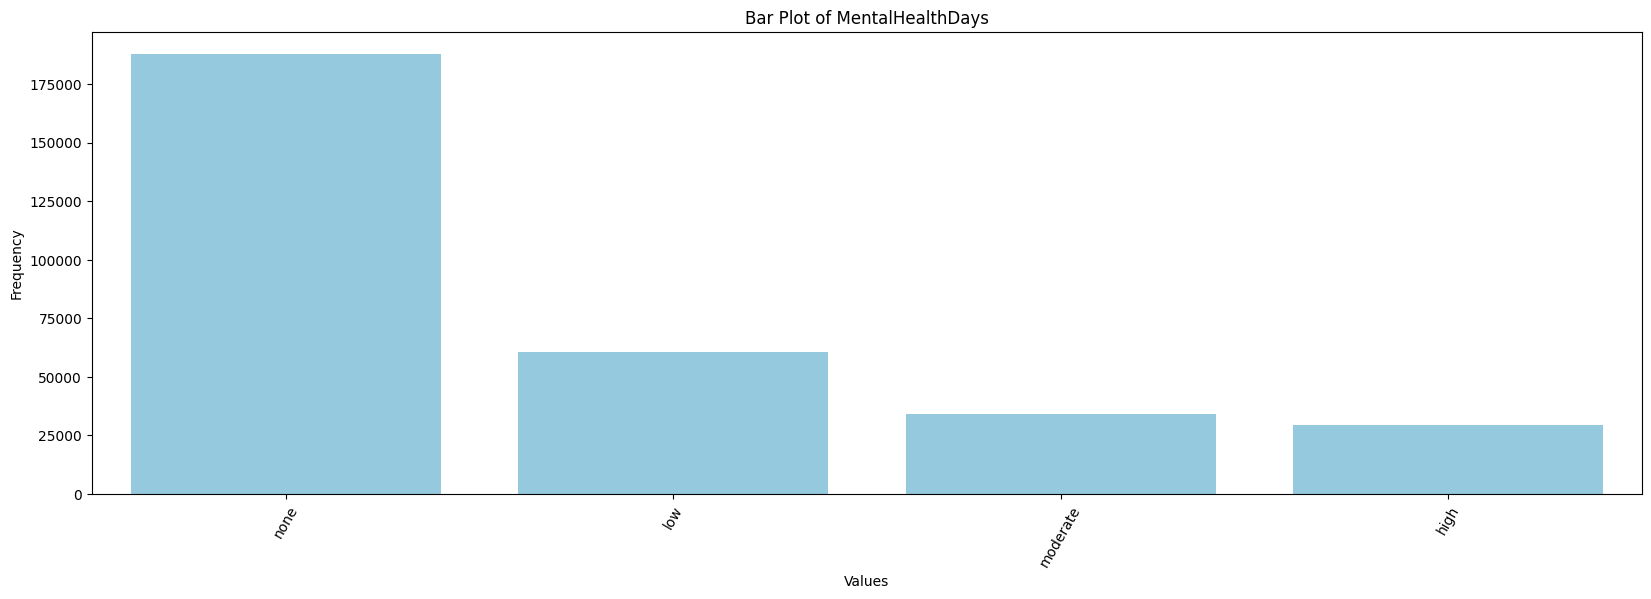

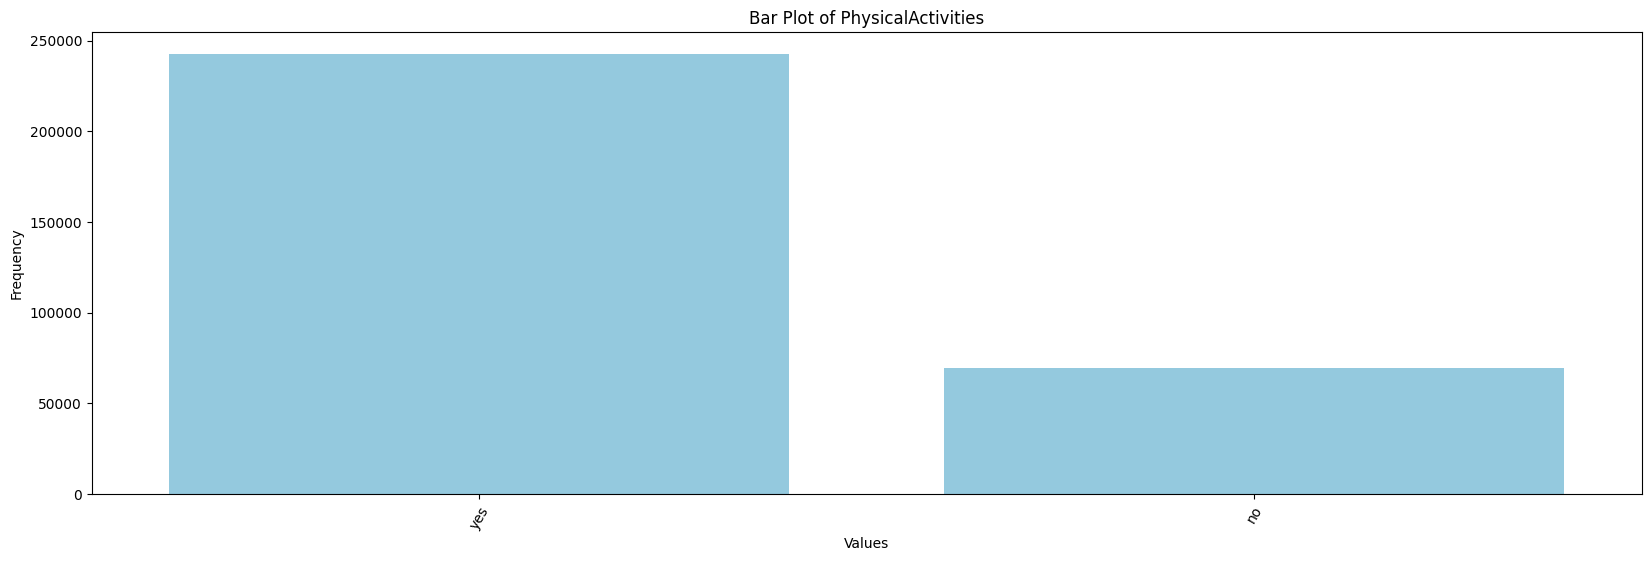

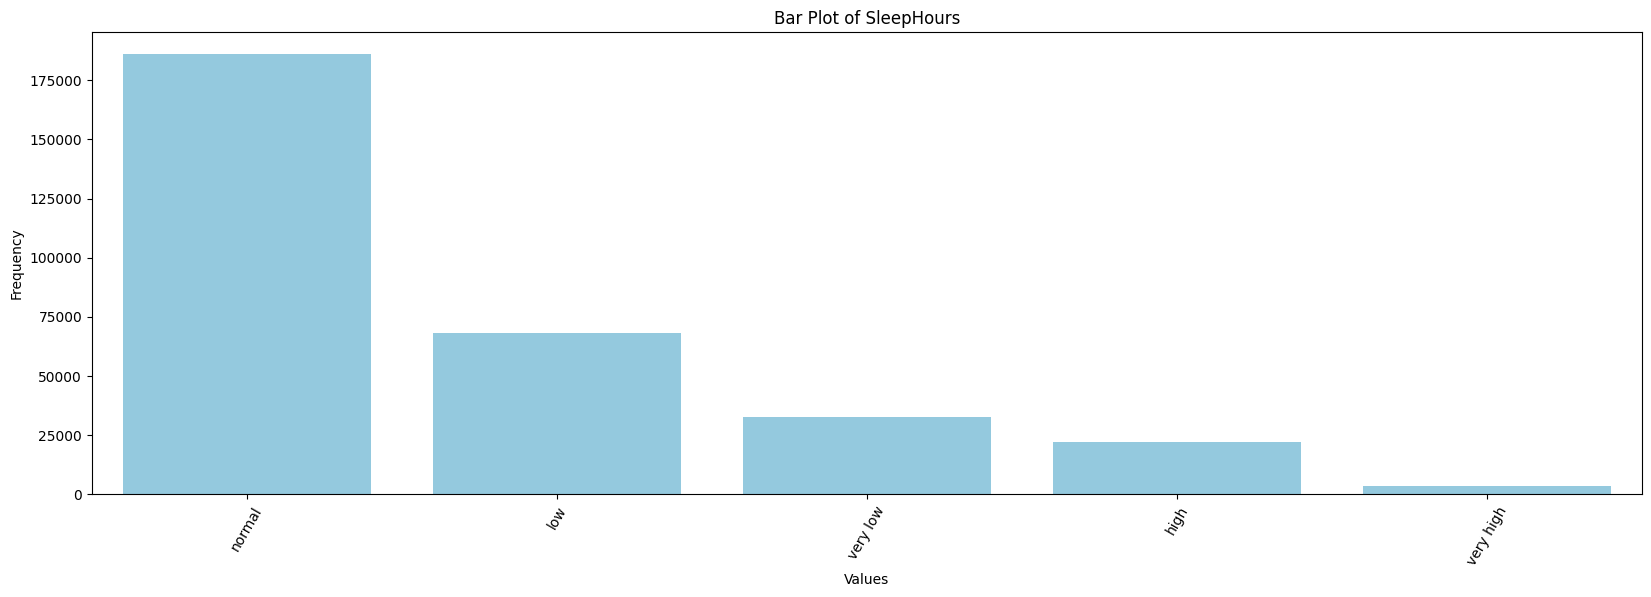

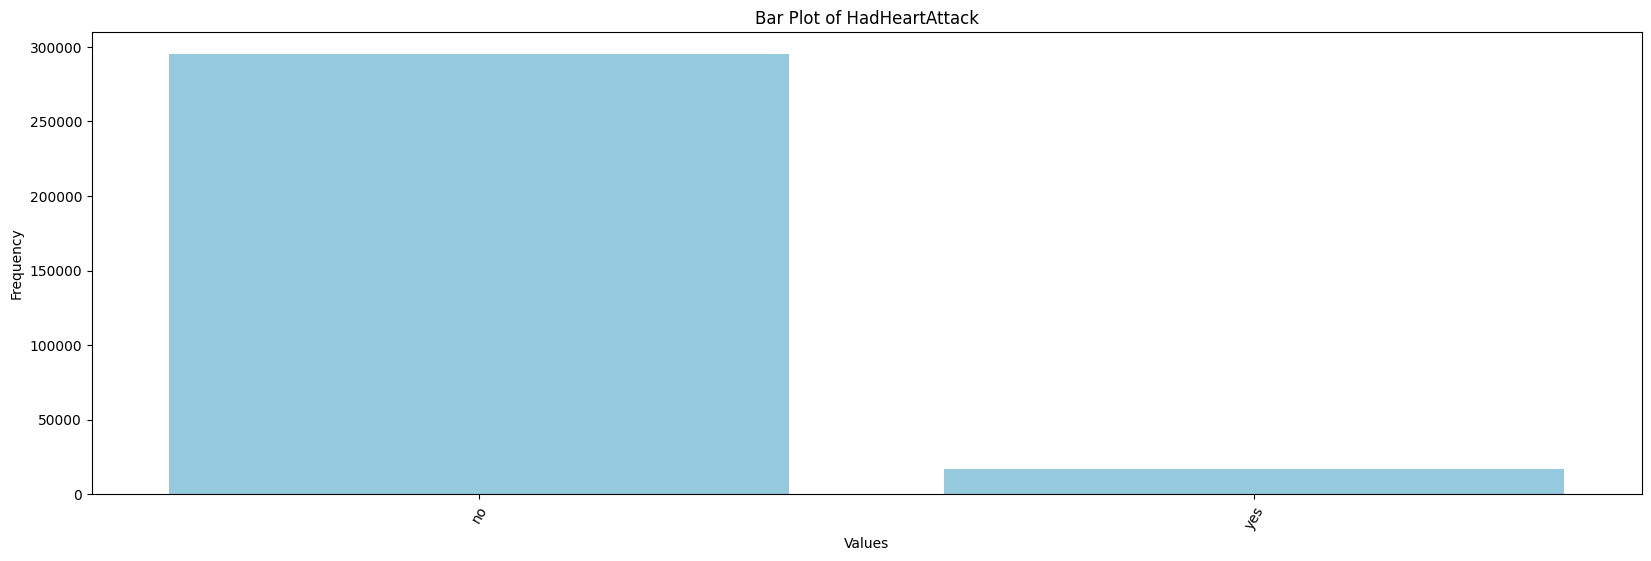

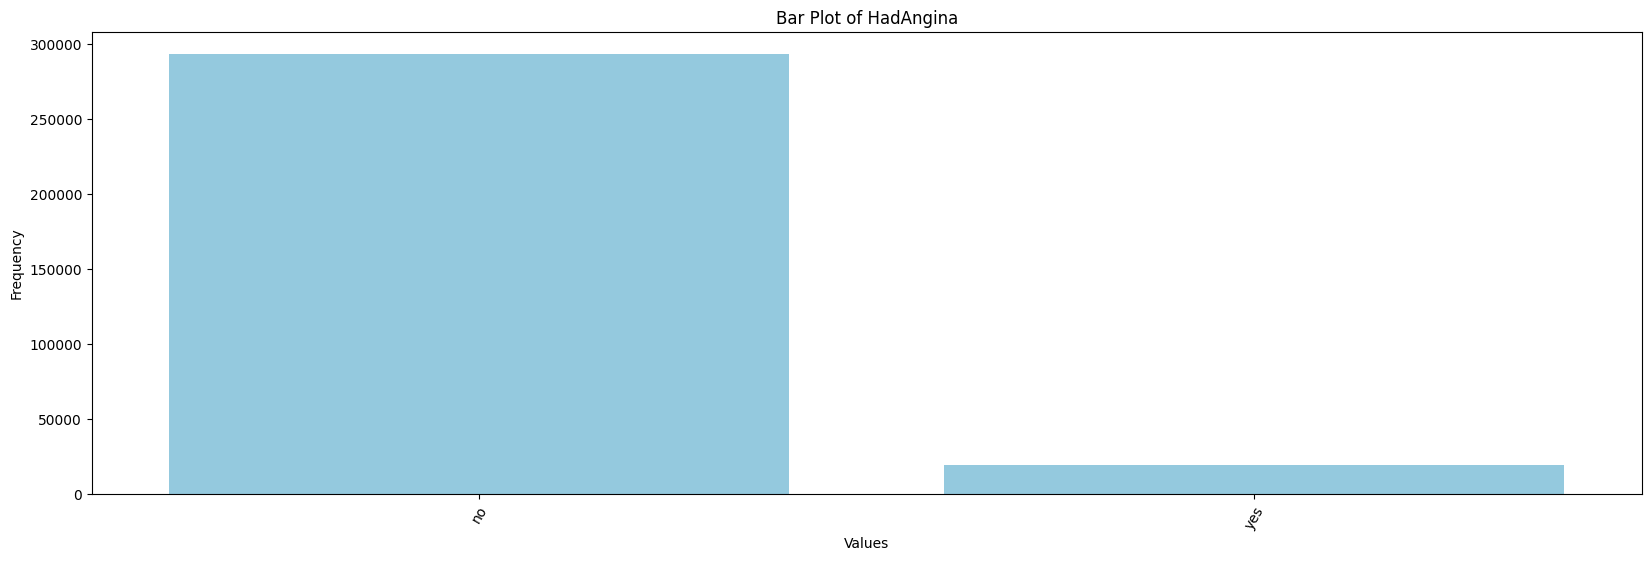

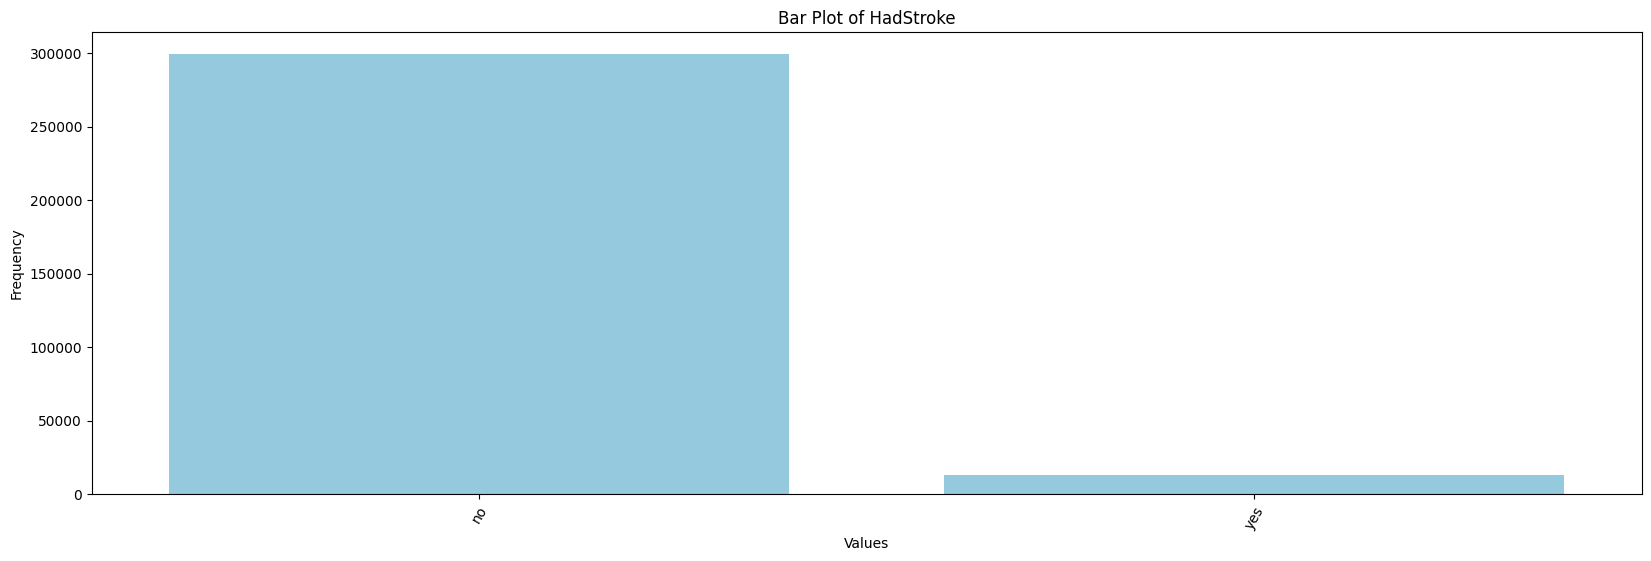

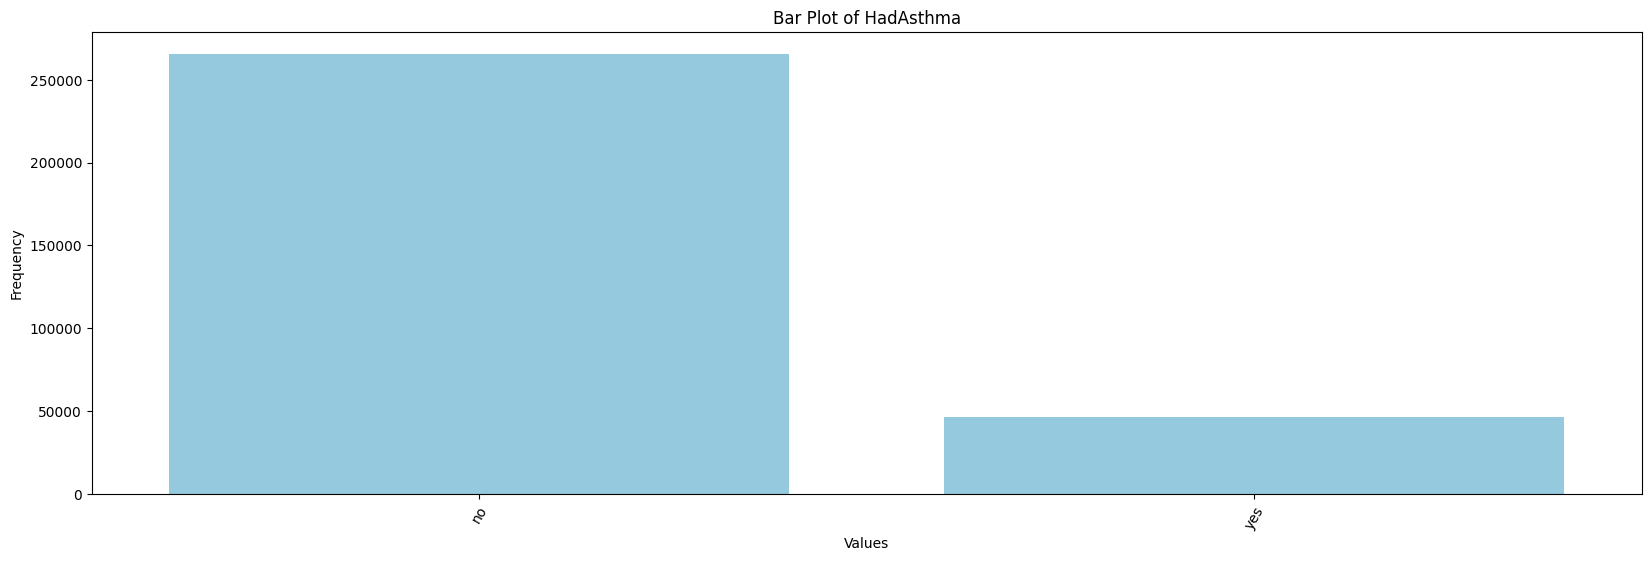

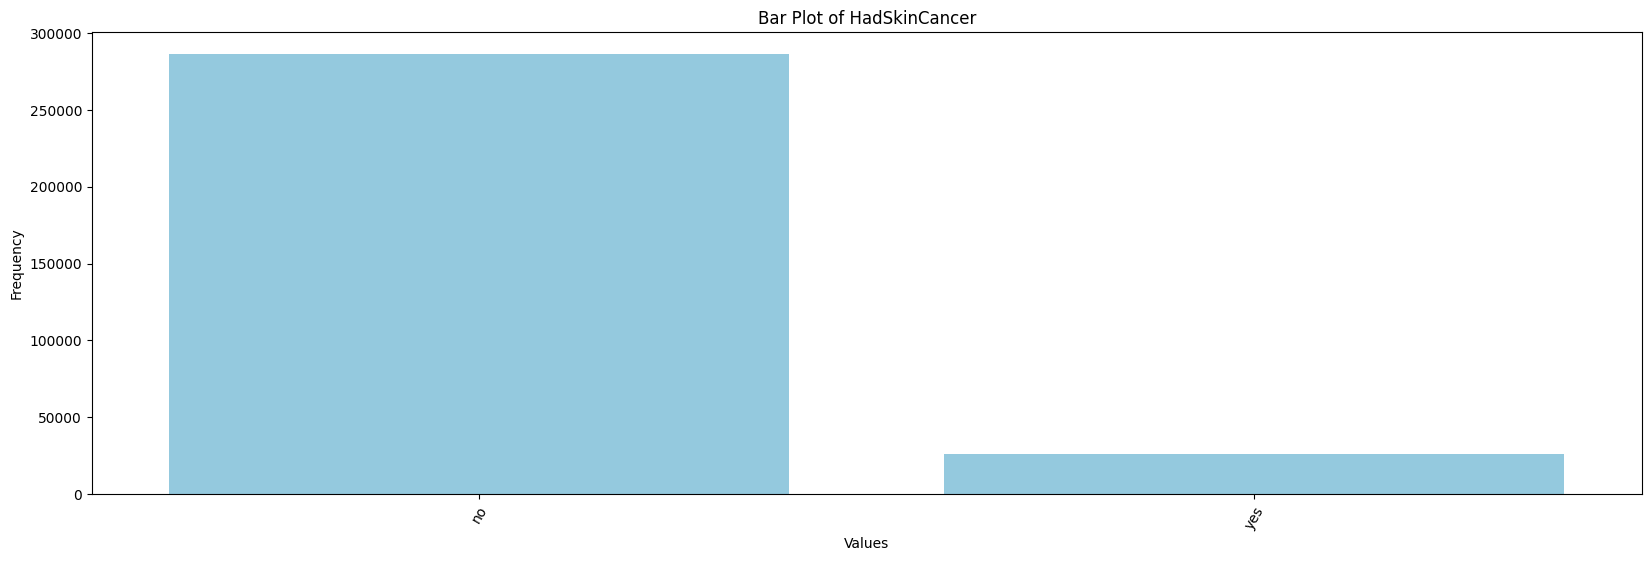

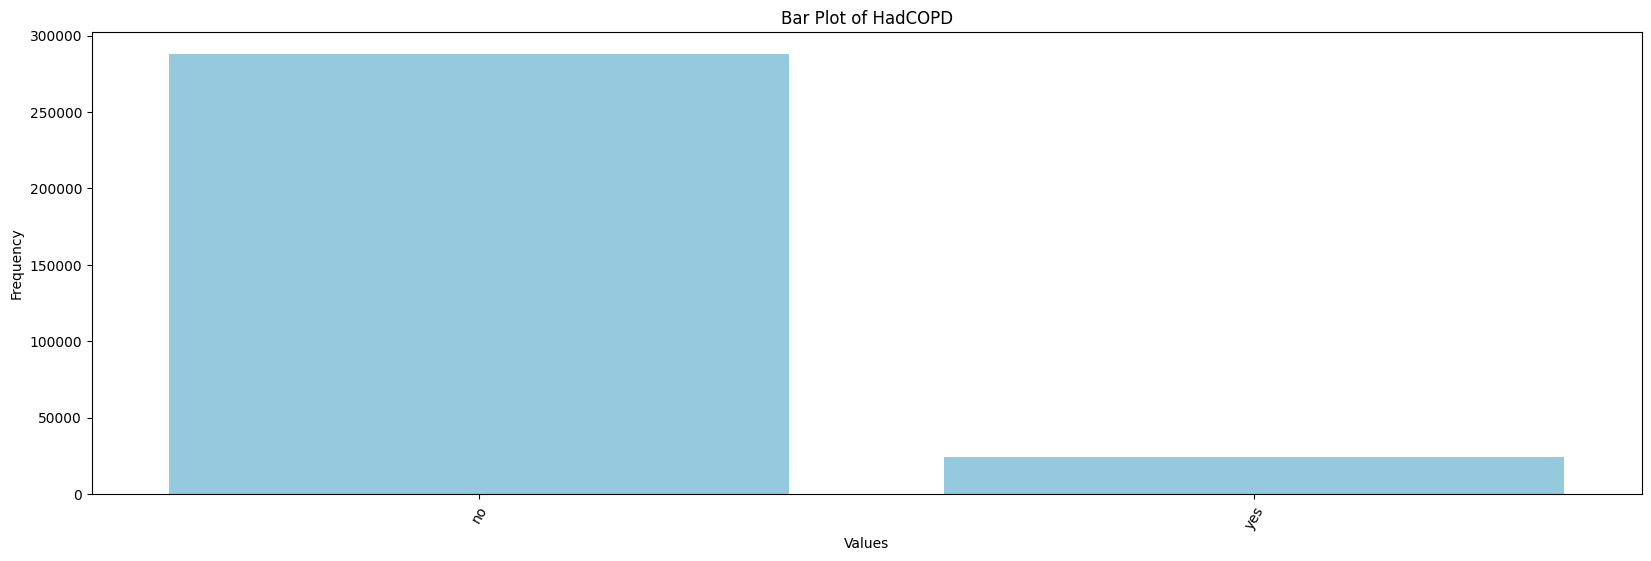

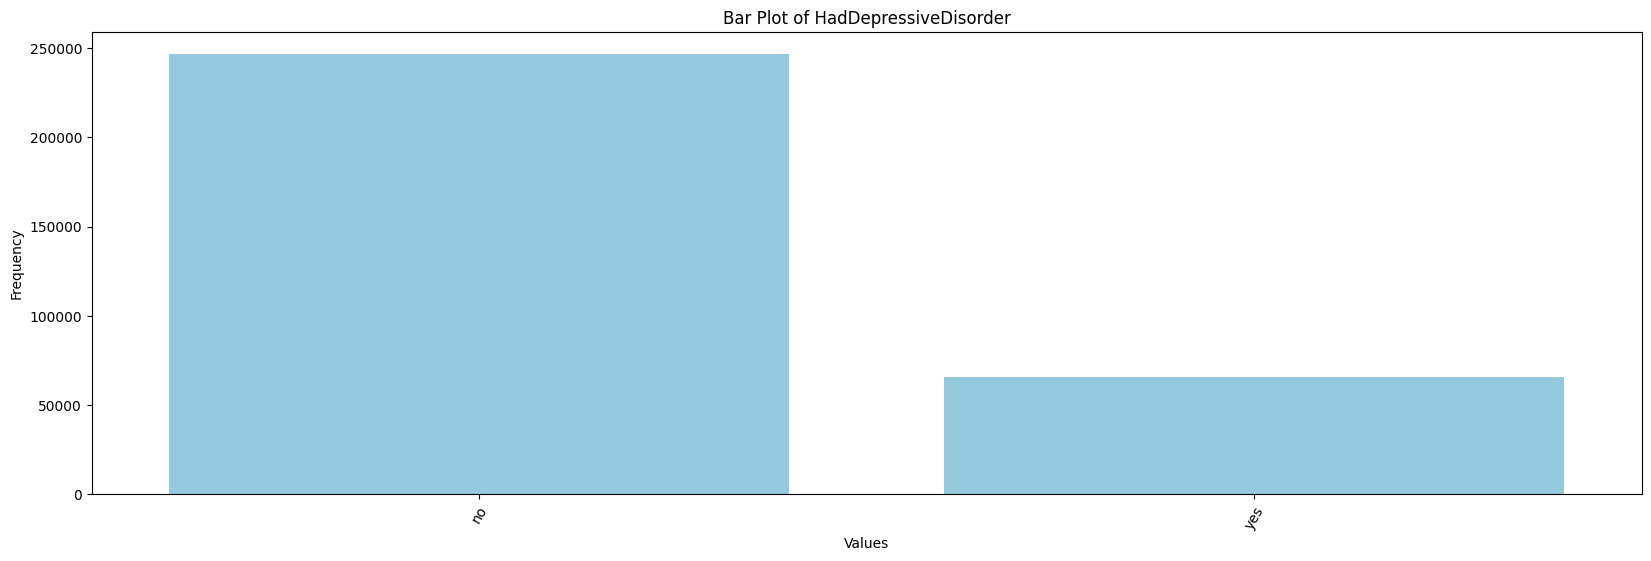

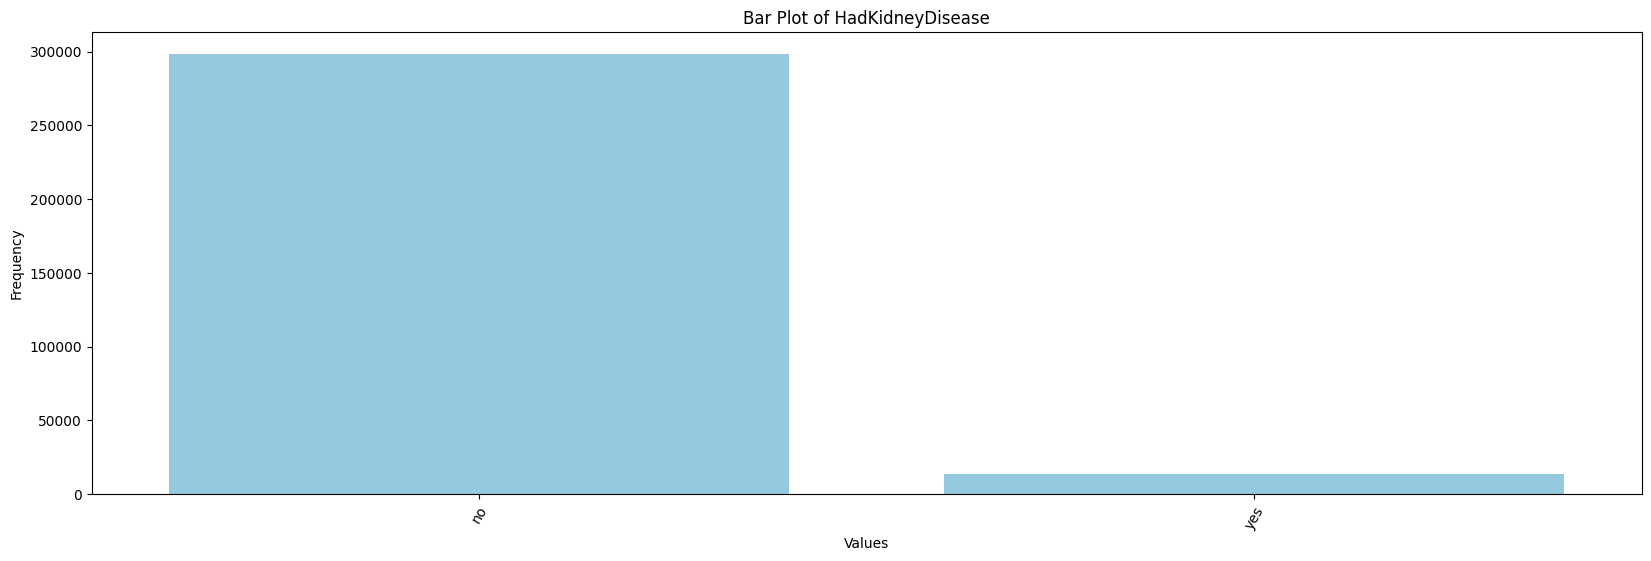

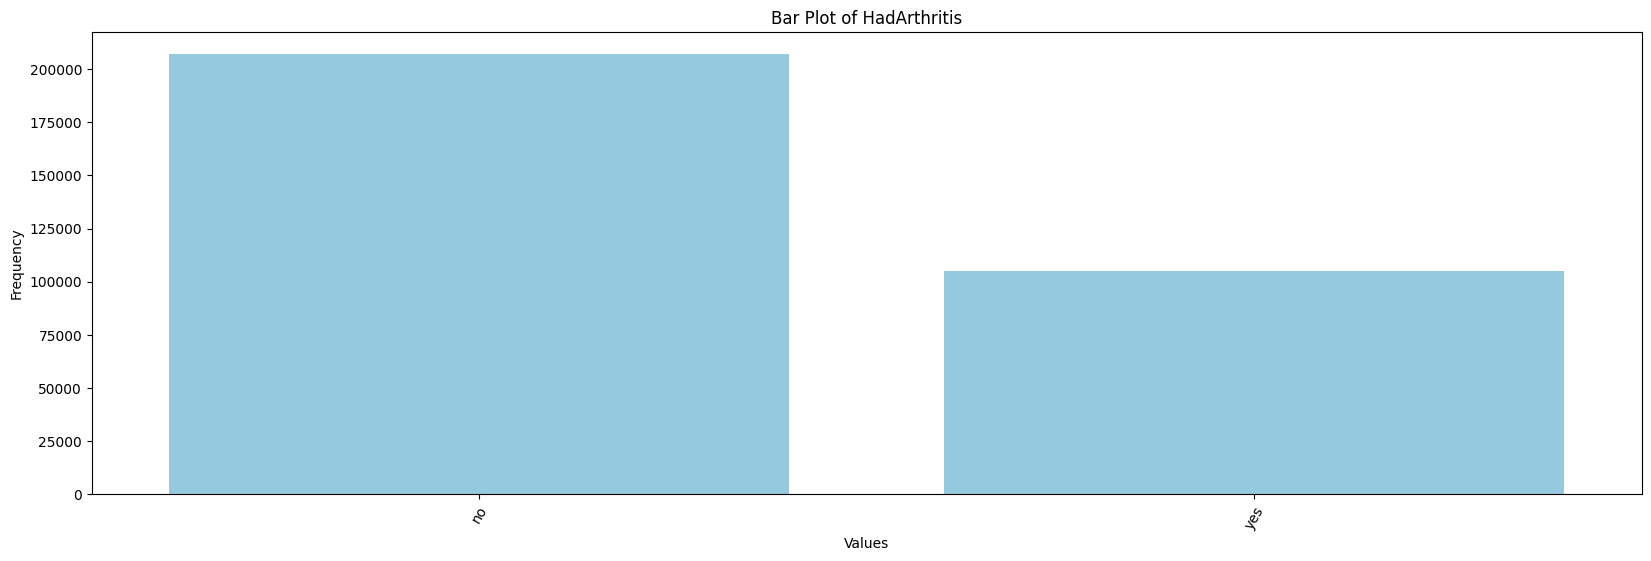

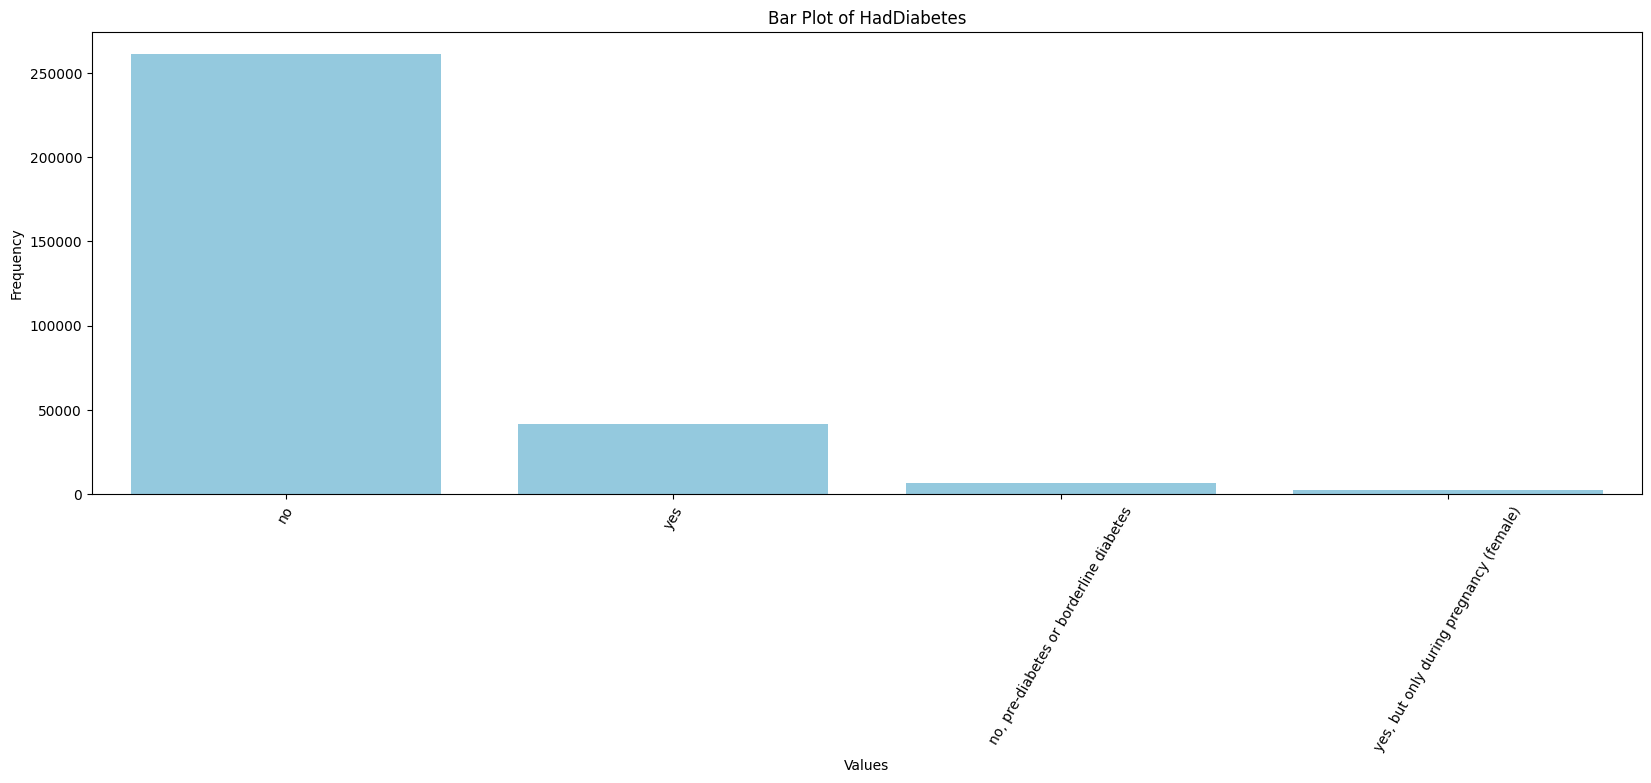

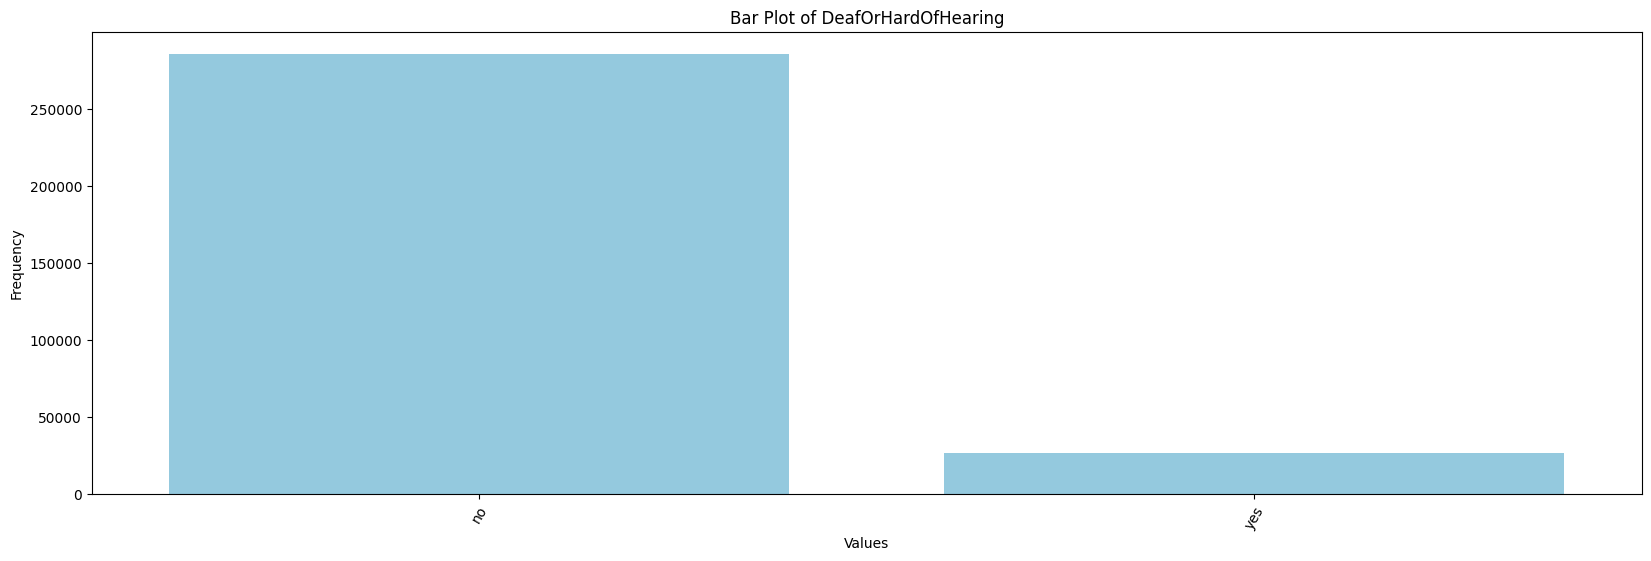

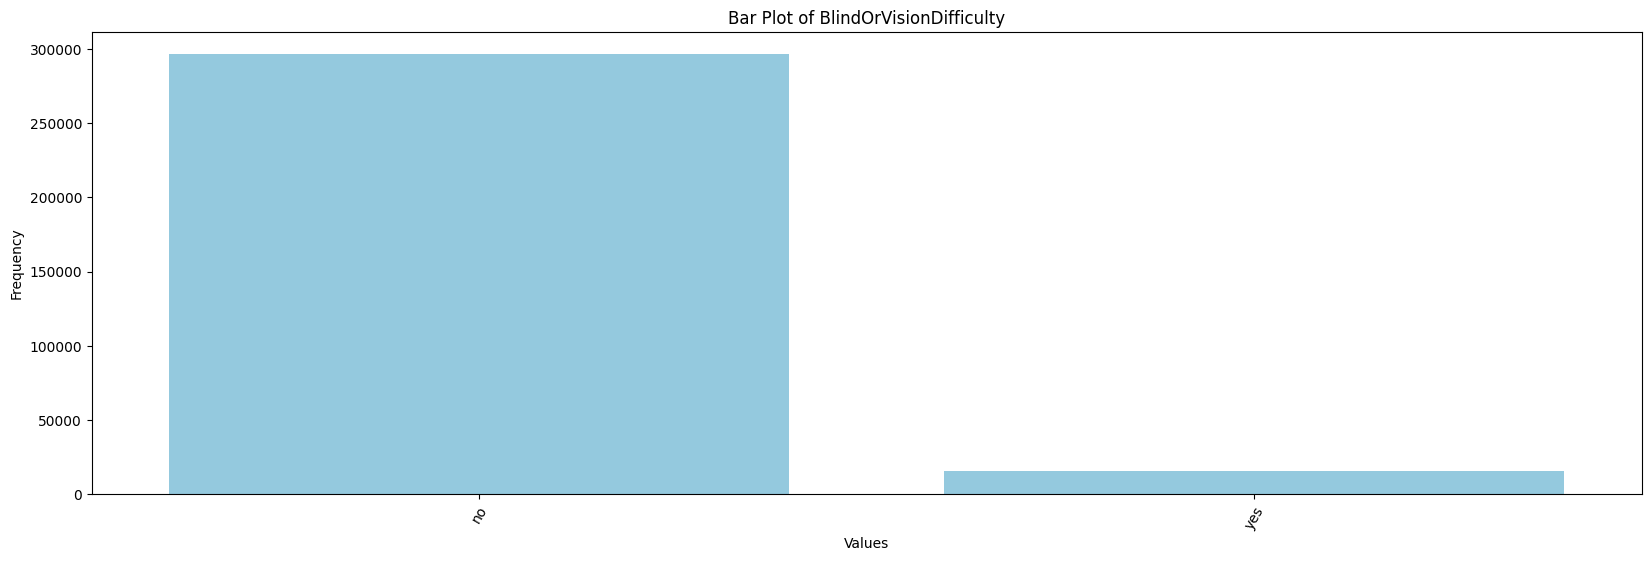

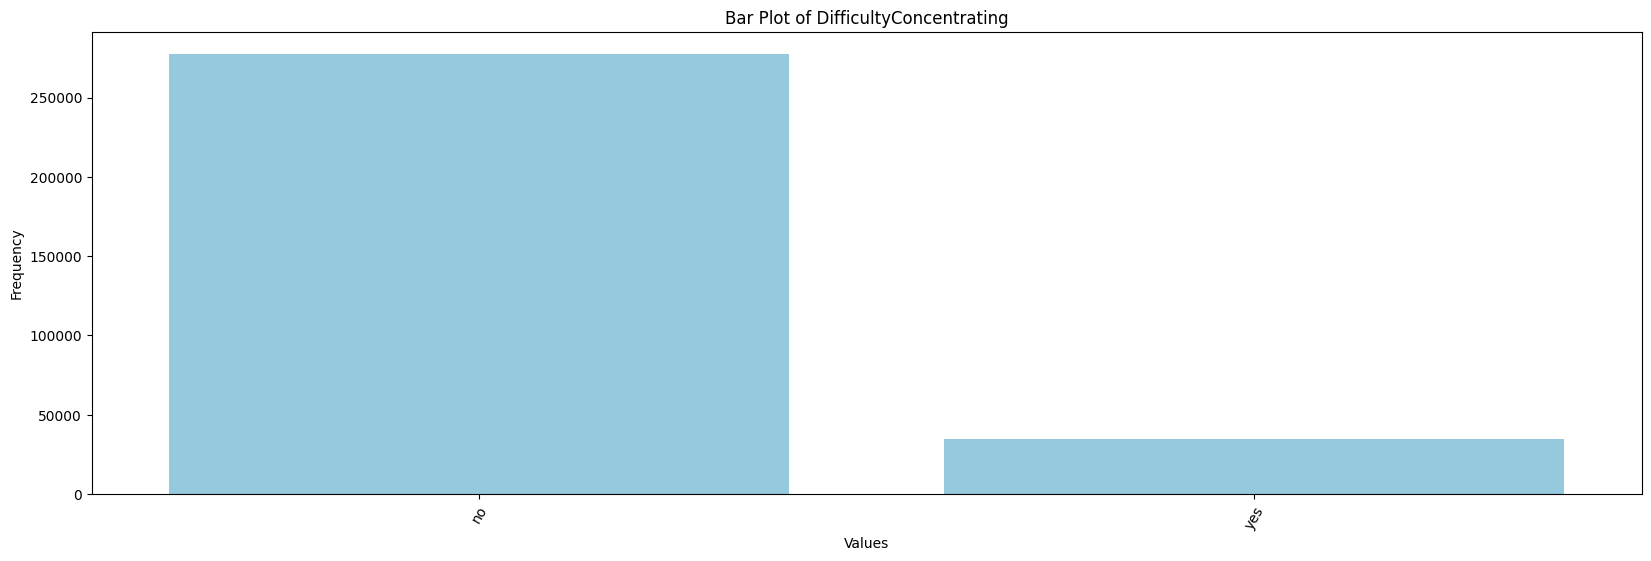

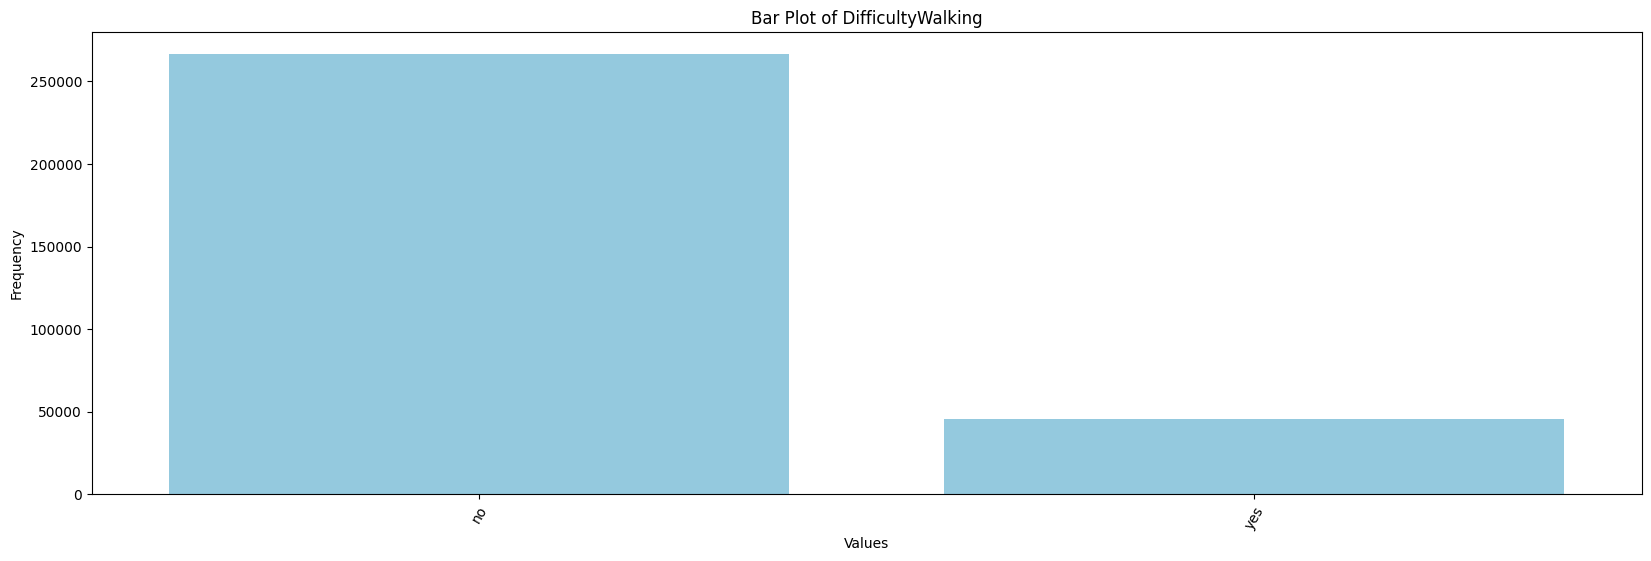

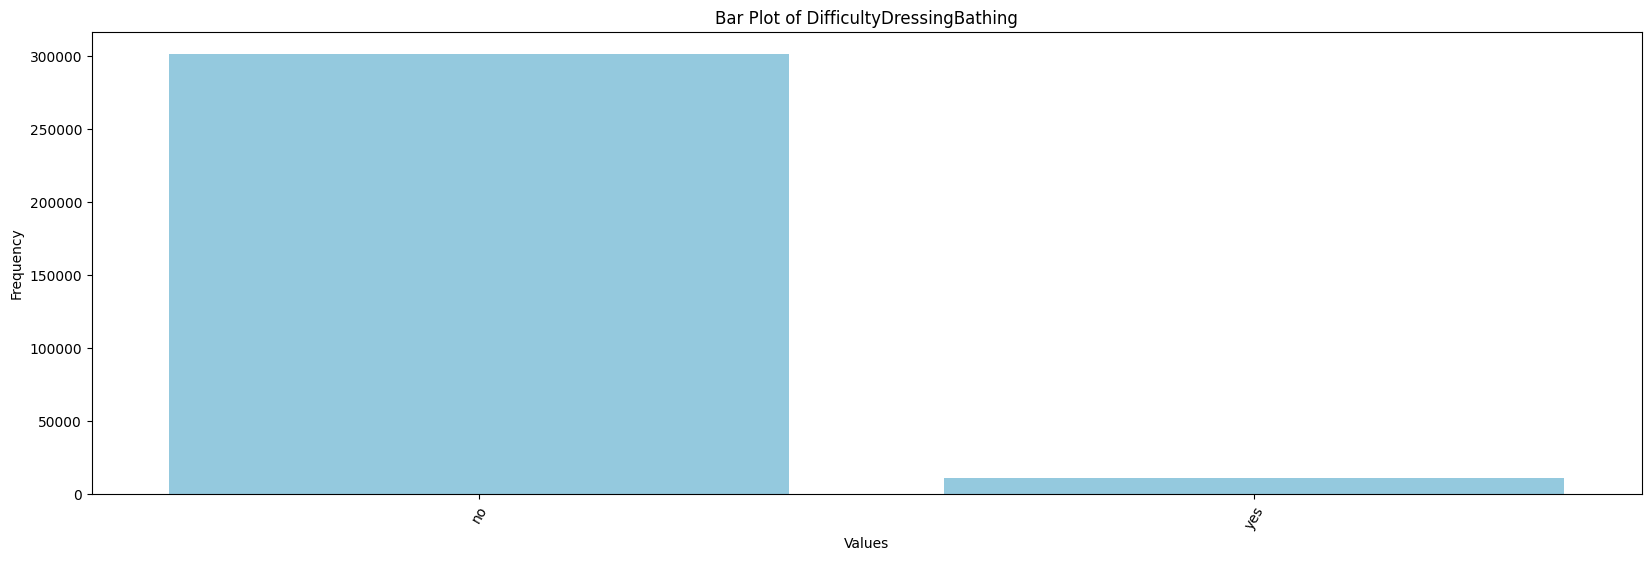

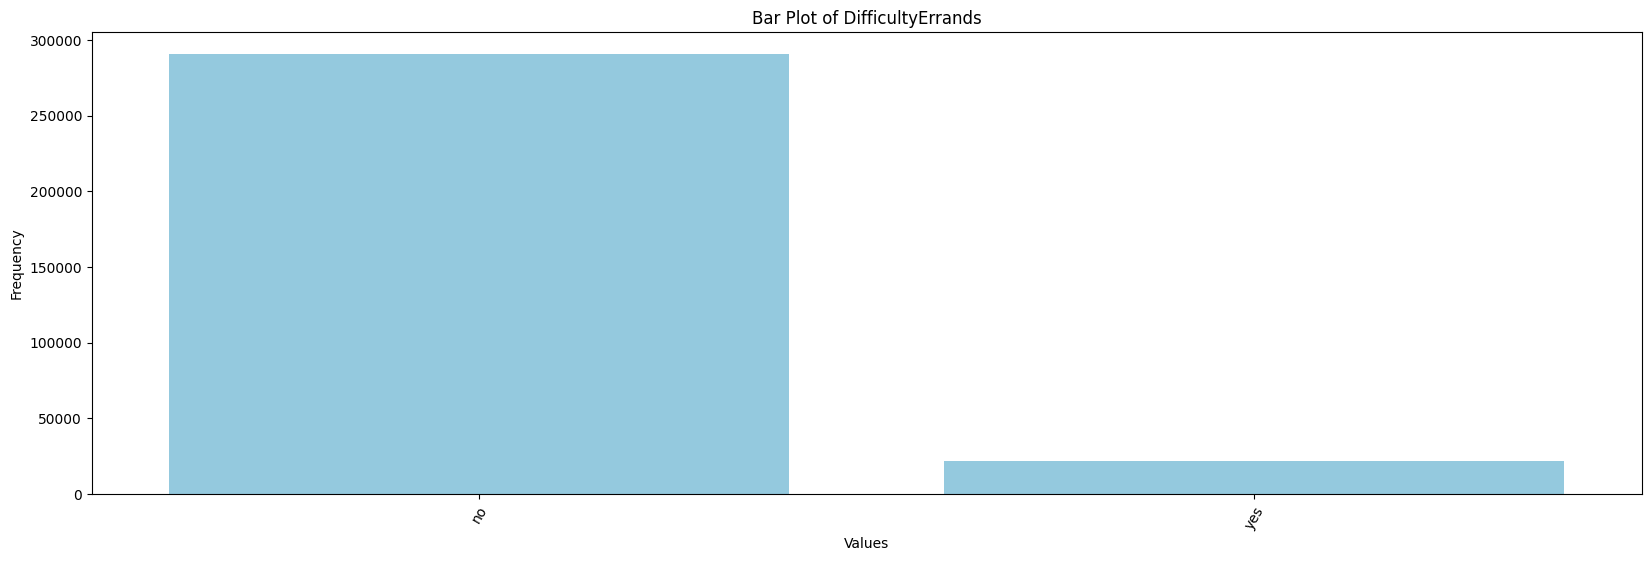

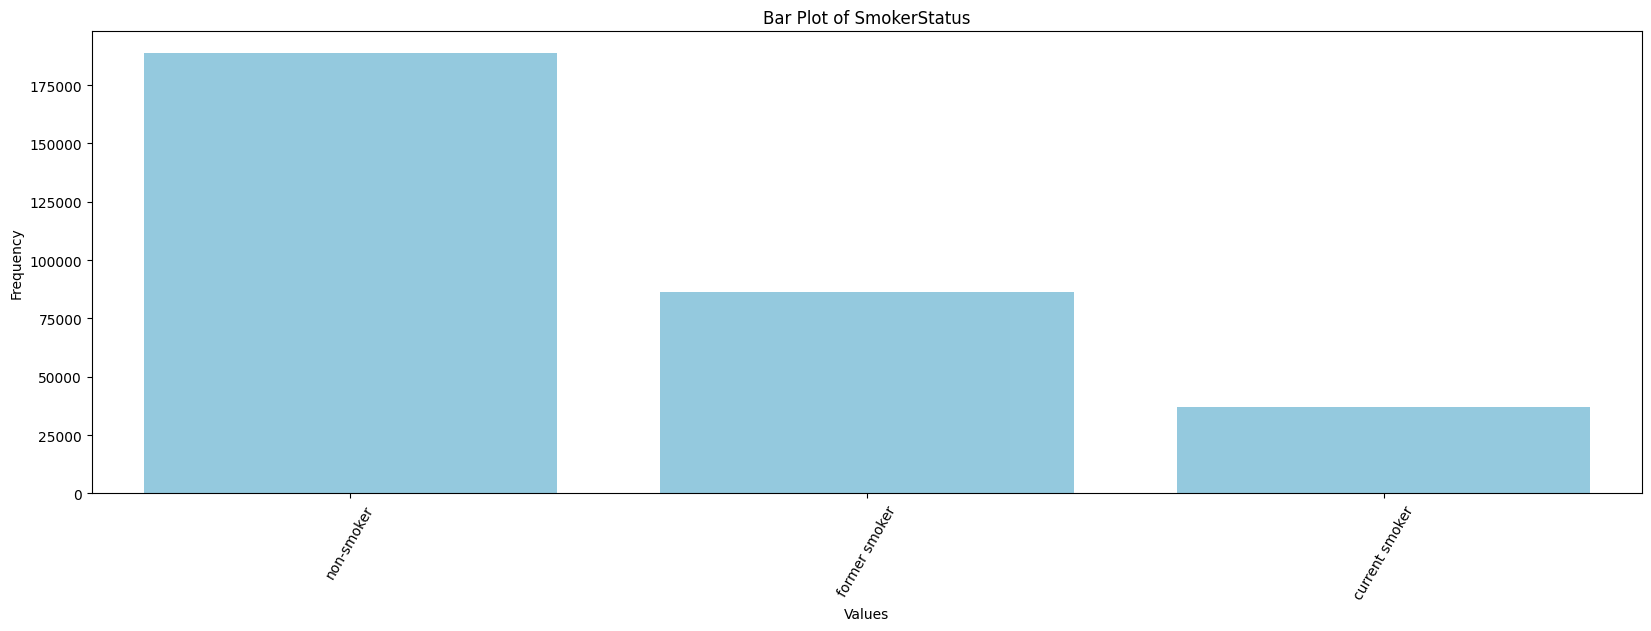

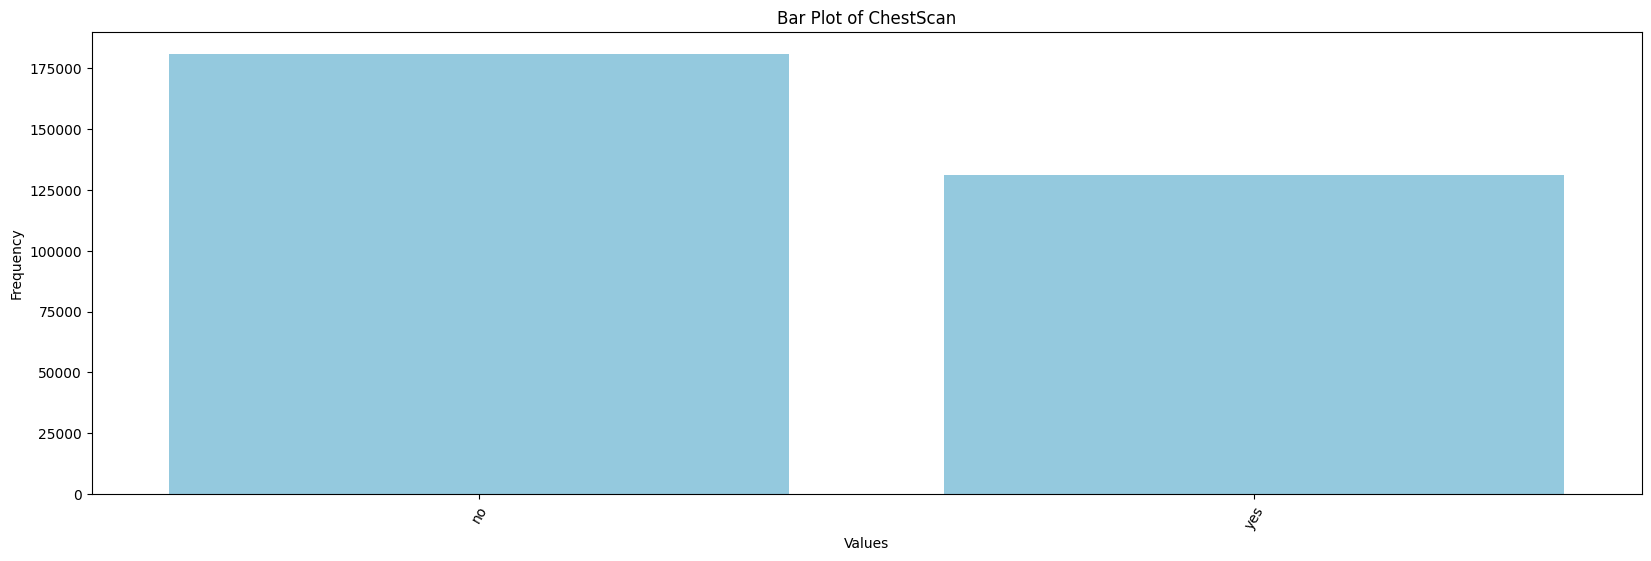

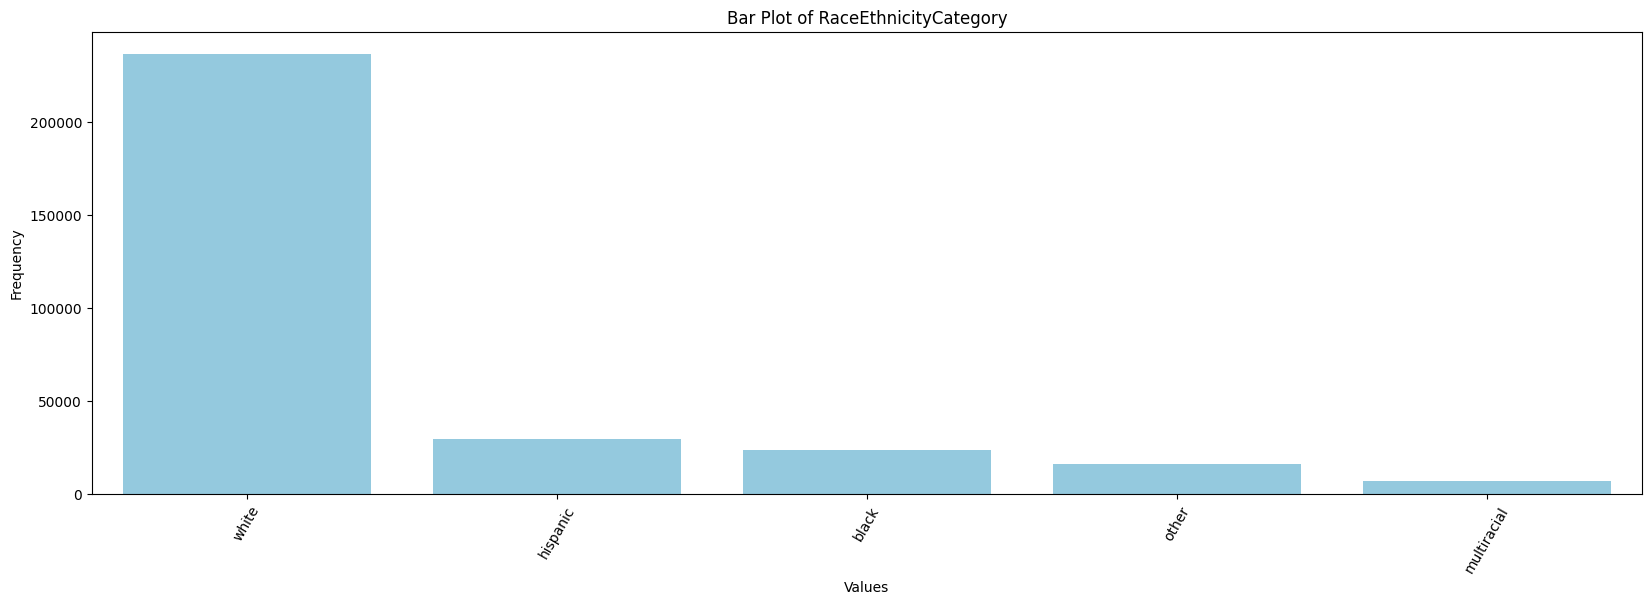

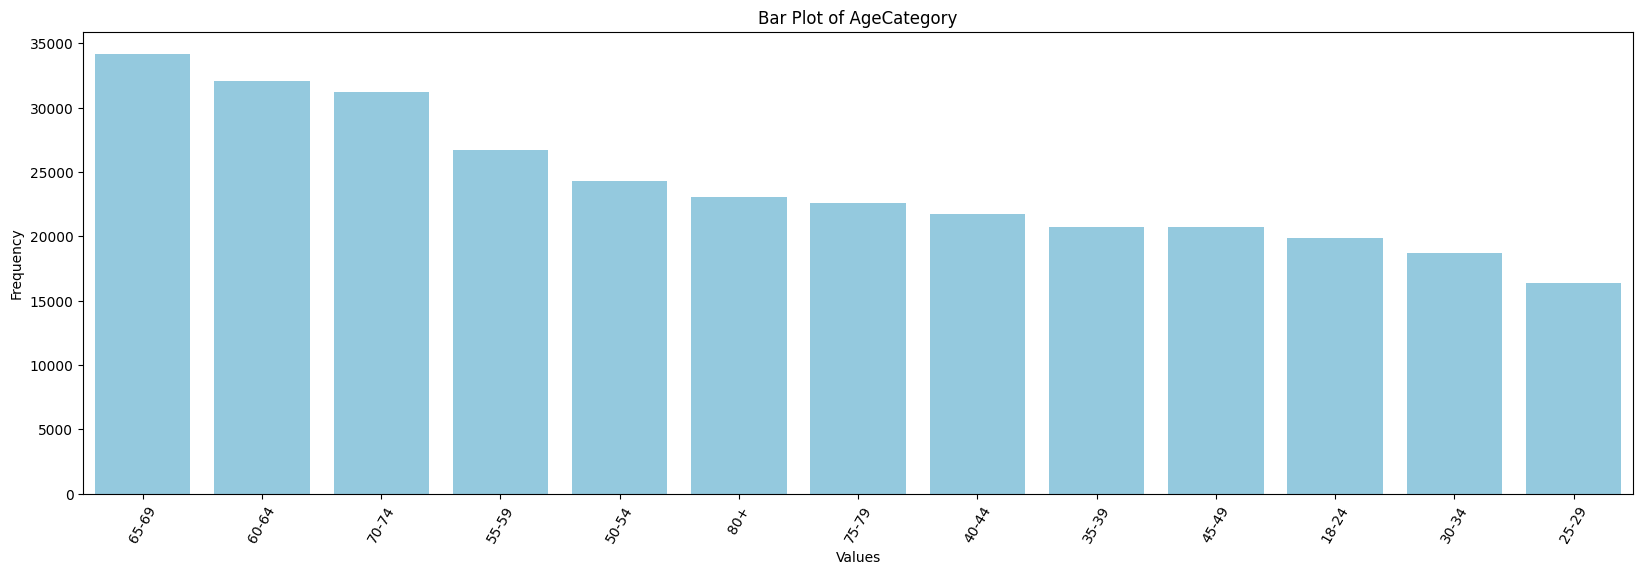

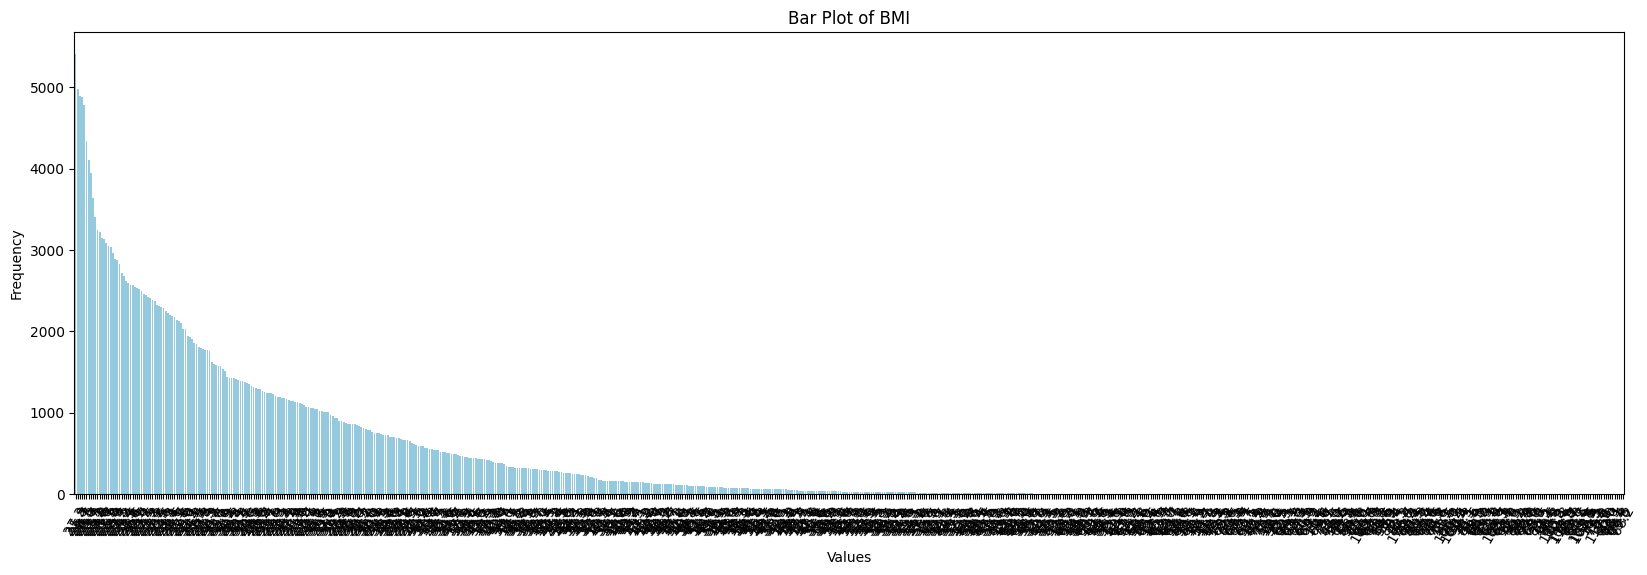

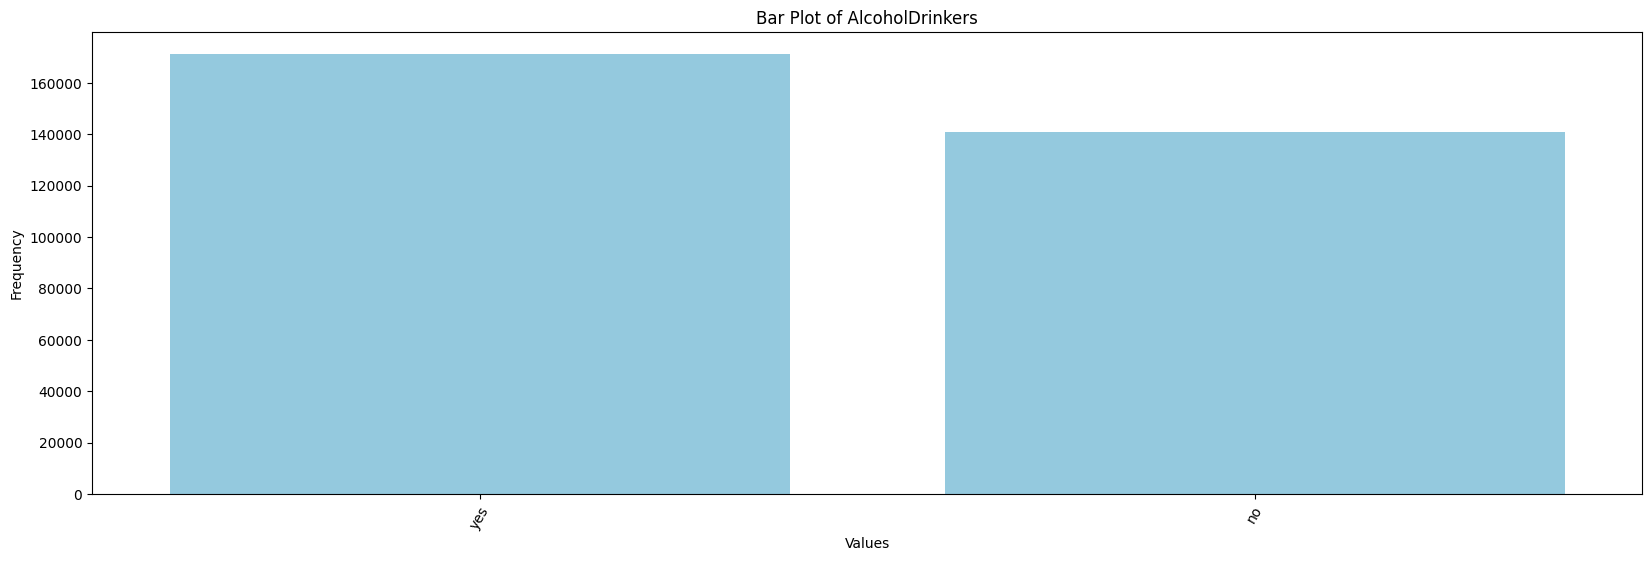

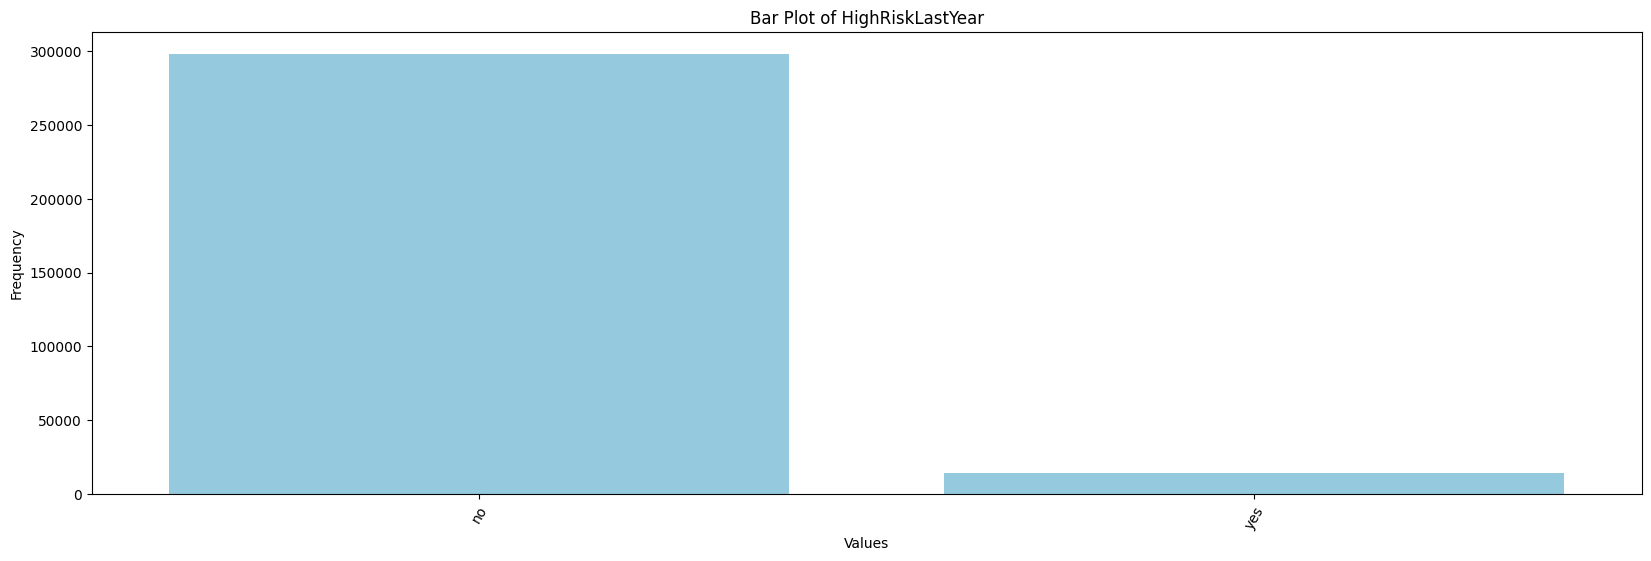

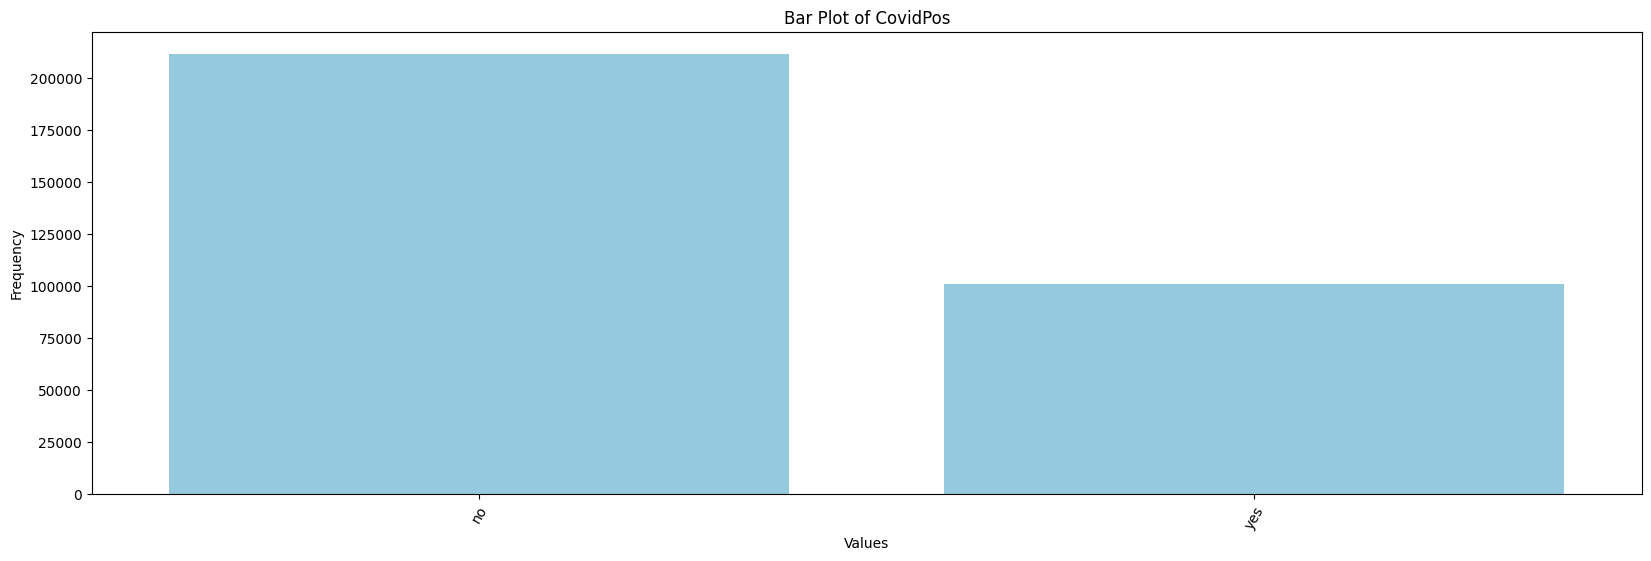

In [94]:
plotter = DataFramePlotter(data)
plotter.plot_bar_for_all_columns()

In [95]:
data.to_csv('preprocessed_data.csv', index = False)